In [124]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_data_final_1.22.csv', encoding="latin-1")
df

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_699/1603014435.py:7: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data_final_1.22.csv', encoding="latin-1")


Investigation.Type  Event.Date         Location        Country  \
0               Accident  1948-10-24  MOOSE CREEK, ID  United States   
1               Accident  1962-07-19   BRIDGEPORT, CA  United States   
2               Accident  1974-08-30    Saltville, VA  United States   
3               Accident  1977-06-19       EUREKA, CA  United States   
4               Accident  1979-08-02       Canton, OH  United States   
...                  ...         ...              ...            ...   
84601           Accident  2022-12-21      Reserve, LA  United States   
84602           Accident  2022-12-22      Brasnorte,          Brazil   
84603           Accident  2022-12-26    Annapolis, MD  United States   
84604           Accident  2022-12-26       Payson, AZ  United States   
84605           Accident  2022-12-29       Athens, GA  United States   

      Injury.Severity Aircraft.damage Aircraft.Category  \
0               Fatal       Destroyed               NaN   
1               Fatal       Destroyed               NaN   
2               Fatal       Destroyed               NaN   
3               Fatal       Destroyed               NaN   
4               Fatal       Destroyed               NaN   
...               ...             ...               ...   
84601           Minor             NaN               NaN   
84602           Fatal             NaN               NaN   
84603           Minor             NaN               NaN   
84604       Non-Fatal     Substantial          Airplane   
84605           Minor             NaN               NaN   

                              Make      Model Amateur.Built  \
0                          Stinson      108-3            No   
1                            Piper   PA24-180            No   
2                           Cessna       172M            No   
3                         Rockwell        112            No   
4                           Cessna        501            No   
...                            ...        ...           ...   
84601  GRUMMAN AMERICAN AVN. CORP.      AA-5B            No   
84602                  AIR TRACTOR      AT502            No   
84603                        PIPER  PA-28-151            No   
84604   AMERICAN CHAMPION AIRCRAFT      8GCBC            No   
84605                        PIPER  PA-24-260            No   

       Number.of.Engines    Engine.Type Purpose.of.flight  \
0                    1.0  Reciprocating          Personal   
1                    1.0  Reciprocating          Personal   
2                    1.0  Reciprocating          Personal   
3                    1.0  Reciprocating          Personal   
4                    2.0            NaN          Personal   
...                  ...            ...               ...   
84601                1.0            NaN     Instructional   
84602                1.0            NaN               NaN   
84603                1.0            NaN          Personal   
84604                1.0            NaN          Personal   
84605                1.0            NaN          Personal   

       Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                       2.0                     0.0                   0.0   
1                       4.0                     0.0                   0.0   
2                       3.0                     0.0                   0.0   
3                       2.0                     0.0                   0.0   
4                       1.0                     2.0                   2.0   
...                     ...                     ...                   ...   
84601                   0.0                     1.0                   1.0   
84602                   1.0                     0.0                   0.0   
84603                   0.0                     1.0                   1.0   
84604                   0.0                     0.0                   0.0   
84605                   0.0                     1.0                   1.0   

       Total.Unin

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84606 entries, 0 to 84605
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      84606 non-null  object 
 1   Event.Date              84606 non-null  object 
 2   Location                84566 non-null  object 
 3   Country                 84400 non-null  object 
 4   Injury.Severity         84606 non-null  object 
 5   Aircraft.damage         83203 non-null  object 
 6   Aircraft.Category       30171 non-null  object 
 7   Make                    84573 non-null  object 
 8   Model                   84549 non-null  object 
 9   Amateur.Built           84548 non-null  object 
 10  Number.of.Engines       84606 non-null  float64
 11  Engine.Type             79111 non-null  object 
 12  Purpose.of.flight       80598 non-null  object 
 13  Total.Fatal.Injuries    84606 non-null  float64
 14  Total.Serious.Injuries  84606 non-null

In [126]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month

print(df[['Event.Date', 'Year', 'Month']])

      Event.Date  Year  Month
0     1948-10-24  1948     10
1     1962-07-19  1962      7
2     1974-08-30  1974      8
3     1977-06-19  1977      6
4     1979-08-02  1979      8
...          ...   ...    ...
84601 2022-12-21  2022     12
84602 2022-12-22  2022     12
84603 2022-12-26  2022     12
84604 2022-12-26  2022     12
84605 2022-12-29  2022     12

[84606 rows x 3 columns]


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84606 entries, 0 to 84605
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      84606 non-null  object        
 1   Event.Date              84606 non-null  datetime64[ns]
 2   Location                84566 non-null  object        
 3   Country                 84400 non-null  object        
 4   Injury.Severity         84606 non-null  object        
 5   Aircraft.damage         83203 non-null  object        
 6   Aircraft.Category       30171 non-null  object        
 7   Make                    84573 non-null  object        
 8   Model                   84549 non-null  object        
 9   Amateur.Built           84548 non-null  object        
 10  Number.of.Engines       84606 non-null  float64       
 11  Engine.Type             79111 non-null  object        
 12  Purpose.of.flight       80598 non-null  object

In [128]:
print(df['Injury.Severity'].value_counts())

Injury.Severity
Non-Fatal      66330
Fatal          17801
Minor            211
Serious          168
Unavailable       96
Name: count, dtype: int64


In [129]:
df['Make'] = df['Make'].str.lower()

In [130]:
airbus_mapping = {
    'airbus': 'airbus industries',
    'airbus industrie': 'airbus industries'
}

df['Make'] = df['Make'].replace(airbus_mapping)

In [131]:
filtered_df = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

print(filtered_df[['Event.Date', 'Year', 'Month']])

      Event.Date  Year  Month
70205 2013-01-01  2013      1
70206 2013-01-02  2013      1
70207 2013-01-02  2013      1
70208 2013-01-02  2013      1
70209 2013-01-02  2013      1
...          ...   ...    ...
84601 2022-12-21  2022     12
84602 2022-12-22  2022     12
84603 2022-12-26  2022     12
84604 2022-12-26  2022     12
84605 2022-12-29  2022     12

[14401 rows x 3 columns]


In [132]:
damage_v_fatalities = filtered_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].agg(['sum','mean']).reset_index()
print(damage_v_fatalities)

  Aircraft.damage     sum      mean
0       Destroyed  6184.0  2.960268
1           Minor    16.0  0.141593
2     Substantial  2420.0  0.205800


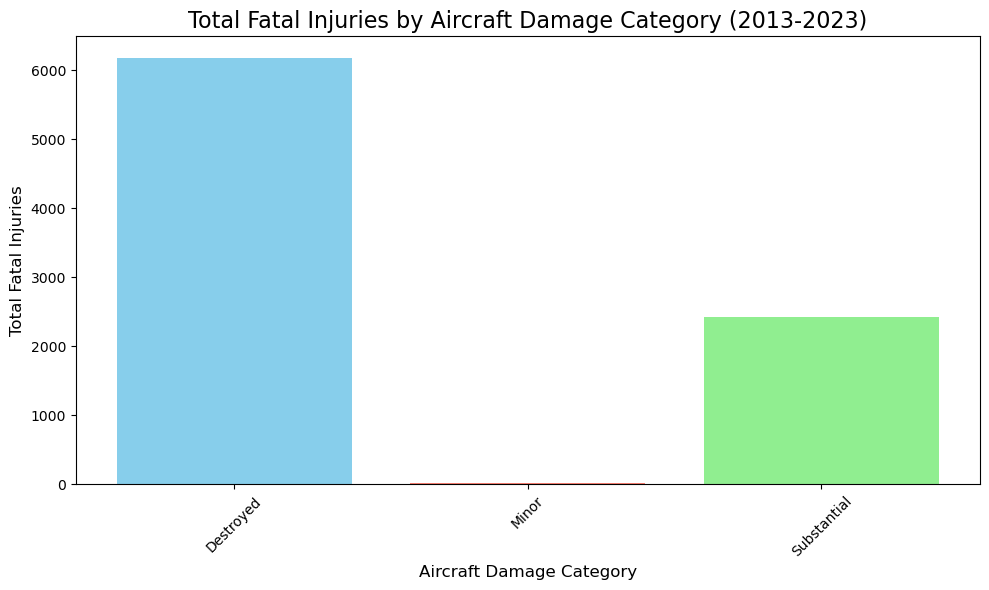

In [133]:
plt.figure(figsize=(10, 6))
plt.bar(damage_v_fatalities['Aircraft.damage'], damage_v_fatalities['sum'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Total Fatal Injuries by Aircraft Damage Category (2013-2023)', fontsize=16)
plt.xlabel('Aircraft Damage Category', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [134]:
yearly_damage_fatalities = (
    filtered_df.groupby(['Year', 'Aircraft.damage'])['Total.Fatal.Injuries']
    .sum()
    .reset_index()
)
print(yearly_damage_fatalities.head())

   Year Aircraft.damage  Total.Fatal.Injuries
0  2013       Destroyed                 554.0
1  2013           Minor                   2.0
2  2013     Substantial                 260.0
3  2014       Destroyed                1146.0
4  2014           Minor                   0.0


In [135]:
pivot_yearly_damage = yearly_damage_fatalities.pivot(
    index='Year', columns='Aircraft.damage', values='Total.Fatal.Injuries'
).fillna(0)

print(pivot_yearly_damage)

Aircraft.damage  Destroyed  Minor  Substantial
Year                                          
2013                 554.0    2.0        260.0
2014                1146.0    0.0        279.0
2015                 843.0    8.0        233.0
2016                 561.0    0.0        254.0
2017                 359.0    1.0        268.0
2018                 782.0    1.0        251.0
2019                 665.0    2.0        279.0
2020                 568.0    0.0        188.0
2021                 328.0    0.0        183.0
2022                 378.0    2.0        225.0


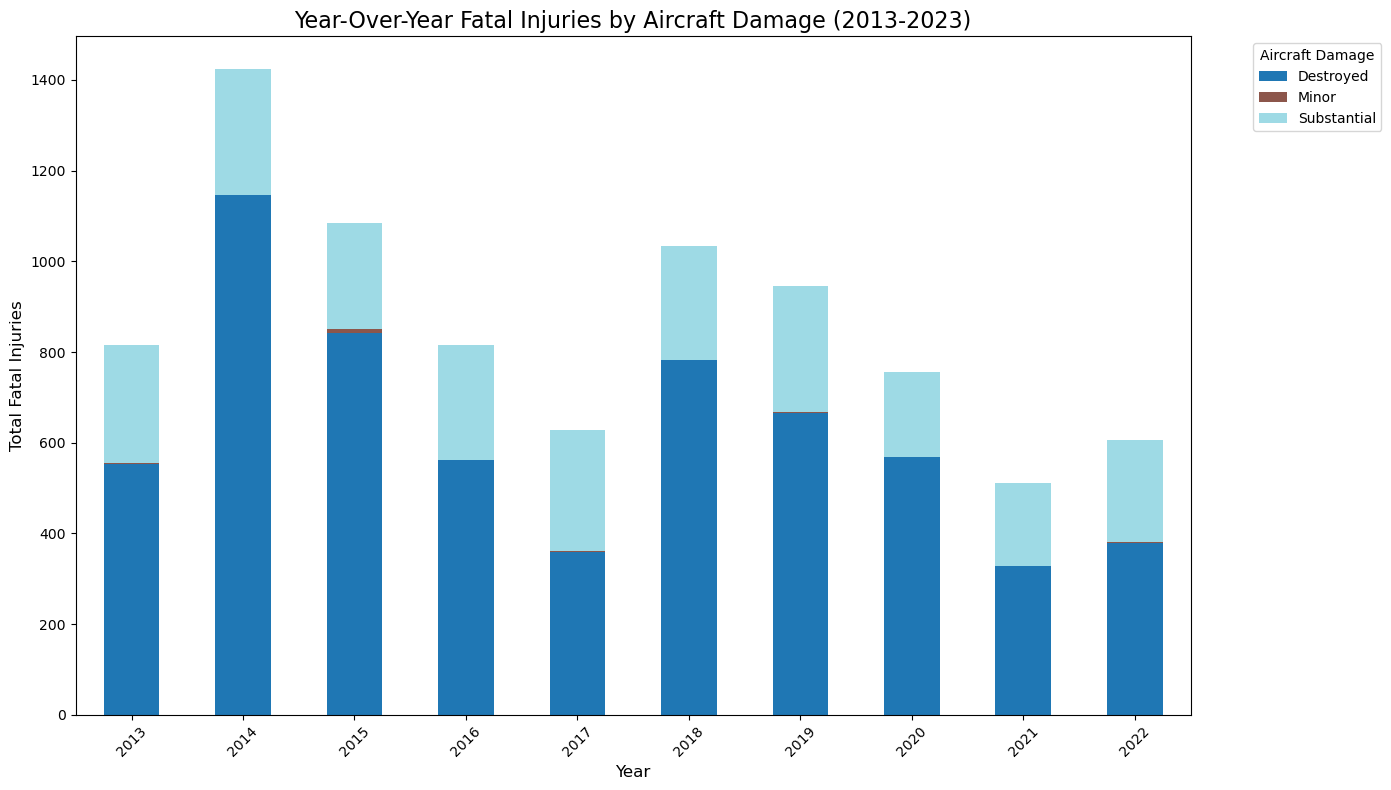

In [136]:
pivot_yearly_damage.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Year-Over-Year Fatal Injuries by Aircraft Damage (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [137]:
damage_make_fatalities = (
    filtered_df.groupby(['Year', 'Make', 'Aircraft.damage'])['Total.Fatal.Injuries']
    .sum()
    .reset_index()
)
damage_make_fatalities

Year            Make Aircraft.damage  Total.Fatal.Injuries
0     2013      781569 inc     Substantial                   0.0
1     2013       adolphson     Substantial                   0.0
2     2013  aero commander     Substantial                   0.0
3     2013  aero vodochody     Substantial                   0.0
4     2013         aeronca       Destroyed                   2.0
...    ...             ...             ...                   ...
4073  2022   wren ronnie d     Substantial                   2.0
4074  2022        yakovlev       Destroyed                   1.0
4075  2022        yakovlev     Substantial                   0.0
4076  2022    yates mike e     Substantial                   0.0
4077  2022          zenith     Substantial                   1.0

[4078 rows x 4 columns]

In [138]:
damage_make_fatalities['Rank'] = damage_make_fatalities.groupby('Year')['Total.Fatal.Injuries'].rank(ascending=False)
top_5_damage_makes = damage_make_fatalities[damage_make_fatalities['Rank'] <= 5]

print(top_5_damage_makes)

      Year               Make Aircraft.damage  Total.Fatal.Injuries  Rank
56    2013              beech       Destroyed                  64.0   3.0
73    2013             boeing       Destroyed                  60.0   5.0
99    2013             cessna       Destroyed                  89.0   1.0
101   2013             cessna     Substantial                  61.0   4.0
313   2013              piper       Destroyed                  66.0   2.0
456   2014  airbus industries       Destroyed                 162.0   2.0
475   2014                atr       Destroyed                  58.0   5.0
504   2014             boeing       Destroyed                 535.0   1.0
526   2014             cessna       Destroyed                  90.0   3.0
777   2014              piper       Destroyed                  68.0   4.0
931   2015  airbus industries       Destroyed                 374.0   1.0
963   2015              beech       Destroyed                  60.0   4.0
1014  2015             cessna       De

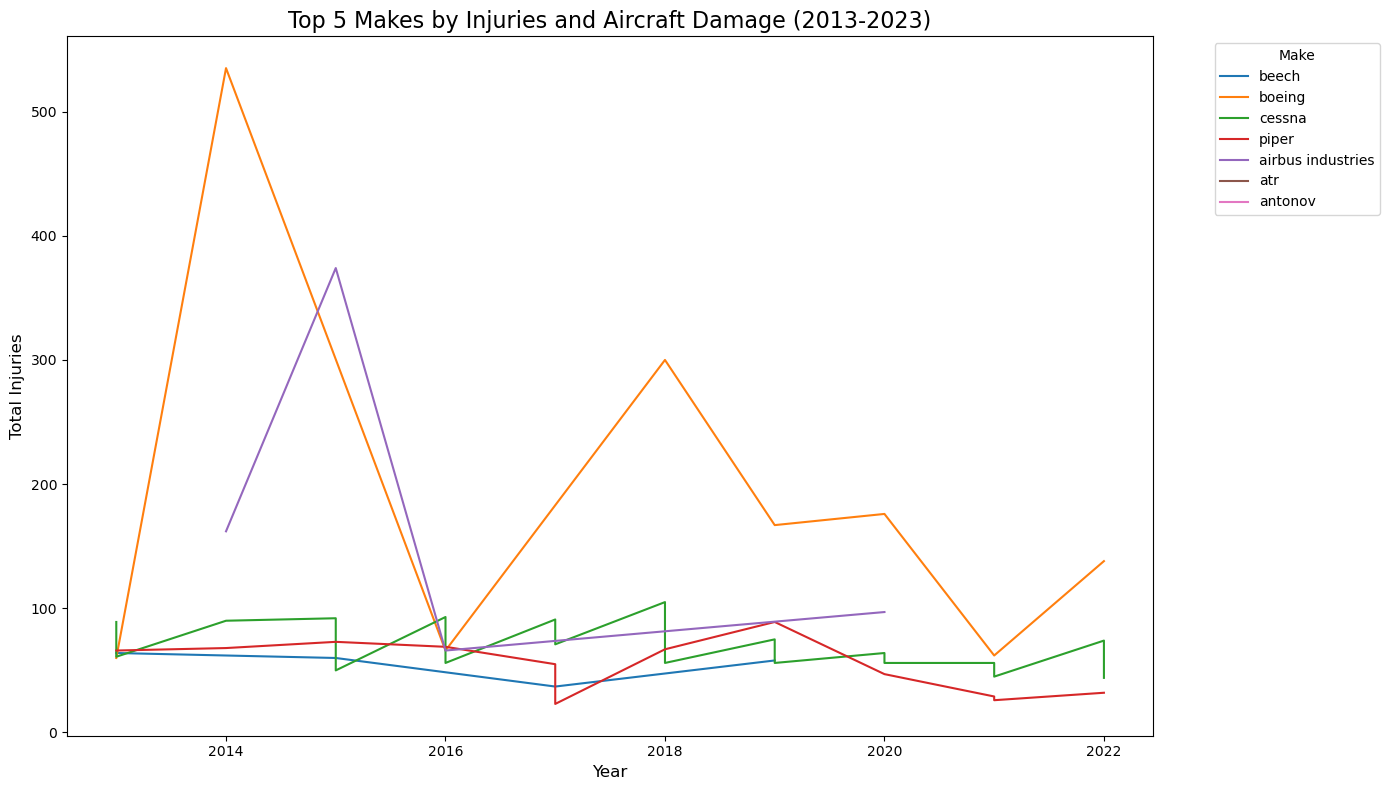

In [139]:
plt.figure(figsize=(14, 8))

for make in top_5_damage_makes['Make'].unique():
    yearly_data = top_5_damage_makes[top_5_damage_makes['Make'] == make]
    plt.plot(yearly_data['Year'], yearly_data['Total.Fatal.Injuries'], label=make)

plt.title('Top 5 Makes by Injuries and Aircraft Damage (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Injuries', fontsize=12)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In the above graph data stops for Airbus after 2020. The next 2-3 cells will be data pertaining to Airbus, followed by Beech (data stops 2019), Piper, and Cesna. Their low fatal injuries might indicate that they're strong companies to work with.

In [140]:
airbus_df = filtered_df[(filtered_df['Make'] == 'airbus industries') & (filtered_df['Year'] >= 2013 ) & (filtered_df['Year'] <= 2023)]

In [141]:
airbus_quant_columns = [
    'Injury.Severity',
    'Total.Uninjured',
]

print(airbus_quant_columns)

['Injury.Severity', 'Total.Uninjured']


In [142]:
airbus_summary = airbus_df[airbus_quant_columns].describe()
print(airbus_summary)

       Total.Uninjured
count        85.000000
mean        110.788235
std         108.339534
min           0.000000
25%           2.000000
50%         115.000000
75%         162.000000
max         521.000000


In [143]:
airbus_yearly_data = (
    airbus_df.groupby('Year')[airbus_quant_columns]
    .sum()
    .reset_index()
)

print(airbus_yearly_data)

   Year                                    Injury.Severity  Total.Uninjured
0  2013  Non-FatalNon-FatalNon-FatalNon-FatalFatalNon-F...           1167.0
1  2014  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalF...            784.0
2  2015  Non-FatalFatalNon-FatalNon-FatalNon-FatalNon-F...            864.0
3  2016  Non-FatalNon-FatalNon-FatalFatalNon-FatalFatal...            483.0
4  2017  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...           2171.0
5  2018  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...           1282.0
6  2019  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...            771.0
7  2020                   Non-FatalNon-FatalFatalNon-Fatal            297.0
8  2021      Non-FatalNon-FatalNon-FatalNon-FatalNon-Fatal            726.0
9  2022  SeriousNon-FatalSeriousSeriousNon-FatalSerious...            872.0


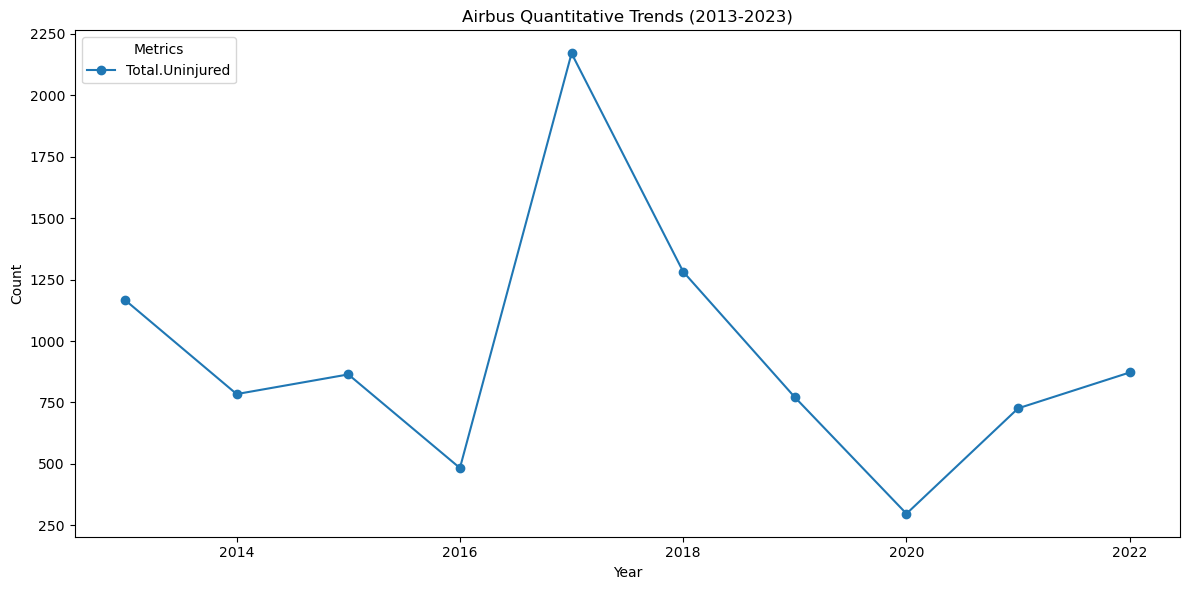

In [144]:
airbus_yearly_data.plot(x='Year', figsize=(12, 6), marker='o', title='Airbus Quantitative Trends (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()

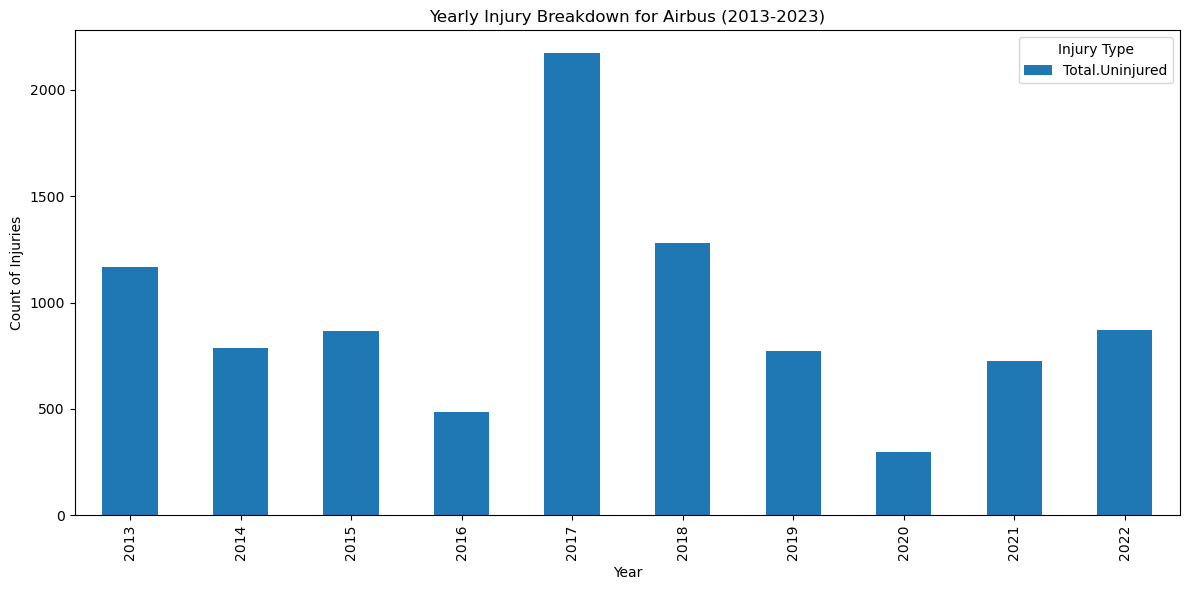

In [145]:
injury_columns = ['Injury.Severity', 'Total.Uninjured']
airbus_yearly_injuries = airbus_yearly_data[['Year'] + injury_columns].set_index('Year')

airbus_yearly_injuries.plot(kind='bar', stacked=True, figsize=(12, 6), title='Yearly Injury Breakdown for Airbus (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Count of Injuries')
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

In [146]:
airbus_engtype_inj = (airbus_df.groupby(['Year', 'Engine.Type'])[['Injury.Severity', 'Total.Uninjured']].sum().reset_index())
print(airbus_engtype_inj)

    Year  Engine.Type                                    Injury.Severity  \
0   2013    Turbo Fan          Non-FatalNon-FatalNon-FatalNon-FatalFatal   
1   2014    Turbo Fan                                 Non-FatalNon-Fatal   
2   2014  Turbo Shaft                                 Non-FatalNon-Fatal   
3   2015    Turbo Fan  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...   
4   2015  Turbo Shaft  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...   
5   2016    Turbo Fan          Non-FatalNon-FatalFatalNon-FatalNon-Fatal   
6   2016  Turbo Shaft          Non-FatalNon-FatalFatalNon-FatalNon-Fatal   
7   2017    Turbo Fan  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...   
8   2017  Turbo Shaft                                 Non-FatalNon-Fatal   
9   2018    Turbo Fan      Non-FatalNon-FatalNon-FatalNon-FatalNon-Fatal   
10  2018    Turbo Jet                                          Non-Fatal   
11  2019    Turbo Fan                                 Non-FatalNon-Fatal   
12  2019  Tu

In [147]:
damage_vs_serious = filtered_df.groupby('Aircraft.damage')['Total.Serious.Injuries'].agg(['sum','mean']).reset_index()
print(damage_vs_serious)

  Aircraft.damage     sum      mean
0       Destroyed   372.0  0.178076
1           Minor    37.0  0.327434
2     Substantial  3902.0  0.331831


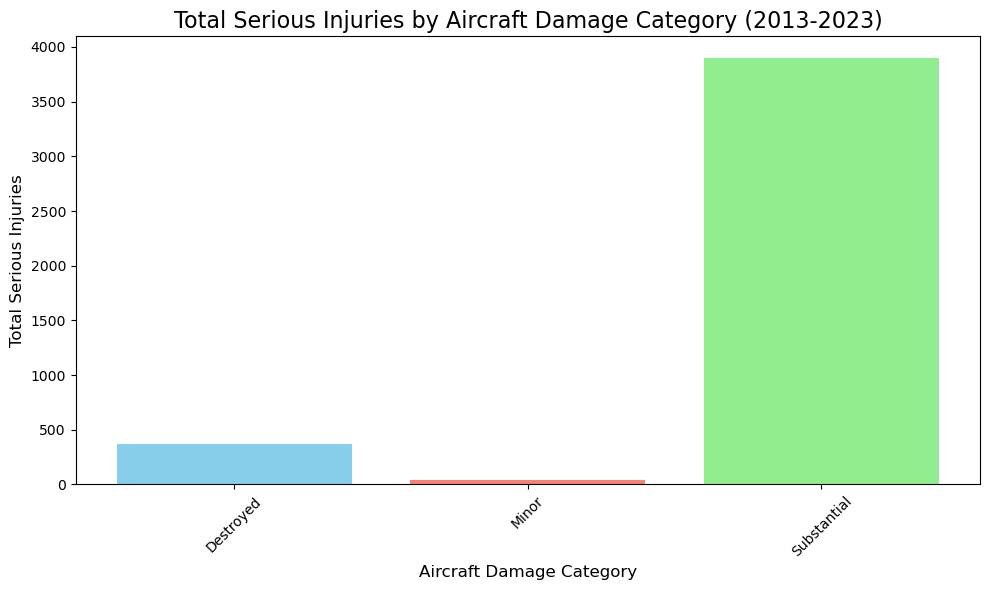

In [148]:
plt.figure(figsize=(10, 6))
plt.bar(damage_vs_serious['Aircraft.damage'], damage_vs_serious['sum'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Total Serious Injuries by Aircraft Damage Category (2013-2023)', fontsize=16)
plt.xlabel('Aircraft Damage Category', fontsize=12)
plt.ylabel('Total Serious Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [149]:
yearly_damage_serious = (
    filtered_df.groupby(['Year', 'Aircraft.damage'])['Total.Serious.Injuries']
    .sum()
    .reset_index()
)
print(yearly_damage_serious.head())

   Year Aircraft.damage  Total.Serious.Injuries
0  2013       Destroyed                   164.0
1  2013           Minor                    16.0
2  2013     Substantial                   444.0
3  2014       Destroyed                    13.0
4  2014           Minor                     1.0


In [150]:
pivot_yearly_damage_serious = yearly_damage_serious.pivot(
    index='Year', columns='Aircraft.damage', values='Total.Serious.Injuries'
).fillna(0)

print(pivot_yearly_damage_serious)

Aircraft.damage  Destroyed  Minor  Substantial
Year                                          
2013                 164.0   16.0        444.0
2014                  13.0    1.0        396.0
2015                  22.0    1.0        410.0
2016                  28.0    0.0        406.0
2017                  25.0    2.0        369.0
2018                  49.0    3.0        498.0
2019                  30.0    7.0        330.0
2020                  21.0    4.0        450.0
2021                  15.0    0.0        283.0
2022                   5.0    3.0        316.0


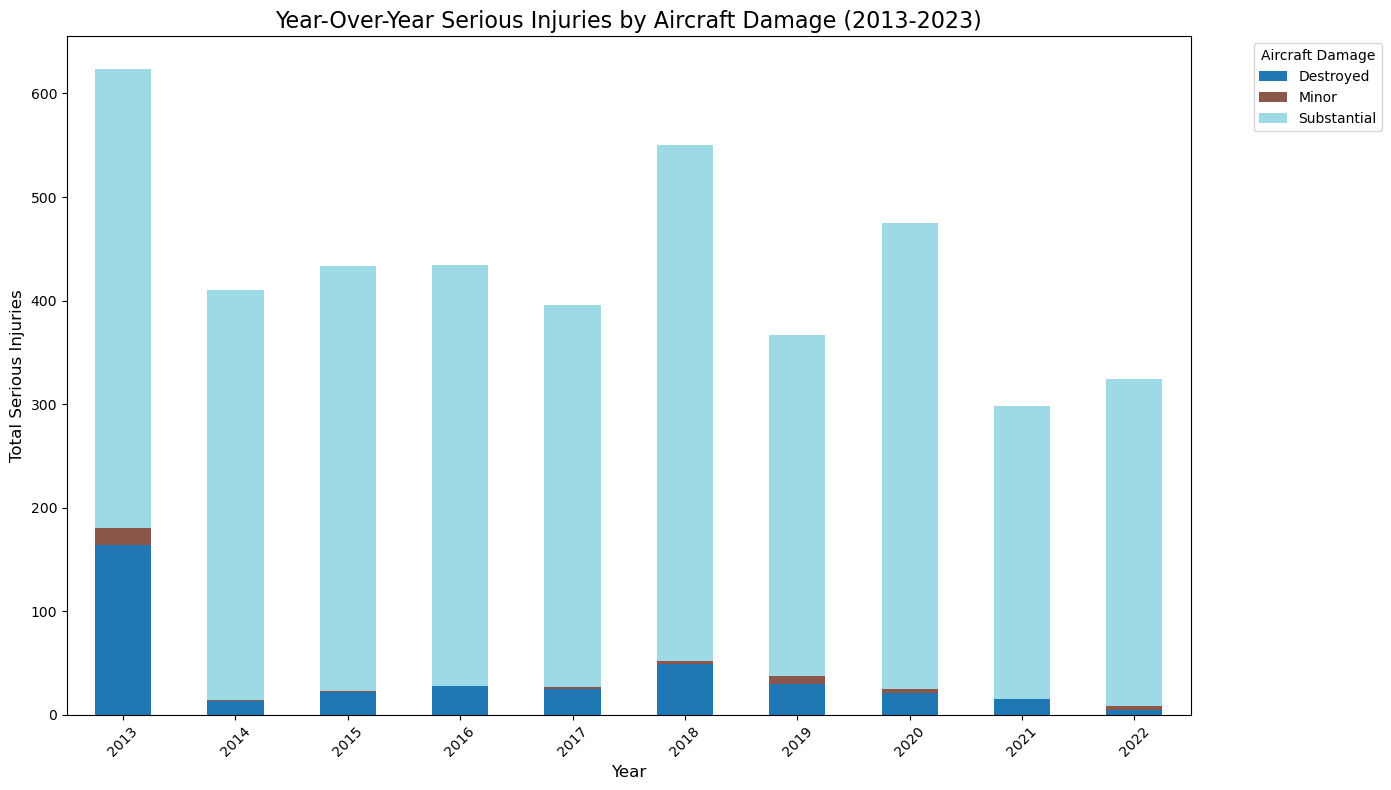

In [151]:
pivot_yearly_damage_serious.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Year-Over-Year Serious Injuries by Aircraft Damage (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Serious Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

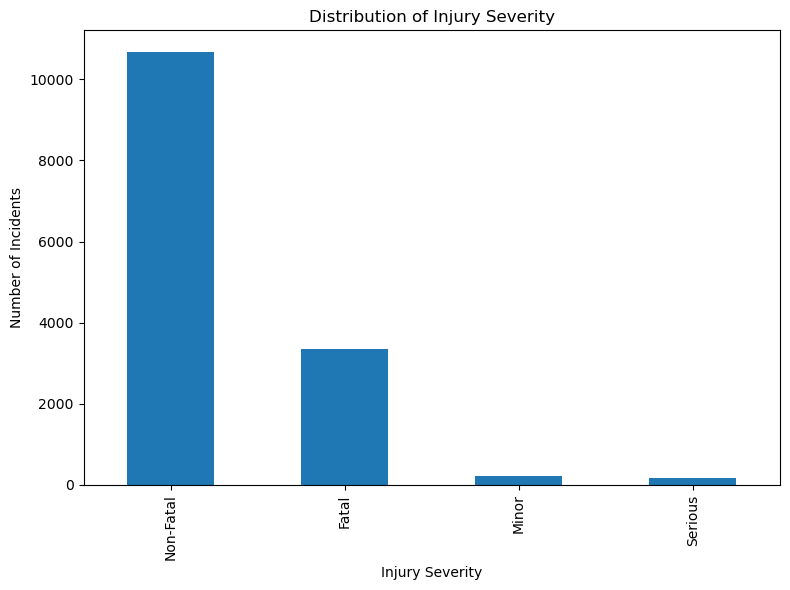

In [152]:
severity_distribution = filtered_df['Injury.Severity'].value_counts()
severity_distribution.plot(kind='bar', figsize=(8, 6), title='Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

In [155]:
severity_make = filtered_df.groupby(['Injury.Severity', 'Make']).size().reset_index(name='Count')
top_severity_make = severity_make.sort_values(by='Count', ascending=False).groupby('Injury.Severity').head(5)

print(top_severity_make)

     Injury.Severity                         Make  Count
1128       Non-Fatal                       cessna   2811
2044       Non-Fatal                        piper   1588
169            Fatal                       cessna    721
981        Non-Fatal                        beech    516
517            Fatal                        piper    479
987        Non-Fatal                         bell    279
103            Fatal                        beech    232
1028       Non-Fatal                       boeing    226
109            Fatal                         bell    126
561            Fatal                     robinson    126
735            Minor                       cessna     60
2587         Serious                       cessna     26
775            Minor                        piper     25
2620         Serious                        piper     18
2581         Serious                       boeing     10
2576         Serious                        beech      8
782            Minor  robinson 

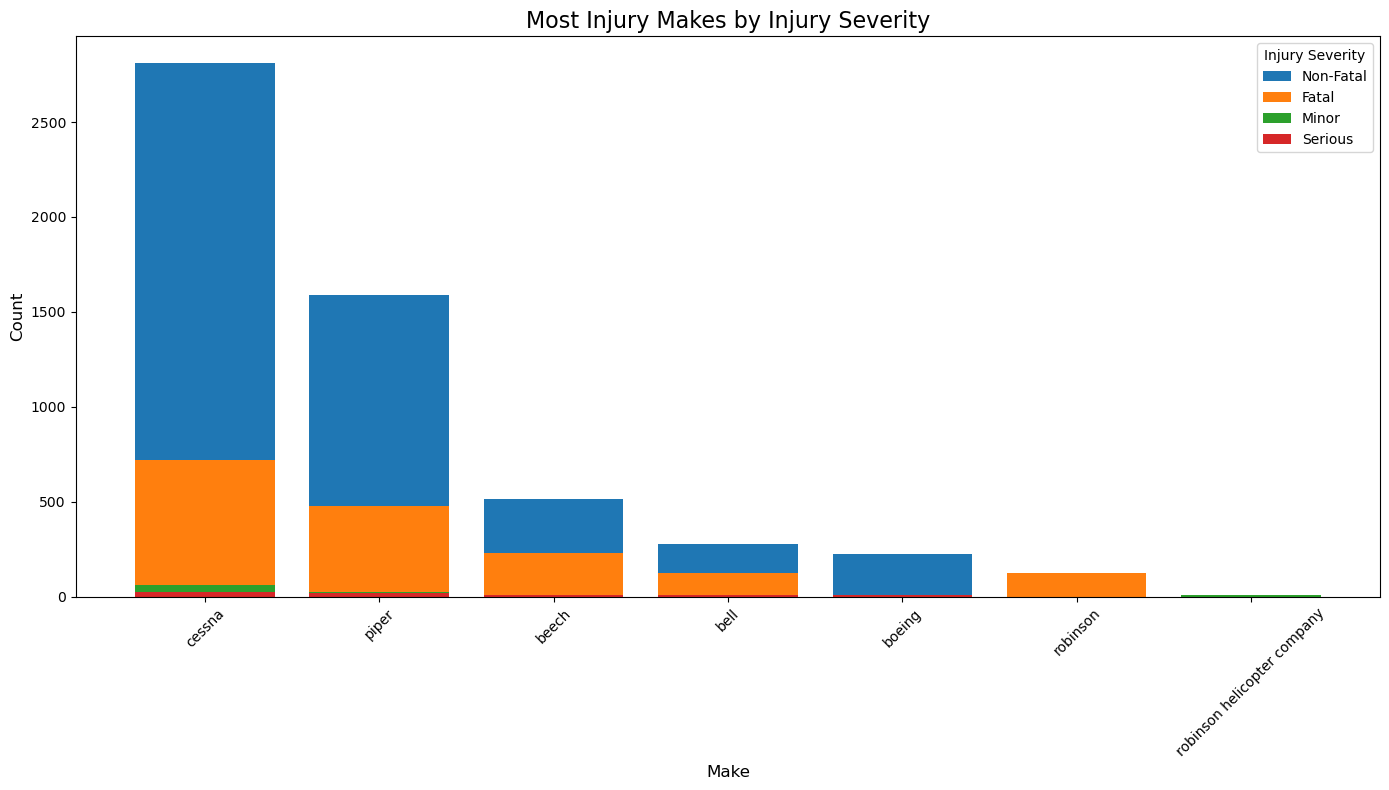

In [156]:
plt.figure(figsize=(14, 8))

for severity in top_severity_make['Injury.Severity'].unique():
    subset = top_severity_make[top_severity_make['Injury.Severity'] == severity]
    plt.bar(subset['Make'], subset['Count'], label=severity)

plt.title('Most Injury Makes by Injury Severity', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.tight_layout()

plt.show()

In [157]:
make_incidents = filtered_df.groupby('Make').size().reset_index(name='Incident.Count')
print(make_incidents)

                          Make  Incident.Count
0                    177mf llc               1
1                  2021fx3 llc               2
2                       3xtrim               1
3                 5 rivers llc               1
4                   781569 inc               1
...                        ...             ...
2243                    zodiac               1
2244  zs delta-bielsko wroclaw               1
2245             zubair s khan               1
2246            zuber thomas p               1
2247          zwicker murray r               1

[2248 rows x 2 columns]


In [158]:
mean_incidents = make_incidents['Incident.Count'].mean()
median_incidents = make_incidents['Incident.Count'].median()
std_incidents = make_incidents['Incident.Count'].std()

print(f"Mean: {mean_incidents}, Median: {median_incidents}, Std Dev: {std_incidents}")

Mean: 6.405693950177936, Median: 1.0, Std Dev: 91.05900219762738


In [159]:
lower_threshold = mean_incidents - std_incidents  
upper_threshold = mean_incidents + 2 * std_incidents  

print(f"Threshold: Between {lower_threshold} and {upper_threshold}")

Threshold: Between -84.65330824744944 and 188.5236983454327


In [160]:
filtered_makes = make_incidents[
    (make_incidents['Incident.Count'] >= lower_threshold) &
    (make_incidents['Incident.Count'] <= upper_threshold)
]

print(filtered_makes)

                          Make  Incident.Count
0                    177mf llc               1
1                  2021fx3 llc               2
2                       3xtrim               1
3                 5 rivers llc               1
4                   781569 inc               1
...                        ...             ...
2243                    zodiac               1
2244  zs delta-bielsko wroclaw               1
2245             zubair s khan               1
2246            zuber thomas p               1
2247          zwicker murray r               1

[2242 rows x 2 columns]


In [161]:
filtered_df['Make'].str.strip().str.upper().value_counts().head(50)

Make
CESSNA                            3618
PIPER                             2110
BEECH                              759
BELL                               416
ROBINSON                           271
BOEING                             268
MOONEY                             184
AIR TRACTOR INC                    146
CIRRUS DESIGN CORP                 135
ROBINSON HELICOPTER                127
ROBINSON HELICOPTER COMPANY        125
VANS                               119
AIR TRACTOR                        111
AERONCA                            109
BELLANCA                           108
MAULE                              102
CHAMPION                            97
HUGHES                              96
CIRRUS                              92
AIRBUS INDUSTRIES                   85
SCHWEIZER                           82
STINSON                             75
LUSCOMBE                            70
EUROCOPTER                          64
GRUMMAN                             63
NORTH AMERICAN      

In [162]:
filtered_df['Make'] = df['Make'].str.upper().replace(r'.*\b(AIRBUS|BOEING|CESSNA|PIPER|BEECH)\b.*', r'\1', regex=True)


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_699/565155406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Make'] = df['Make'].str.upper().replace(r'.*\b(AIRBUS|BOEING|CESSNA|PIPER|BEECH)\b.*', r'\1', regex=True)


In [163]:
filtered_df['Make'].value_counts().head(50)

Make
CESSNA                            3665
PIPER                             2153
BEECH                              767
BELL                               416
BOEING                             274
ROBINSON                           271
MOONEY                             184
AIR TRACTOR INC                    146
CIRRUS DESIGN CORP                 135
ROBINSON HELICOPTER                127
ROBINSON HELICOPTER COMPANY        125
VANS                               119
AIR TRACTOR                        111
AERONCA                            109
BELLANCA                           108
MAULE                              102
AIRBUS                             102
CHAMPION                            97
HUGHES                              96
CIRRUS                              92
SCHWEIZER                           82
STINSON                             75
LUSCOMBE                            70
EUROCOPTER                          64
GRUMMAN                             63
NORTH AMERICAN      

In [164]:
filtered_rows = filtered_df[filtered_df['Make'].isin(['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH'])]
(filtered_rows)

Investigation.Type Event.Date             Location        Country  \
70205           Accident 2013-01-01        Chiloquin, OR  United States   
70206           Accident 2013-01-02  North Las Vegas, NV  United States   
70208           Accident 2013-01-02           Jasper, AL  United States   
70217           Accident 2013-01-04       Palm Coast, FL  United States   
70218           Accident 2013-01-04           Palmer, AK  United States   
...                  ...        ...                  ...            ...   
84597           Accident 2022-12-16      Brooksville, FL  United States   
84599           Accident 2022-12-18       San Manual, AZ  United States   
84600           Accident 2022-12-21     Auburn Hills, MI  United States   
84603           Accident 2022-12-26        Annapolis, MD  United States   
84605           Accident 2022-12-29           Athens, GA  United States   

      Injury.Severity Aircraft.damage Aircraft.Category    Make       Model  \
70205       Non-Fatal     Substantial          Airplane  CESSNA        182P   
70206       Non-Fatal     Substantial          Airplane   PIPER  PA-60-602P   
70208           Fatal       Destroyed          Airplane   PIPER       PA-30   
70217           Fatal       Destroyed          Airplane   BEECH         H35   
70218       Non-Fatal     Substantial          Airplane   PIPER   PA-18-150   
...               ...             ...               ...     ...         ...   
84597           Minor     Substantial          Airplane  CESSNA       R172K   
84599       Non-Fatal             NaN               NaN   PIPER        PA28   
84600           Minor             NaN               NaN  CESSNA        172F   
84603           Minor             NaN               NaN   PIPER   PA-28-151   
84605           Minor             NaN               NaN   PIPER   PA-24-260   

      Amateur.Built  ...  Purpose.of.flight Total.Fatal.Injuries  \
70205            No  ...      Instructional                  0.0   
70206            No  ...      Instructional                  0.0   
70208            No  ...           Personal                  3.0   
70217            No  ...           Personal                  3.0   
70218            No  ...           Personal                  0.0   
...             ...  ...                ...                  ...   
84597            No  ...           Personal                  0.0   
84599            No  ...           Personal                  0.0   
84600            No  ...           Personal                  0.0   
84603            No  ...           Personal                  0.0   
84605            No  ...           Personal                  0.0   

      Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
70205                    0.0                   0.0              2.0   
70206                    0.0                   0.0              2.0   
70208                    0.0                   0.0              0.0   
70217                    0.0                   0.0              0.0   
70218                    0.0                   0.0              1.0   
...                      ...                   ...              ...   
84597                    1.0                   1.0              0.0   
84599                    0.0                   0.0              3.0   
84600                    1.0                   1.0              0.0   
84603                    1.0                   1.0              0.0   
84605                    1.0                   1.0              1.0   

       Weather.Condition  Broad.phase.of.flight  \
70205                VMC                    NaN   
70206                VMC                    NaN   
70208                IMC                    NaN   
70217                IMC                    NaN   
70218                VMC                    NaN   
...                  ...                    ...   
84597                VMC                    NaN   
84599                NaN                    NaN   
84600                NaN   

Cessna Dive

In [165]:
cessna_df = filtered_df[filtered_df['Make'] == 'CESSNA']
print(cessna_df)

      Investigation.Type Event.Date          Location        Country  \
70205           Accident 2013-01-01     Chiloquin, OR  United States   
70221           Accident 2013-01-05      Skwentna, AK  United States   
70233           Accident 2013-01-11       Brandon, FL  United States   
70244           Accident 2013-01-16      Pellston, MI  United States   
70251           Accident 2013-01-18       Redmond, OR  United States   
...                  ...        ...               ...            ...   
84584           Accident 2022-12-10     Alabaster, AL  United States   
84586           Accident 2022-12-12     Knoxville, TN  United States   
84592           Accident 2022-12-13       Liberal, KS  United States   
84597           Accident 2022-12-16   Brooksville, FL  United States   
84600           Accident 2022-12-21  Auburn Hills, MI  United States   

      Injury.Severity Aircraft.damage Aircraft.Category    Make  Model  \
70205       Non-Fatal     Substantial          Airplane  CESS

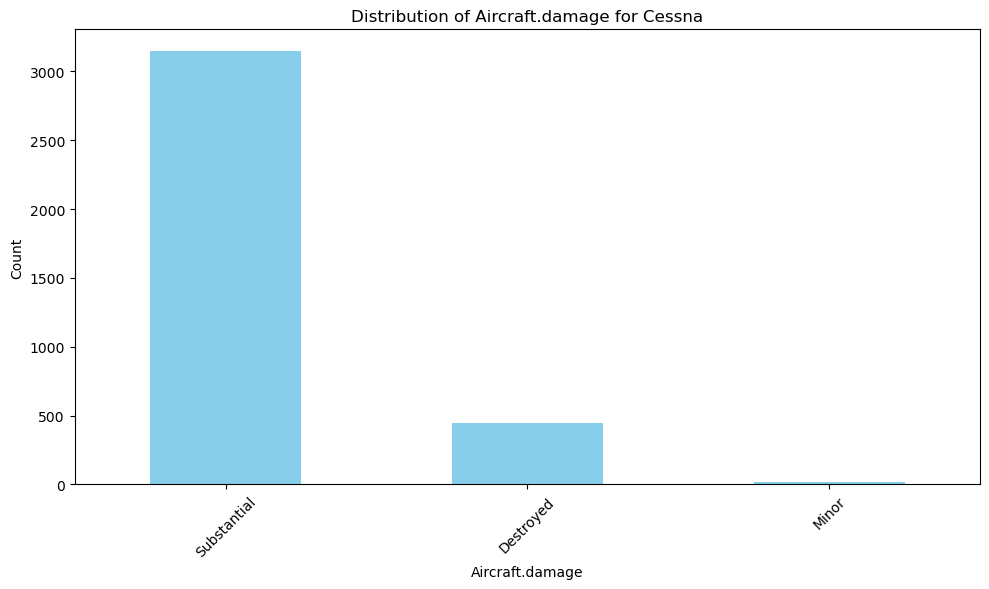

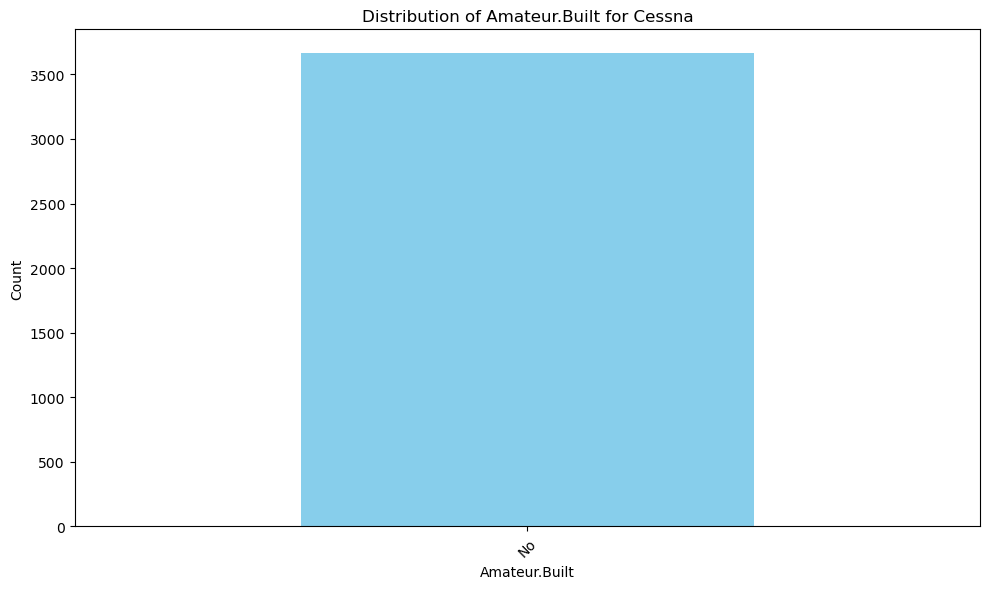

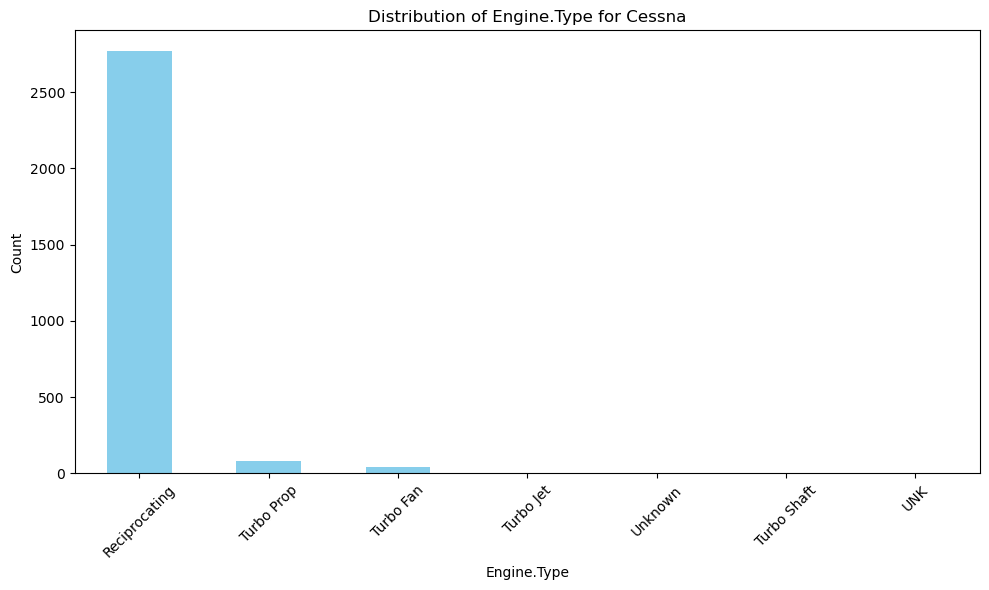

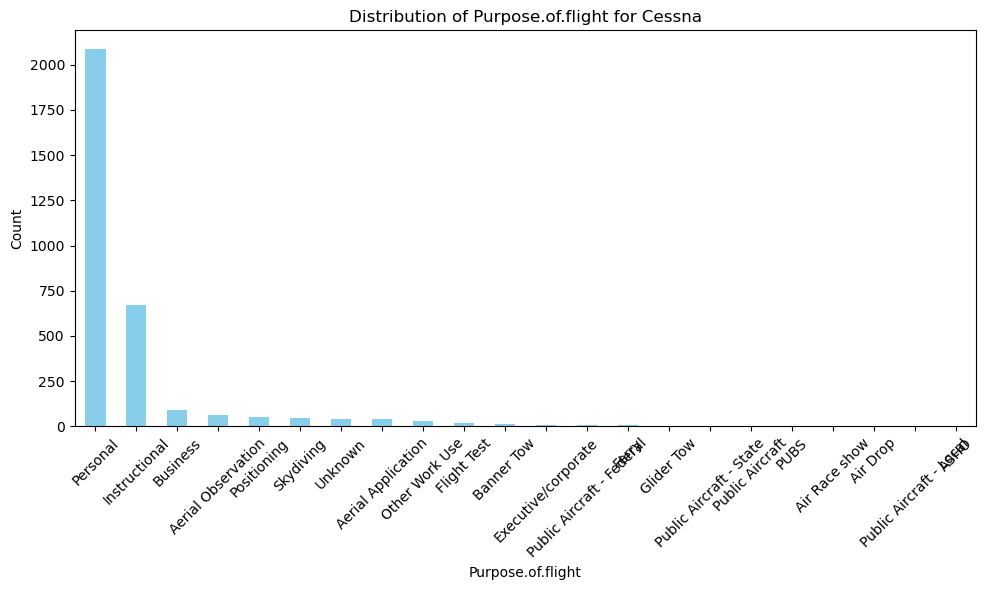

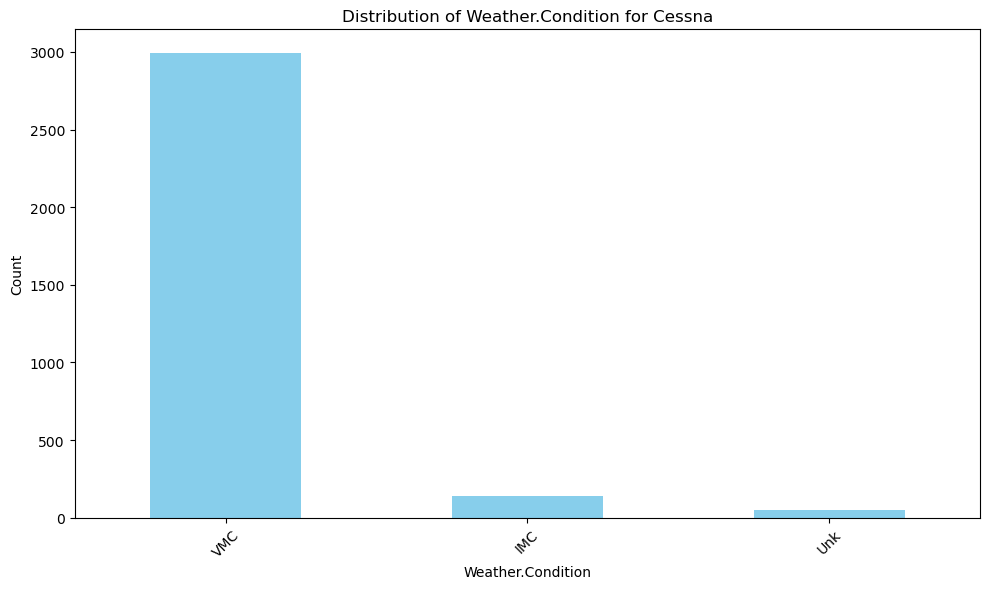

In [166]:
qualitative_columns = [
    'Aircraft.damage',
    'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
    'Weather.Condition'
]

for col in qualitative_columns:
    plt.figure(figsize=(10, 6))
    cessna_df[col].value_counts().plot(kind='bar', color='skyblue', title=f'Distribution of {col} for Cessna')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [167]:
quantitative_columns = [
    'Number.of.Engines',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Uninjured'
]

print(cessna_df[quantitative_columns].describe())

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count        3665.000000           3665.000000             3665.000000   
mean            1.097681              0.400273                0.261664   
std             0.305977              1.023176                0.705574   
min             1.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             4.000000             14.000000                9.000000   

       Total.Uninjured  
count      3665.000000  
mean          1.193179  
std           1.458227  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           2.000000  
max          18.000000  


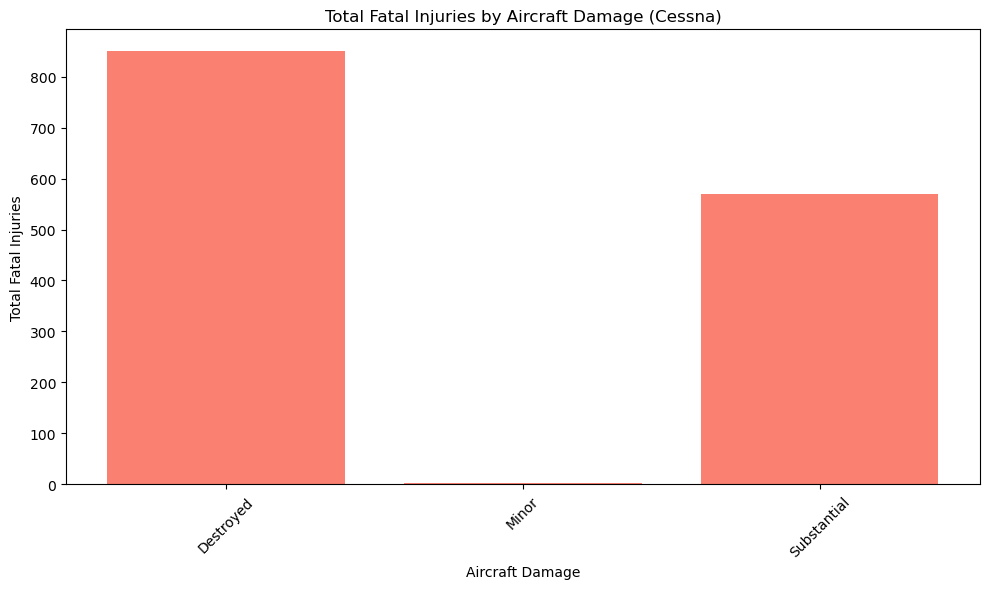

In [168]:
damage_fatalities = cessna_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(damage_fatalities['Aircraft.damage'], damage_fatalities['Total.Fatal.Injuries'], color='salmon')
plt.title('Total Fatal Injuries by Aircraft Damage (Cessna)')
plt.xlabel('Aircraft Damage')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

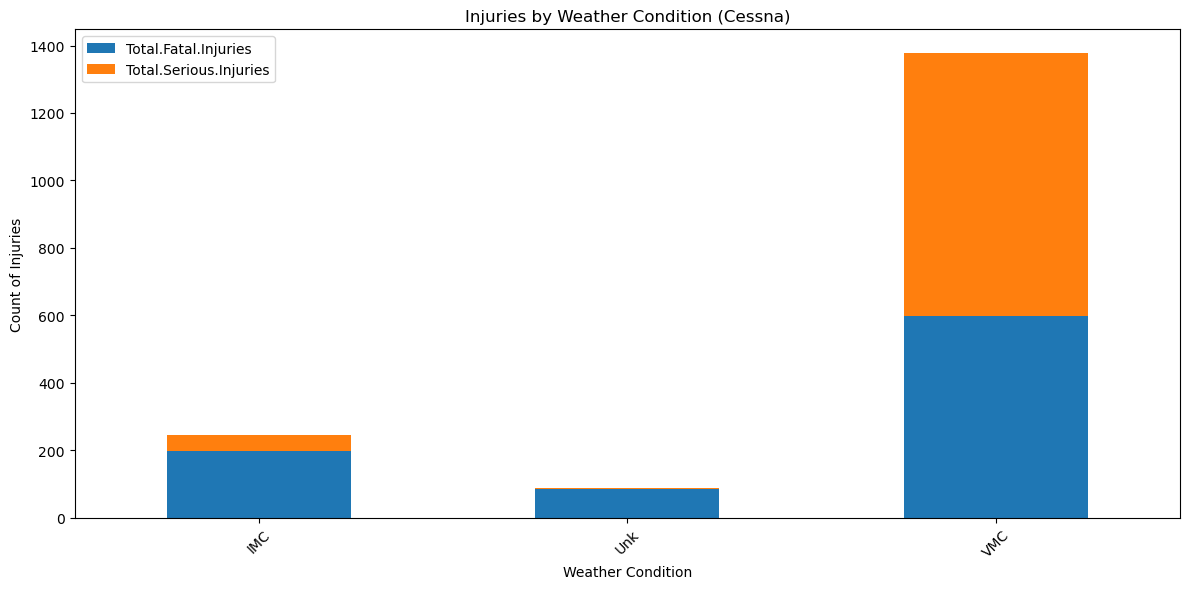

In [169]:
weather_injuries = cessna_df.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum().reset_index()

weather_injuries.set_index('Weather.Condition').plot(kind='bar', stacked=True, figsize=(12, 6), title='Injuries by Weather Condition (Cessna)')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

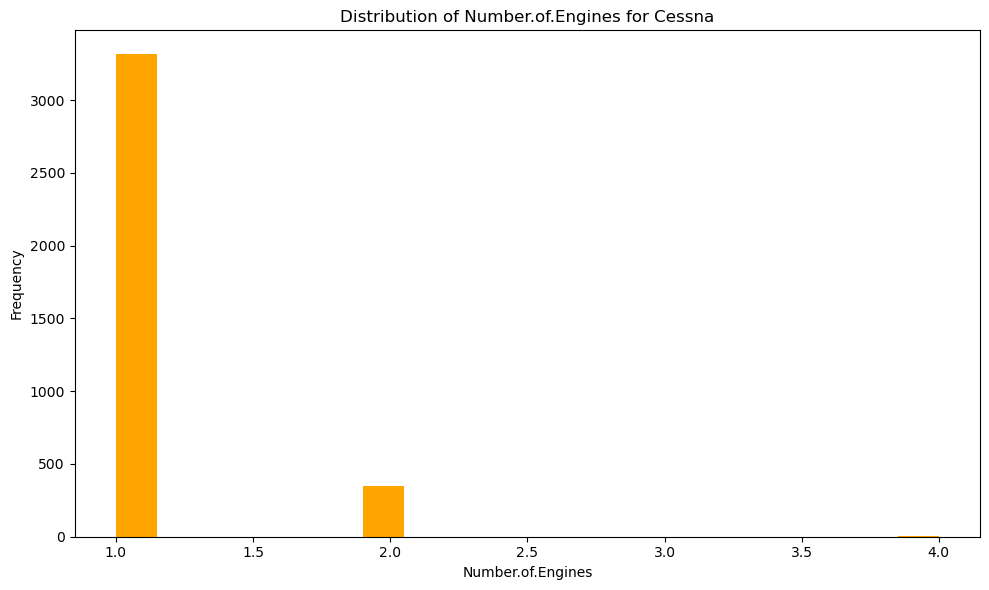

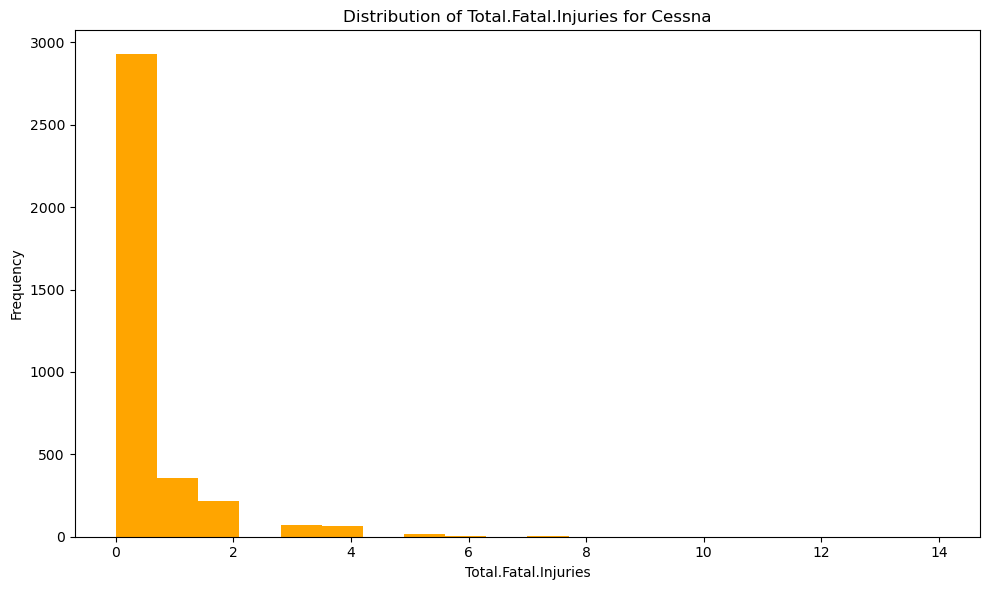

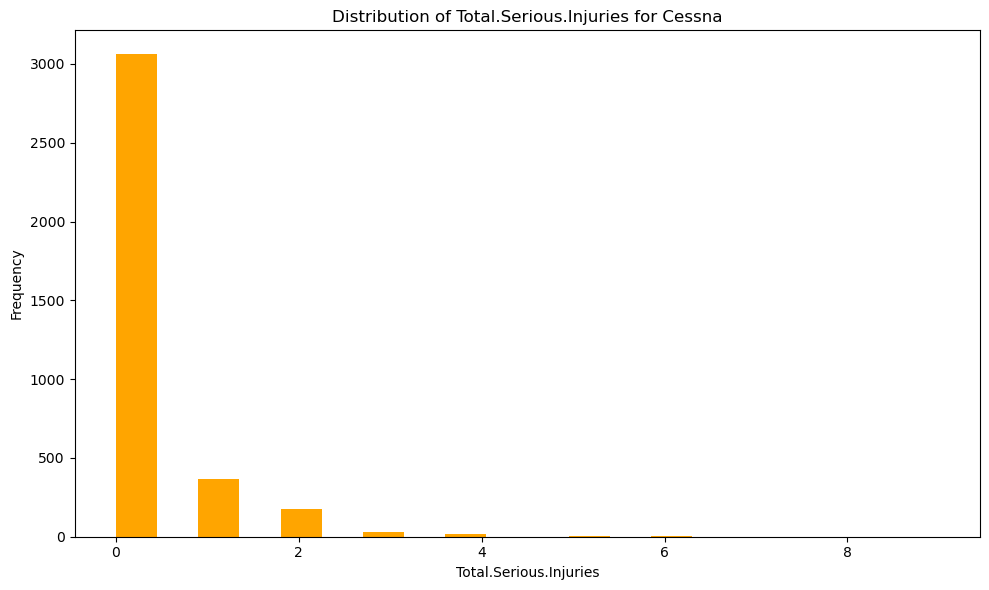

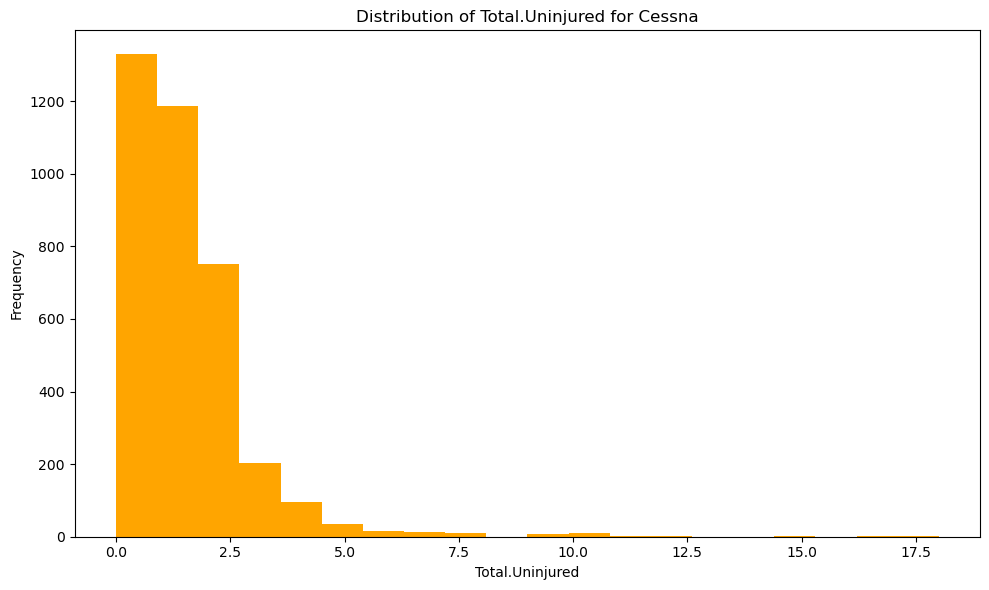

In [170]:
for col in quantitative_columns:
    plt.figure(figsize=(10, 6))
    
    cessna_data = pd.to_numeric(cessna_df[col], errors='coerce').dropna()
    
    # Plot the histogram if data is not empty
    if not cessna_data.empty:
        cessna_data.plot(kind='hist', bins=20, color='orange', title=f'Distribution of {col} for Cessna')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid numeric data for {col}")


In [171]:
cessna_means = cessna_df[quantitative_columns].mean()
cessna_sum = cessna_df[quantitative_columns].sum()
print(cessna_means)
print(cessna_sum)

Number.of.Engines         1.097681
Total.Fatal.Injuries      0.400273
Total.Serious.Injuries    0.261664
Total.Uninjured           1.193179
dtype: float64
Number.of.Engines         4023.0
Total.Fatal.Injuries      1467.0
Total.Serious.Injuries     959.0
Total.Uninjured           4373.0
dtype: float64


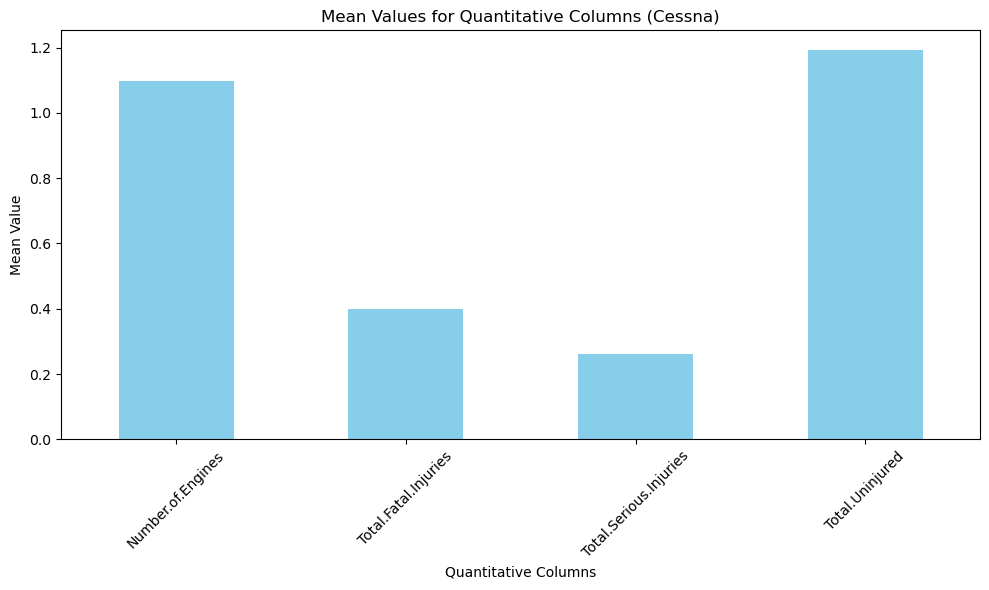

In [172]:
cessna_means.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Mean Values for Quantitative Columns (Cessna)')
plt.ylabel('Mean Value')
plt.xlabel('Quantitative Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [173]:
cessna_injuries_by_engine = (
    cessna_df.groupby(['Year', 'Engine.Type', 'Number.of.Engines'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .reset_index()
)

print(cessna_injuries_by_engine)

    Year    Engine.Type  Number.of.Engines  Total.Fatal.Injuries  \
0   2013  Reciprocating                1.0                  55.0   
1   2013  Reciprocating                2.0                  25.0   
2   2013      Turbo Fan                2.0                   6.0   
3   2013     Turbo Prop                1.0                  11.0   
4   2013     Turbo Prop                2.0                   1.0   
5   2013        Unknown                1.0                   5.0   
6   2014  Reciprocating                1.0                  93.0   
7   2014  Reciprocating                2.0                  14.0   
8   2014      Turbo Fan                2.0                   7.0   
9   2014     Turbo Prop                1.0                   2.0   
10  2015  Reciprocating                1.0                  81.0   
11  2015  Reciprocating                2.0                  19.0   
12  2015      Turbo Fan                1.0                   4.0   
13  2015      Turbo Fan                2.0      

In [175]:
cessna_injuries = (
    cessna_df.groupby(['Year', 'Engine.Type', 'Number.of.Engines'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .reset_index()
)

print(cessna_injuries.head())

   Year    Engine.Type  Number.of.Engines  Total.Fatal.Injuries  \
0  2013  Reciprocating                1.0                  55.0   
1  2013  Reciprocating                2.0                  25.0   
2  2013      Turbo Fan                2.0                   6.0   
3  2013     Turbo Prop                1.0                  11.0   
4  2013     Turbo Prop                2.0                   1.0   

   Total.Serious.Injuries  
0                    92.0  
1                     5.0  
2                     0.0  
3                    13.0  
4                     0.0  


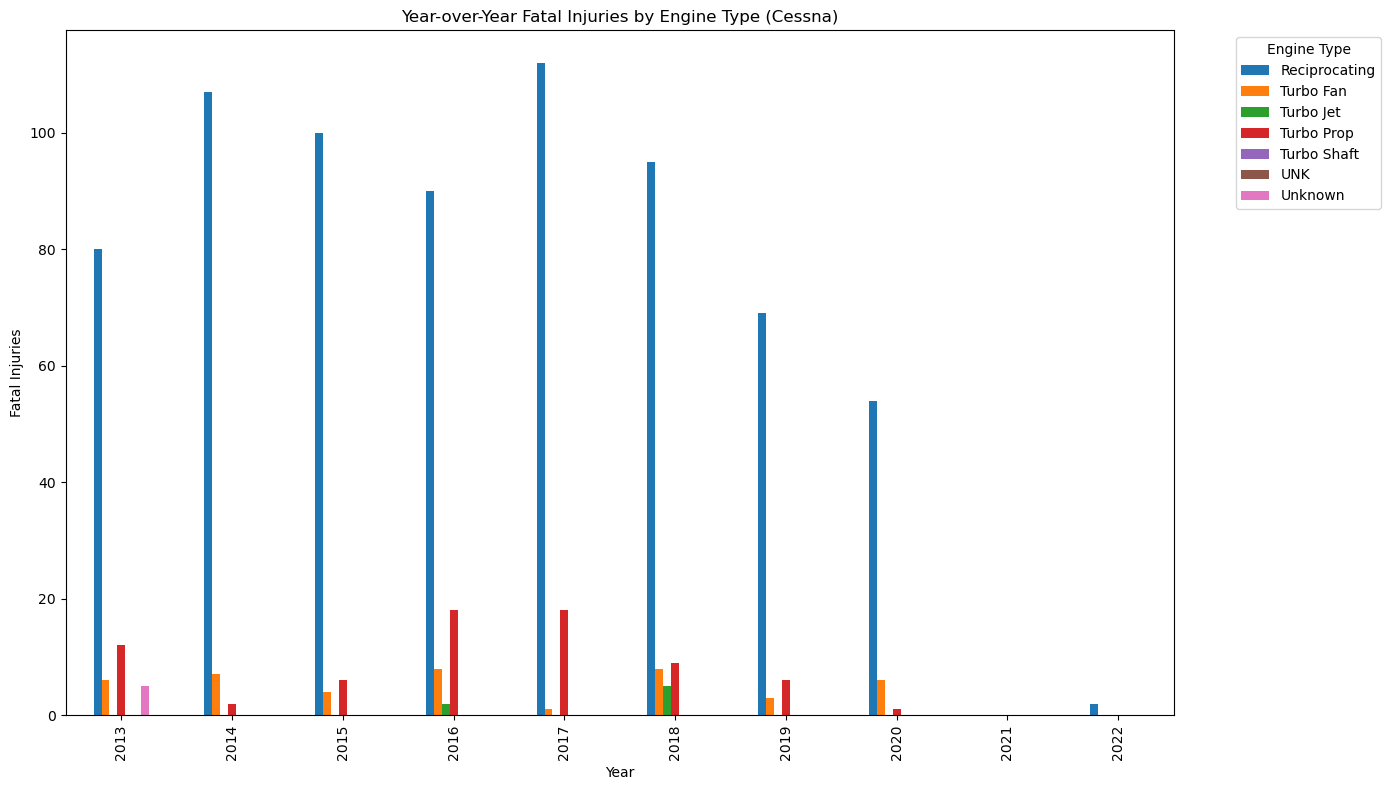

In [176]:
fatal_injuries_by_engine = cessna_injuries.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Engine Type (Cessna)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

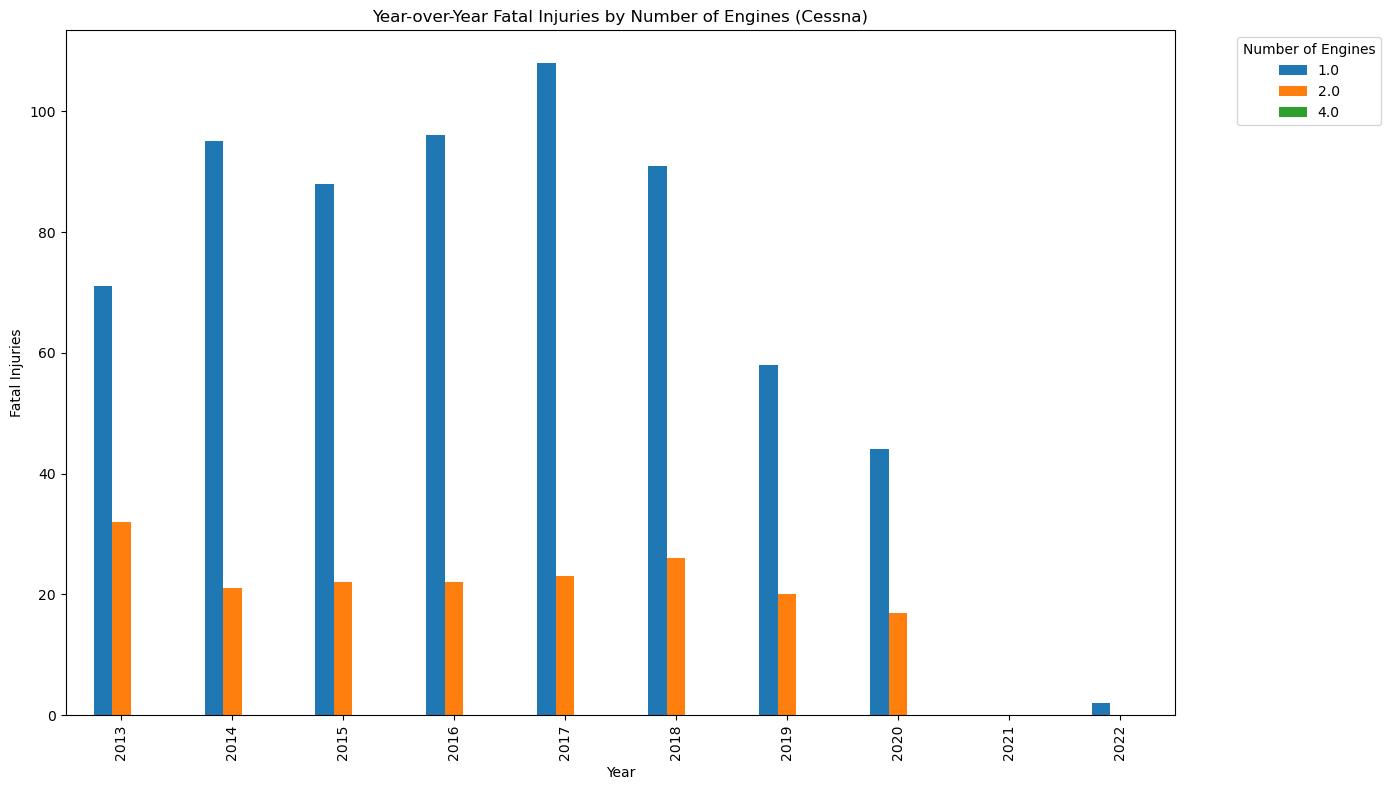

In [177]:
fatal_injuries_by_num_engines = cessna_injuries.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Number.of.Engines',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_num_engines.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Number of Engines (Cessna)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Number of Engines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

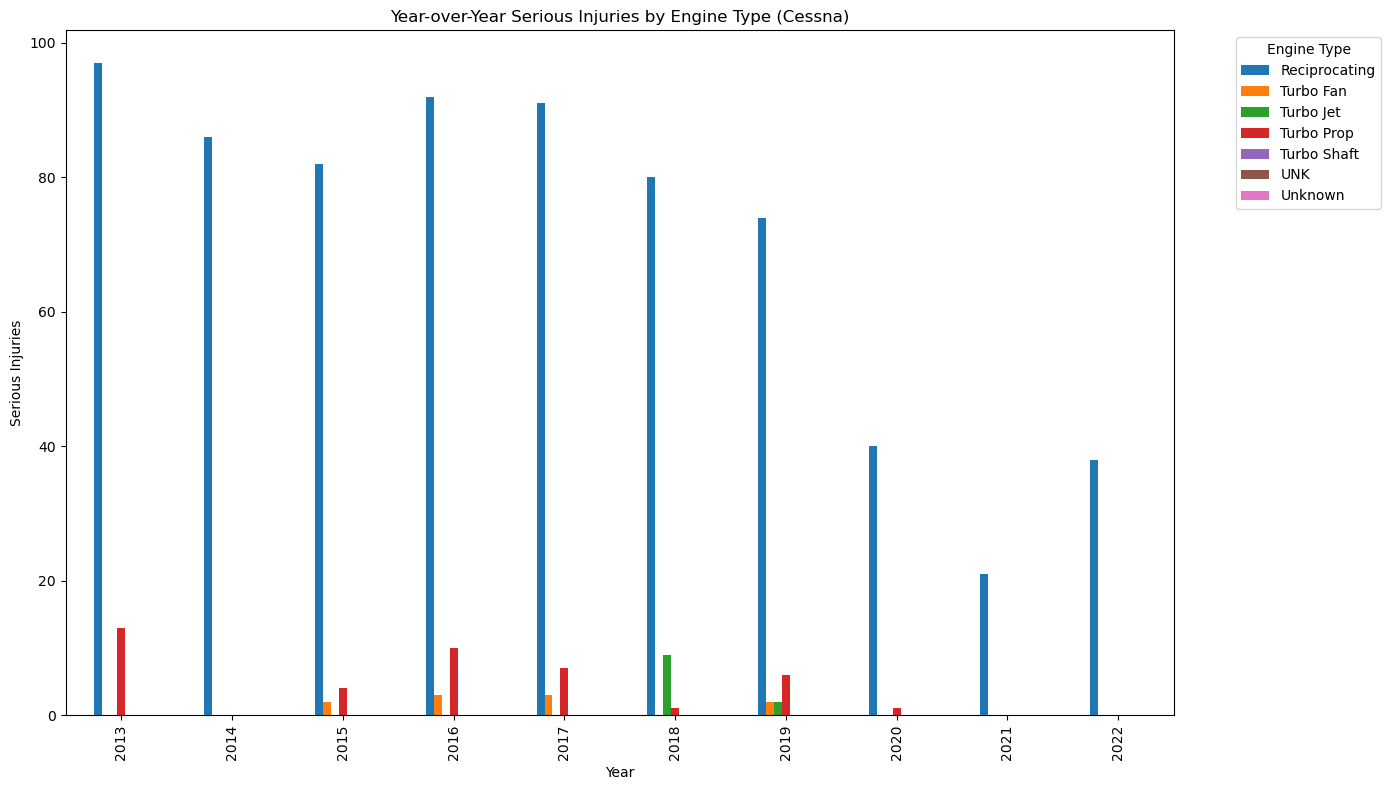

In [178]:
serious_injuries_by_engine = cessna_injuries.pivot_table(
    values='Total.Serious.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

serious_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Serious Injuries by Engine Type (Cessna)')
plt.xlabel('Year')
plt.ylabel('Serious Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

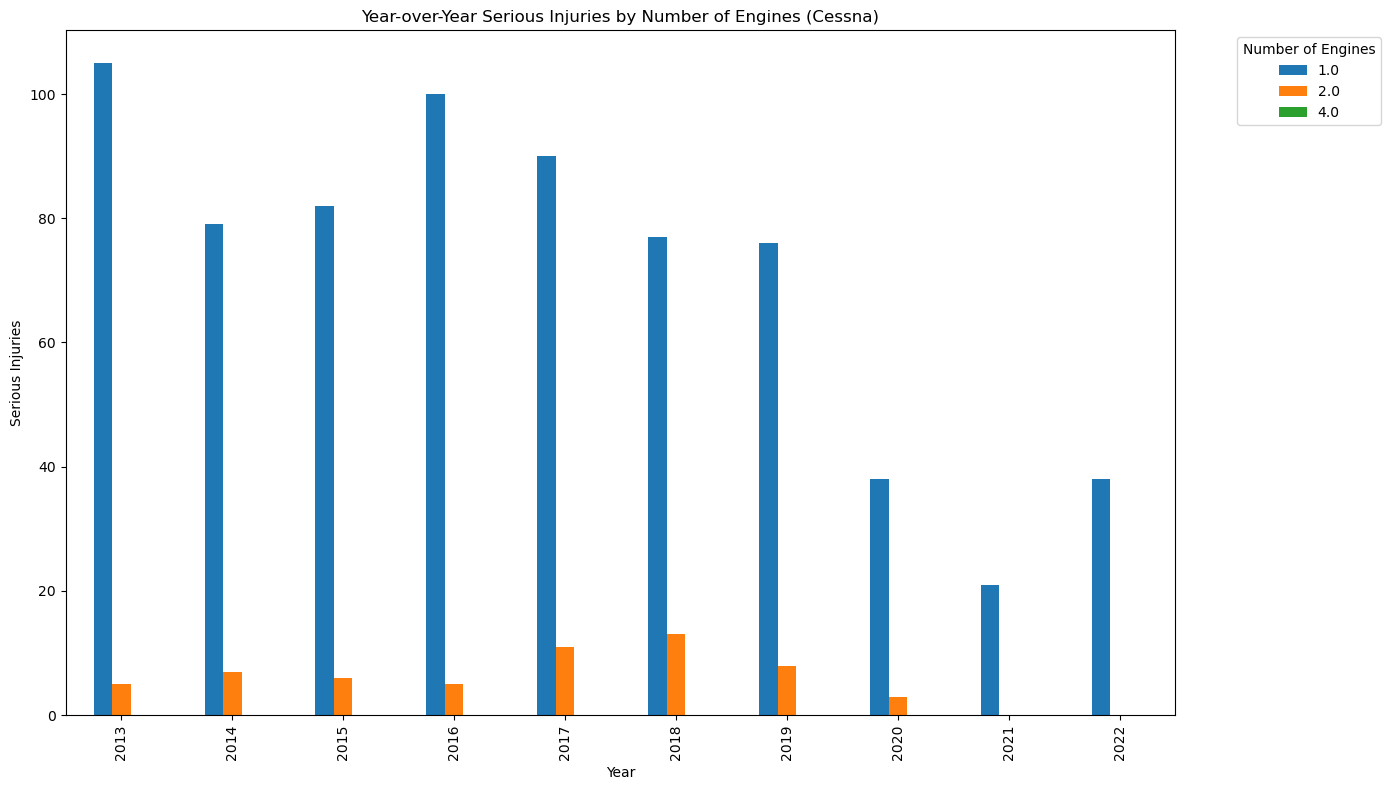

In [179]:
serious_injuries_by_num_engines = cessna_injuries.pivot_table(
    values='Total.Serious.Injuries',
    index='Year',
    columns='Number.of.Engines',
    aggfunc='sum',
    fill_value=0
)

serious_injuries_by_num_engines.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Serious Injuries by Number of Engines (Cessna)')
plt.xlabel('Year')
plt.ylabel('Serious Injuries')
plt.legend(title='Number of Engines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [180]:
boeing_df = filtered_df[filtered_df['Make'] == 'BOEING']
print(boeing_df)

      Investigation.Type Event.Date              Location        Country  \
70223           Accident 2013-01-07  Pucallpa, Peru, Peru           Peru   
70315           Accident 2013-02-11     Muscat, Mauritius      Mauritius   
70349           Accident 2013-02-19     Pacific Ocean, UN             UN   
70395           Accident 2013-03-08           Atlanta, GA  United States   
70443           Accident 2013-03-19              Mesa, AZ  United States   
...                  ...        ...                   ...            ...   
84434           Accident 2022-10-15          Petaluma, CA  United States   
84472           Accident 2022-10-26        Long Beach, CA  United States   
84509           Accident 2022-11-10             Miami, FL  United States   
84514           Accident 2022-11-12            Dallas, TX  United States   
84578           Accident 2022-12-08            Newark, NJ  United States   

      Injury.Severity Aircraft.damage Aircraft.Category    Make        Model  \
70223  

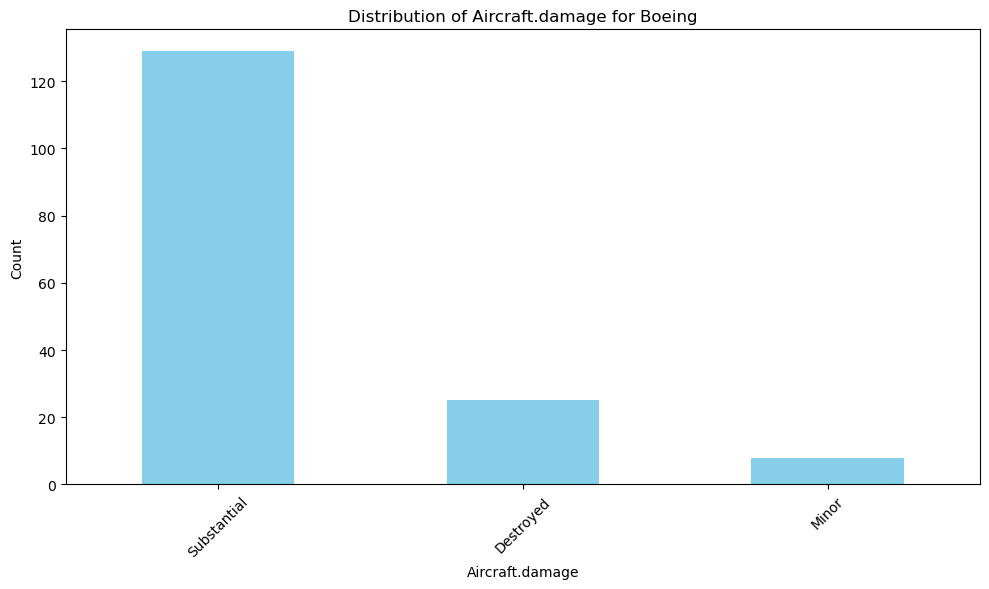

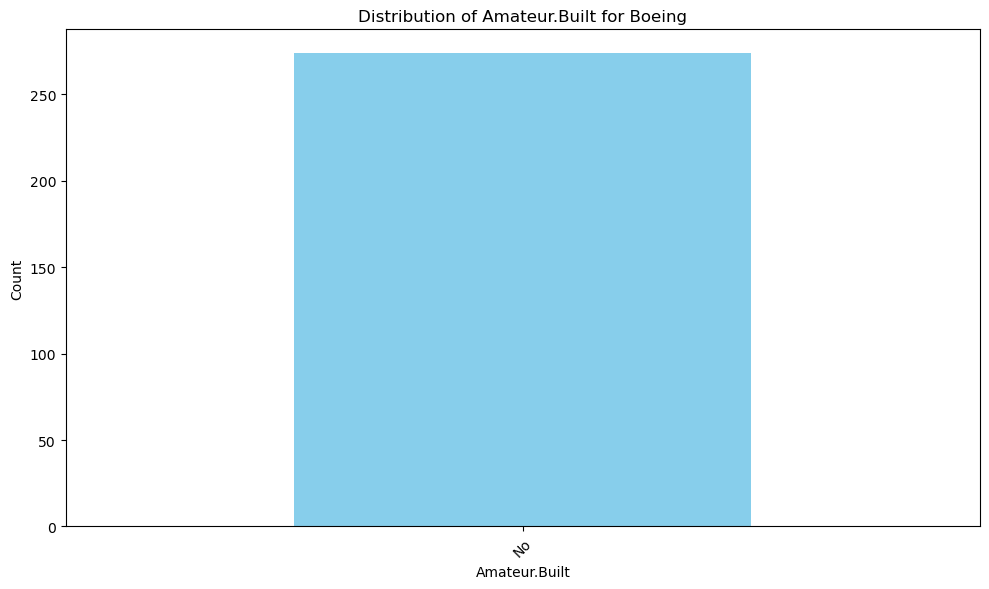

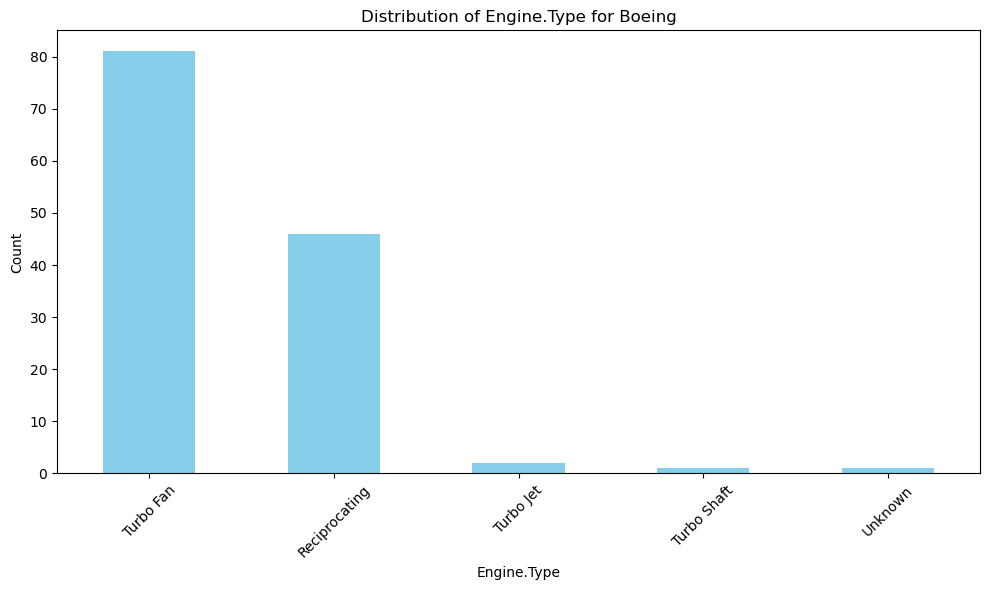

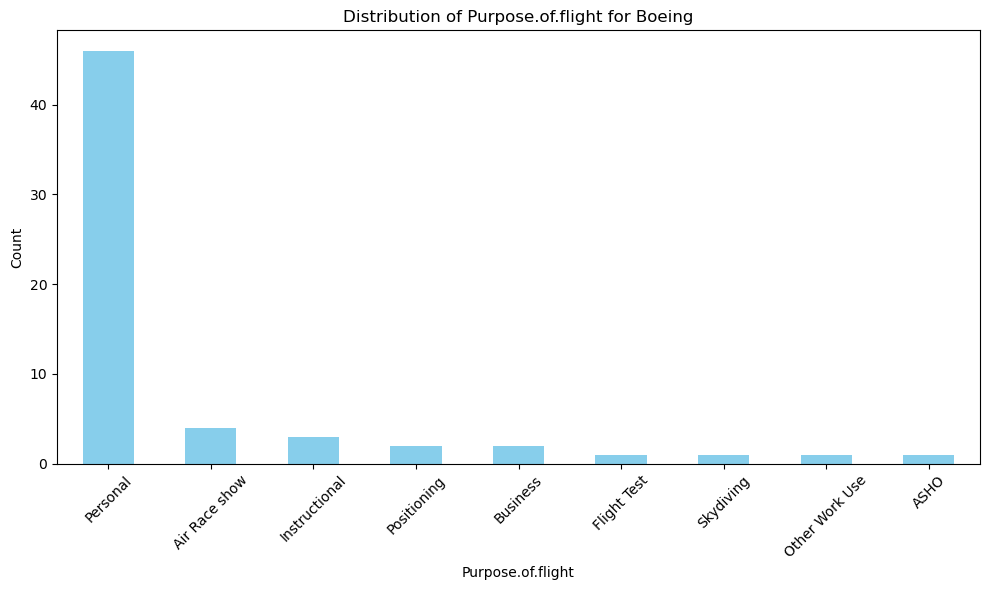

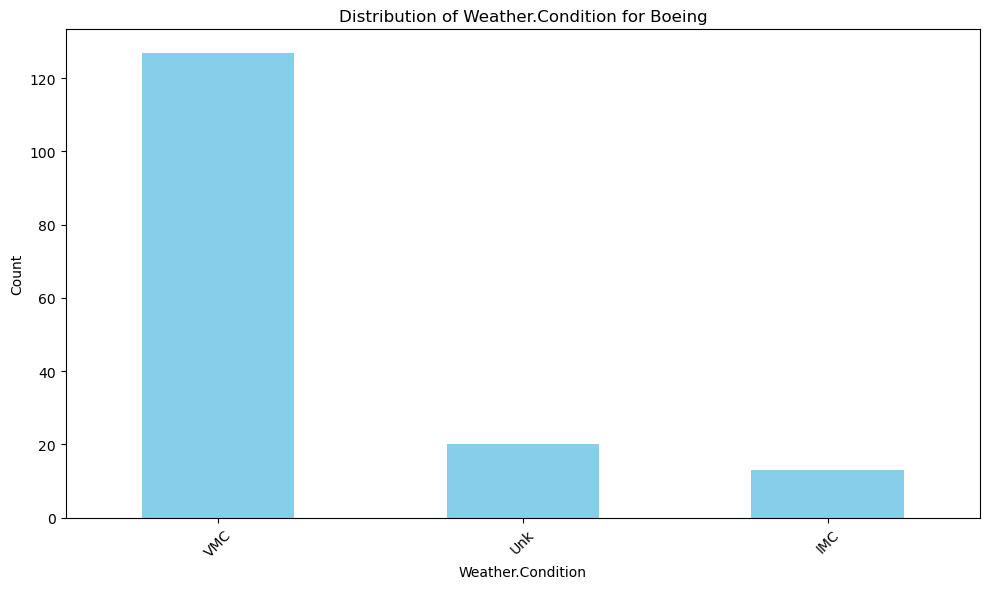

In [181]:
qualitative_columns = [
    'Aircraft.damage',
    'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
    'Weather.Condition'
]

for col in qualitative_columns:
    plt.figure(figsize=(10, 6))
    boeing_df[col].value_counts().plot(kind='bar', color='skyblue', title=f'Distribution of {col} for Boeing')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [182]:
quantitative_columns = [
    'Number.of.Engines',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Uninjured'
]

print(boeing_df[quantitative_columns].describe())

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count         274.000000            274.000000              274.000000   
mean            1.562044              5.591241                2.536496   
std             0.638924             31.273356               15.004778   
min             1.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             2.000000              0.000000                0.000000   
75%             2.000000              0.000000                0.000000   
max             4.000000            295.000000              161.000000   

       Total.Uninjured  
count       274.000000  
mean         92.948905  
std          90.194403  
min           0.000000  
25%           2.000000  
50%         102.000000  
75%         162.000000  
max         406.000000  


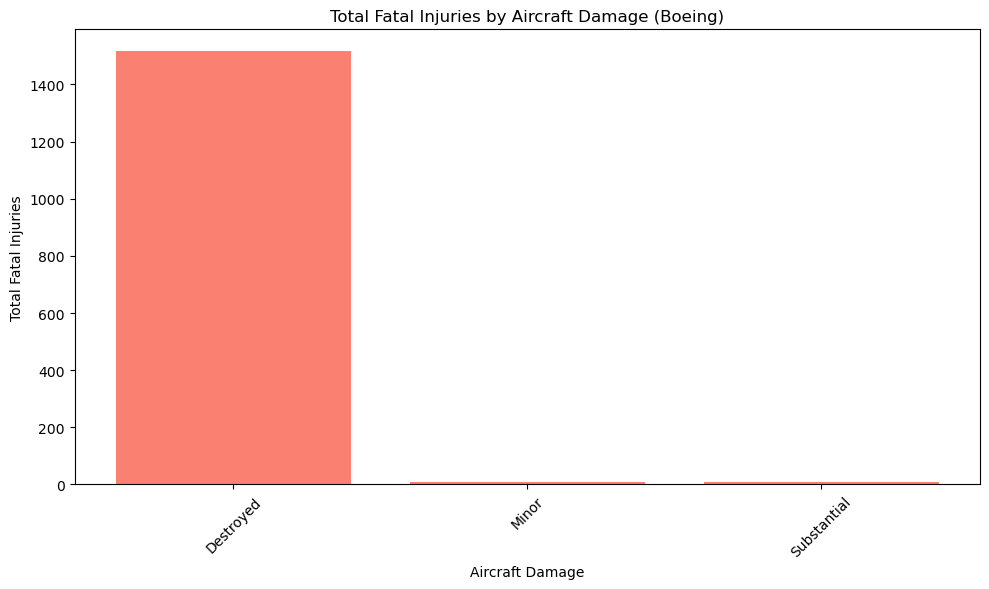

In [183]:
damage_fatalities = boeing_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(damage_fatalities['Aircraft.damage'], damage_fatalities['Total.Fatal.Injuries'], color='salmon')
plt.title('Total Fatal Injuries by Aircraft Damage (Boeing)')
plt.xlabel('Aircraft Damage')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

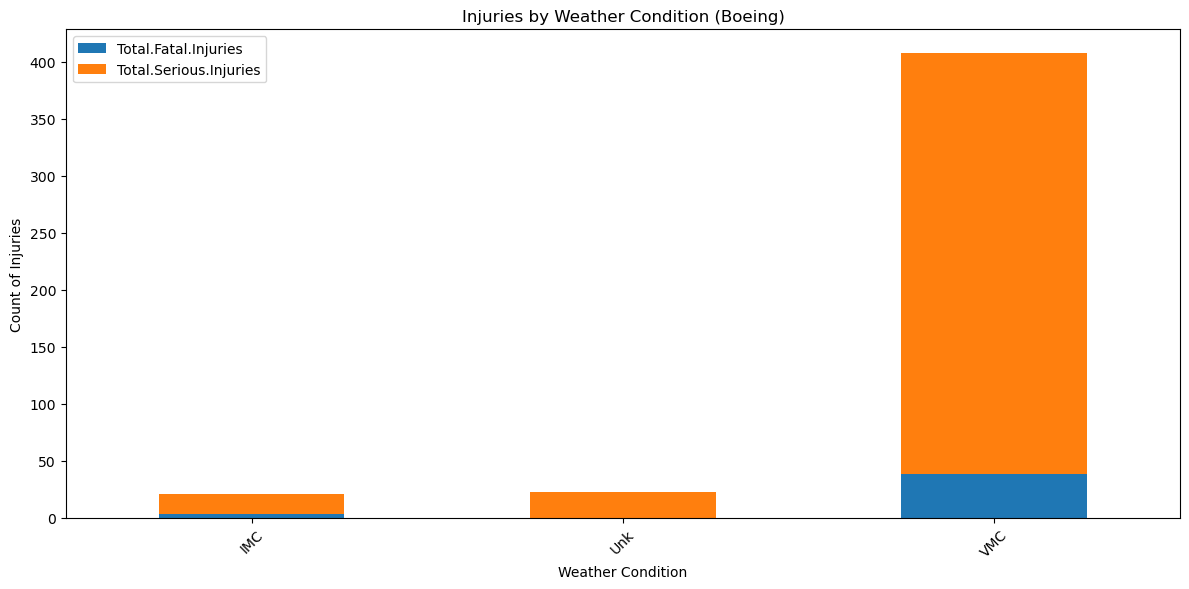

In [184]:
weather_injuries = boeing_df.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum().reset_index()

weather_injuries.set_index('Weather.Condition').plot(kind='bar', stacked=True, figsize=(12, 6), title='Injuries by Weather Condition (Boeing)')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

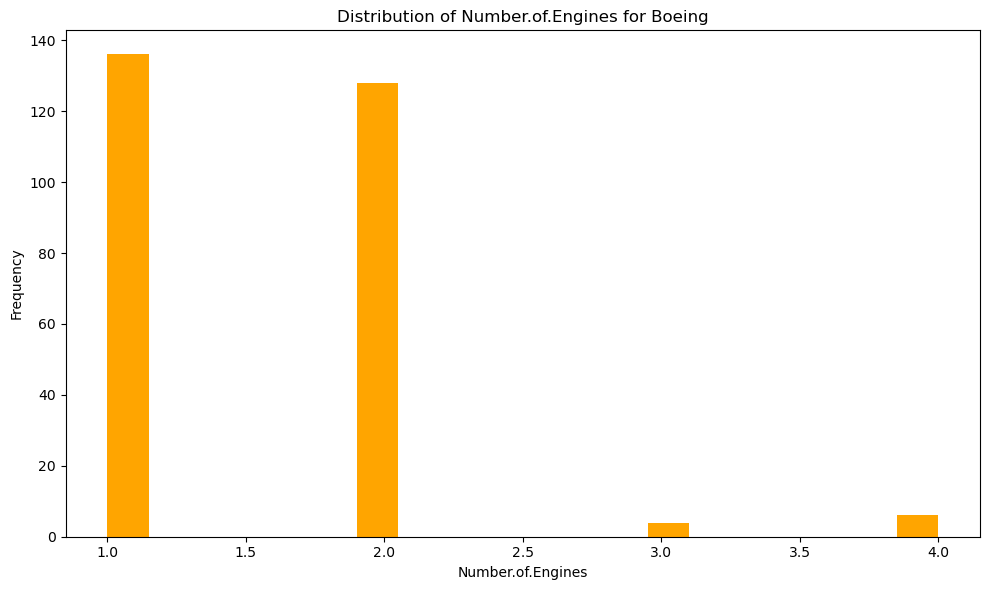

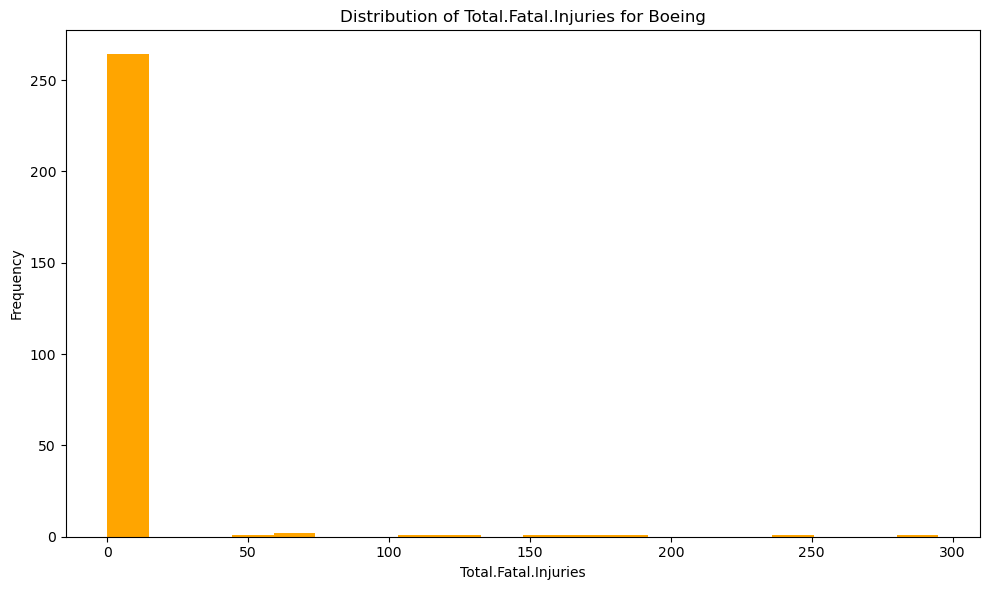

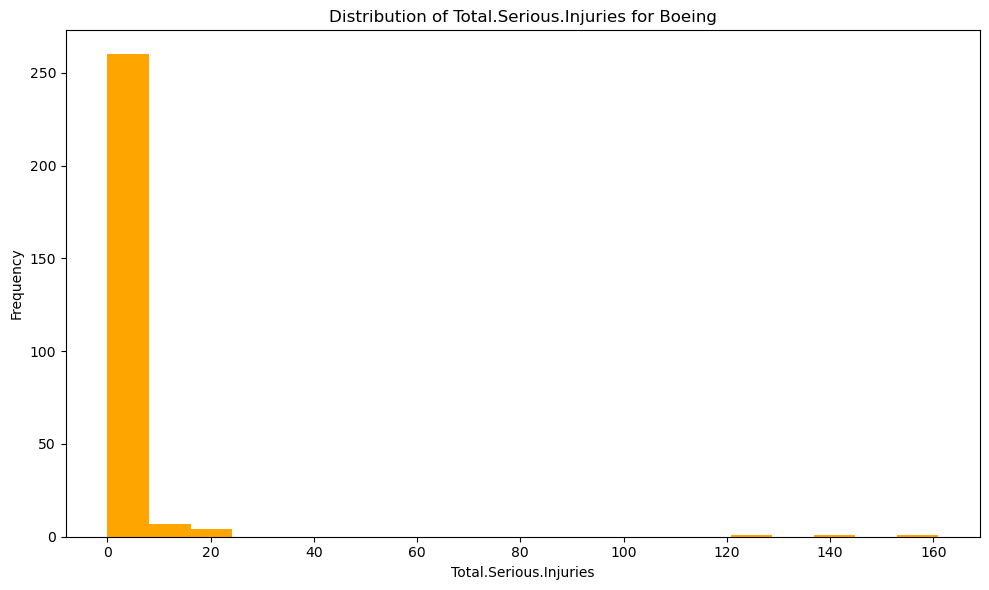

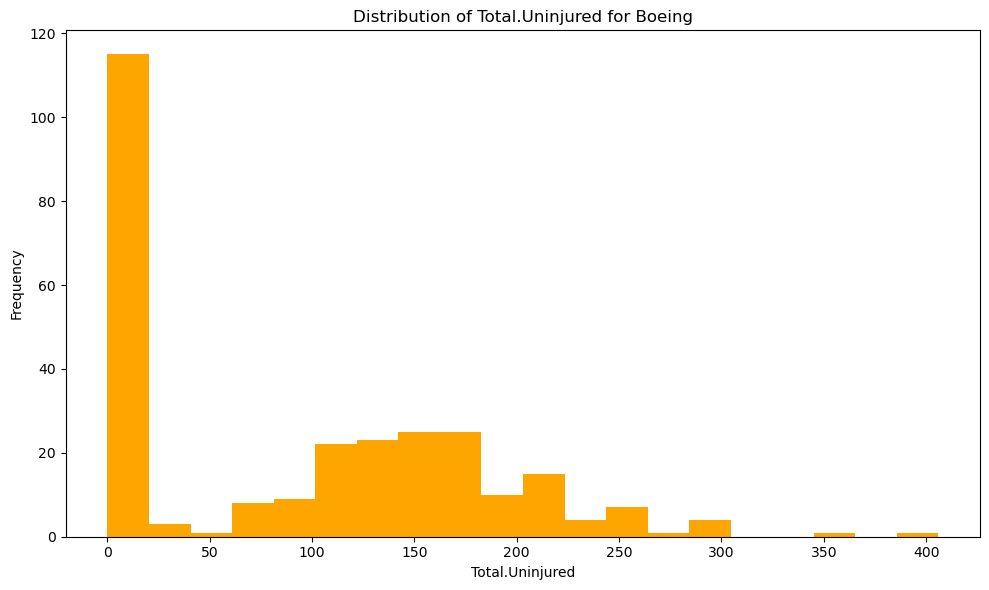

In [185]:
for col in quantitative_columns:
    plt.figure(figsize=(10, 6))
    
    boeing_data = pd.to_numeric(boeing_df[col], errors='coerce').dropna()
    
    if not boeing_data.empty:
        boeing_data.plot(kind='hist', bins=20, color='orange', title=f'Distribution of {col} for Boeing')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid numeric data for {col}")

In [186]:
boeing_means = boeing_df[quantitative_columns].mean()
boeing_sum = boeing_df[quantitative_columns].sum()
print(boeing_means)
print(boeing_sum)

Number.of.Engines          1.562044
Total.Fatal.Injuries       5.591241
Total.Serious.Injuries     2.536496
Total.Uninjured           92.948905
dtype: float64
Number.of.Engines           428.0
Total.Fatal.Injuries       1532.0
Total.Serious.Injuries      695.0
Total.Uninjured           25468.0
dtype: float64


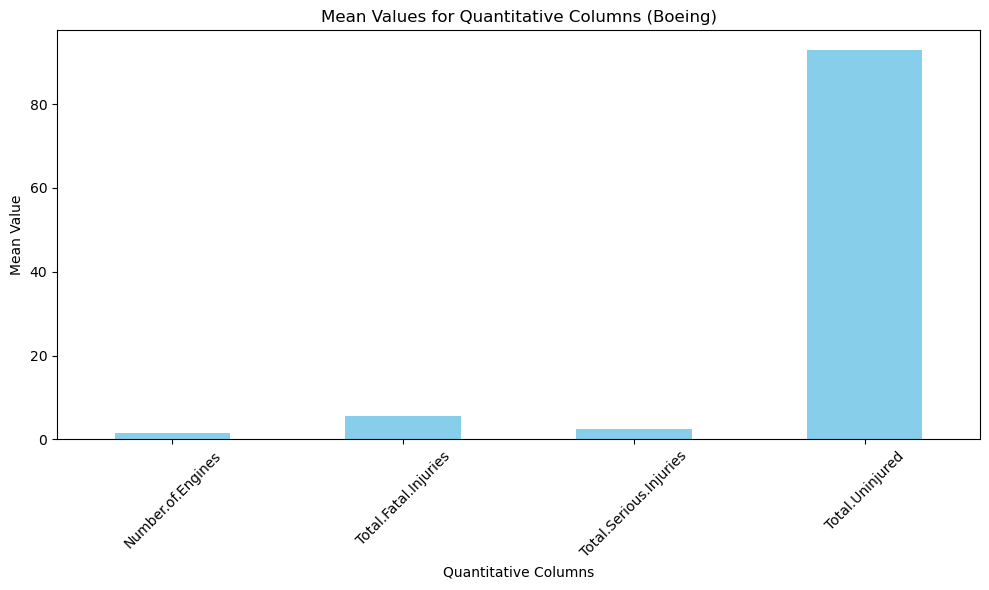

In [187]:
boeing_means.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Mean Values for Quantitative Columns (Boeing)')
plt.ylabel('Mean Value')
plt.xlabel('Quantitative Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [188]:
boeing_injuries = (
    boeing_df.groupby(['Year', 'Engine.Type', 'Number.of.Engines'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .reset_index()
)

print(boeing_injuries)

    Year    Engine.Type  Number.of.Engines  Total.Fatal.Injuries  \
0   2013  Reciprocating                1.0                   3.0   
1   2013      Turbo Fan                2.0                   3.0   
2   2013      Turbo Fan                4.0                   0.0   
3   2013      Turbo Jet                2.0                   0.0   
4   2013      Turbo Jet                4.0                   7.0   
5   2013    Turbo Shaft                2.0                   7.0   
6   2014  Reciprocating                1.0                   1.0   
7   2014  Reciprocating                2.0                   1.0   
8   2014      Turbo Fan                1.0                   0.0   
9   2014      Turbo Fan                2.0                   0.0   
10  2014        Unknown                2.0                   0.0   
11  2015  Reciprocating                1.0                   0.0   
12  2015      Turbo Fan                1.0                   0.0   
13  2015      Turbo Fan                2.0      

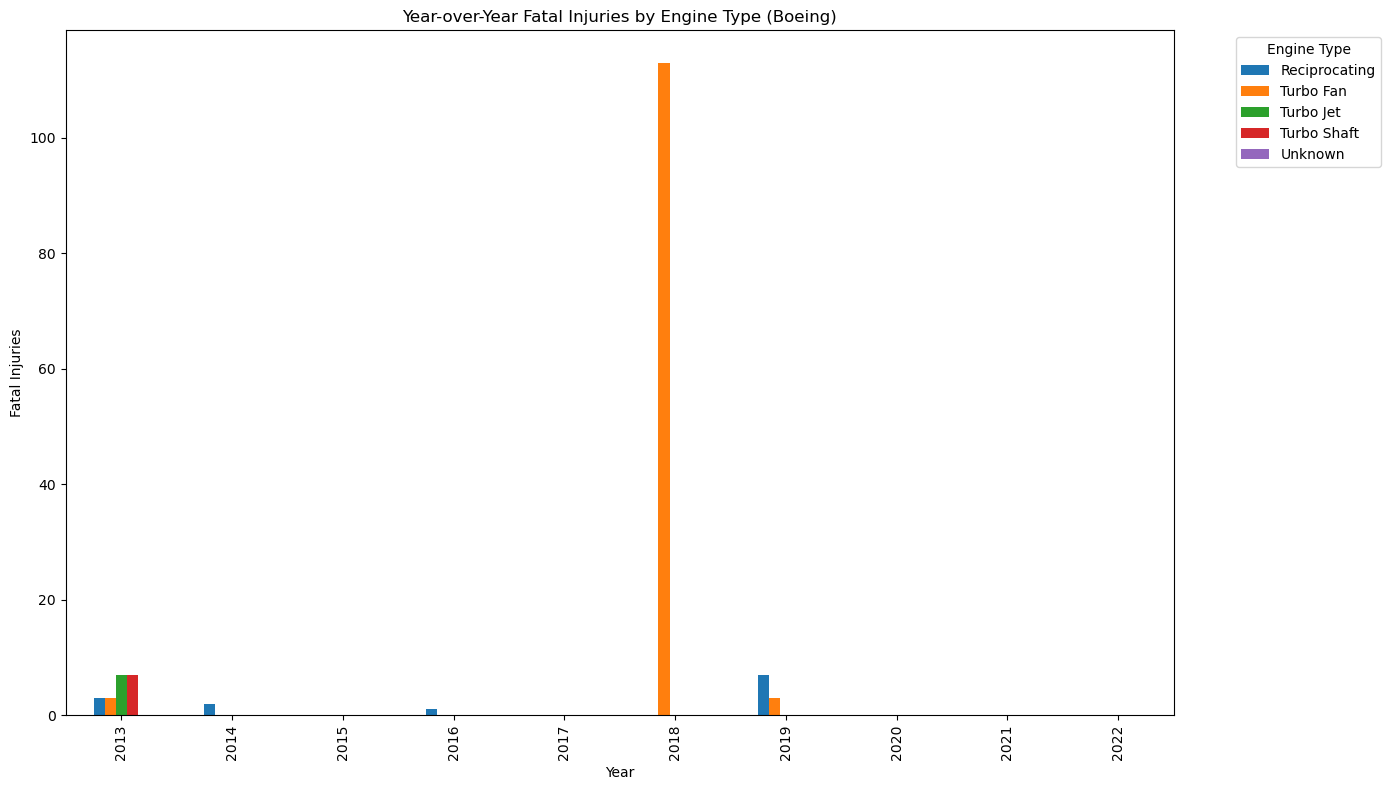

In [189]:
fatal_injuries_by_engine = boeing_injuries.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Engine Type (Boeing)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [190]:
df.to_csv("jan_22_project_df.csv", index=False)

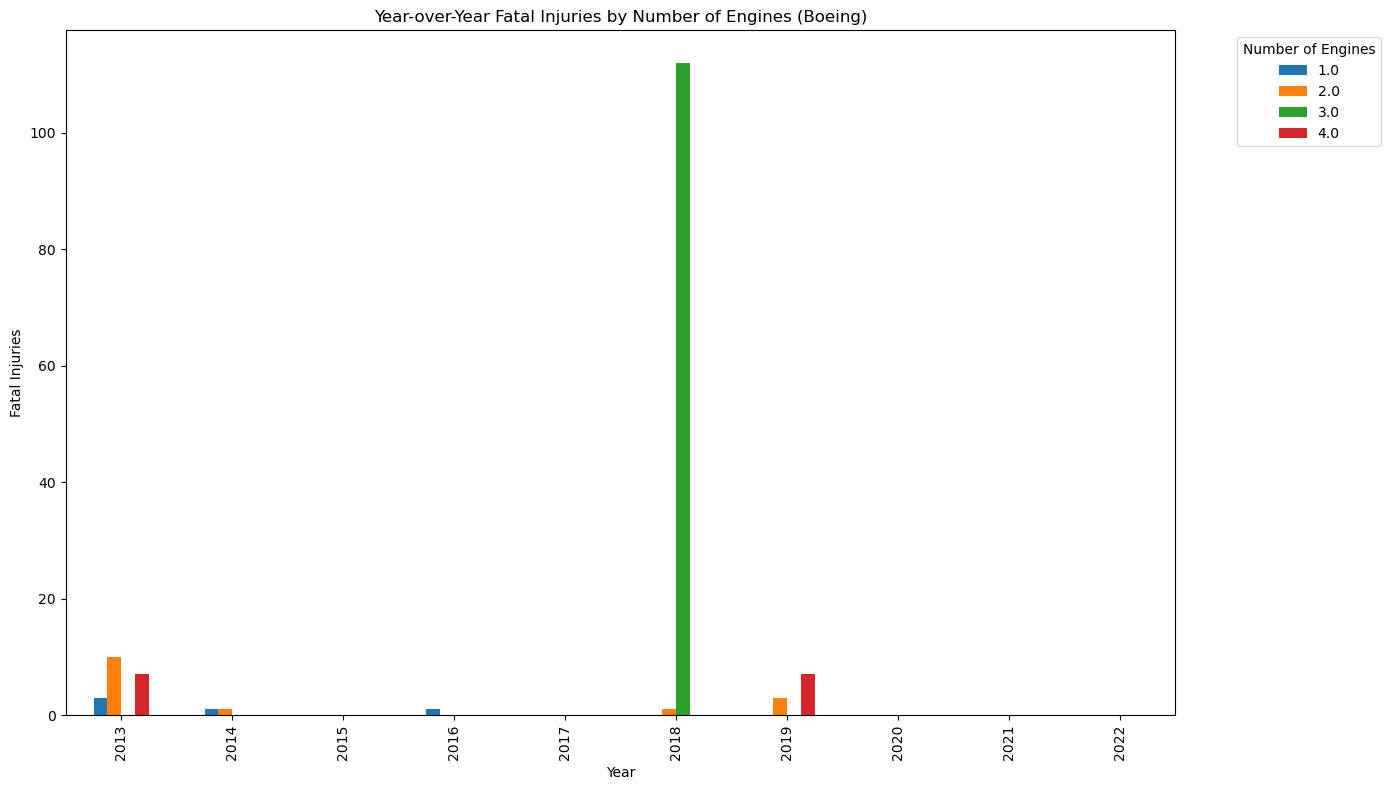

In [191]:
fatal_injuries_by_num_engines = boeing_injuries.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Number.of.Engines',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_num_engines.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Number of Engines (Boeing)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Number of Engines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

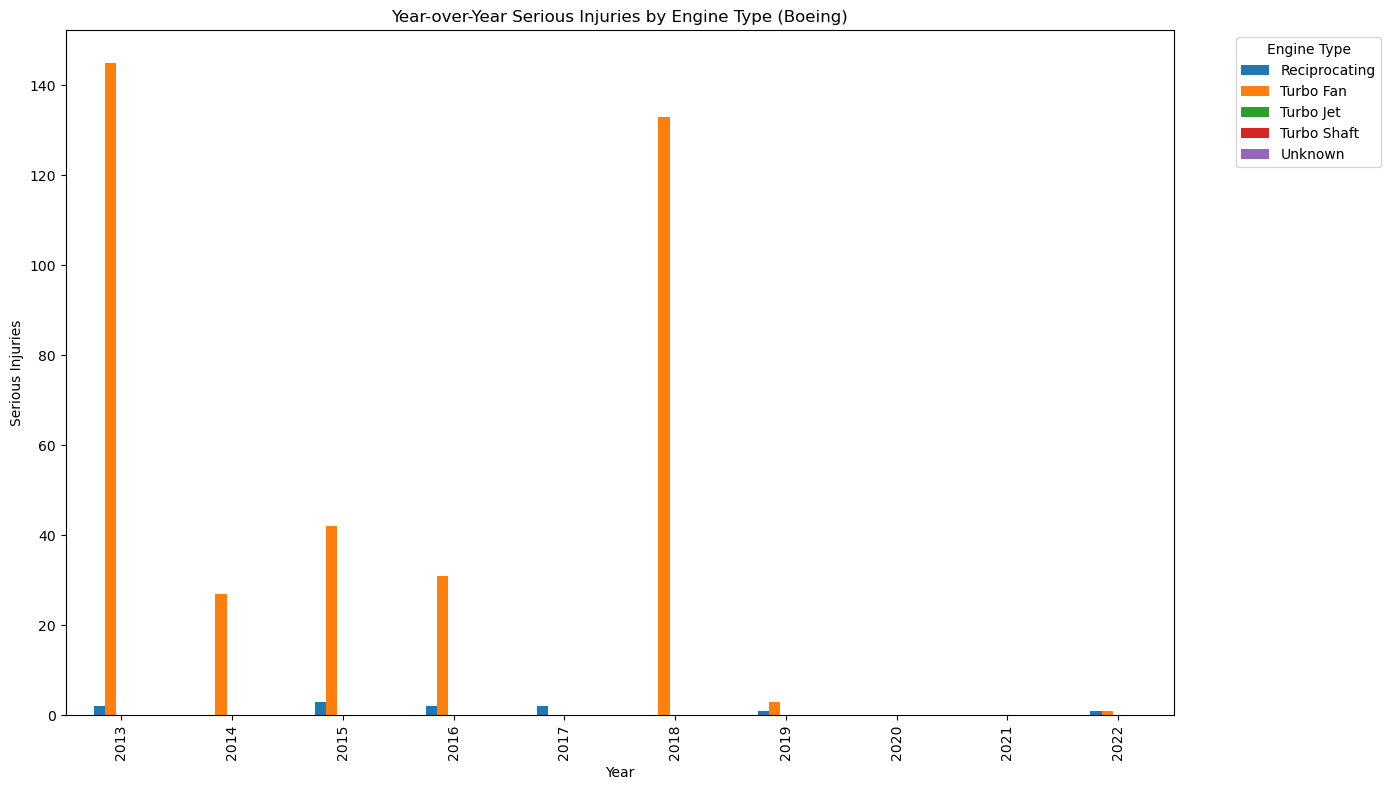

In [192]:
serious_injuries_by_engine = boeing_injuries.pivot_table(
    values='Total.Serious.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

serious_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Serious Injuries by Engine Type (Boeing)')
plt.xlabel('Year')
plt.ylabel('Serious Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

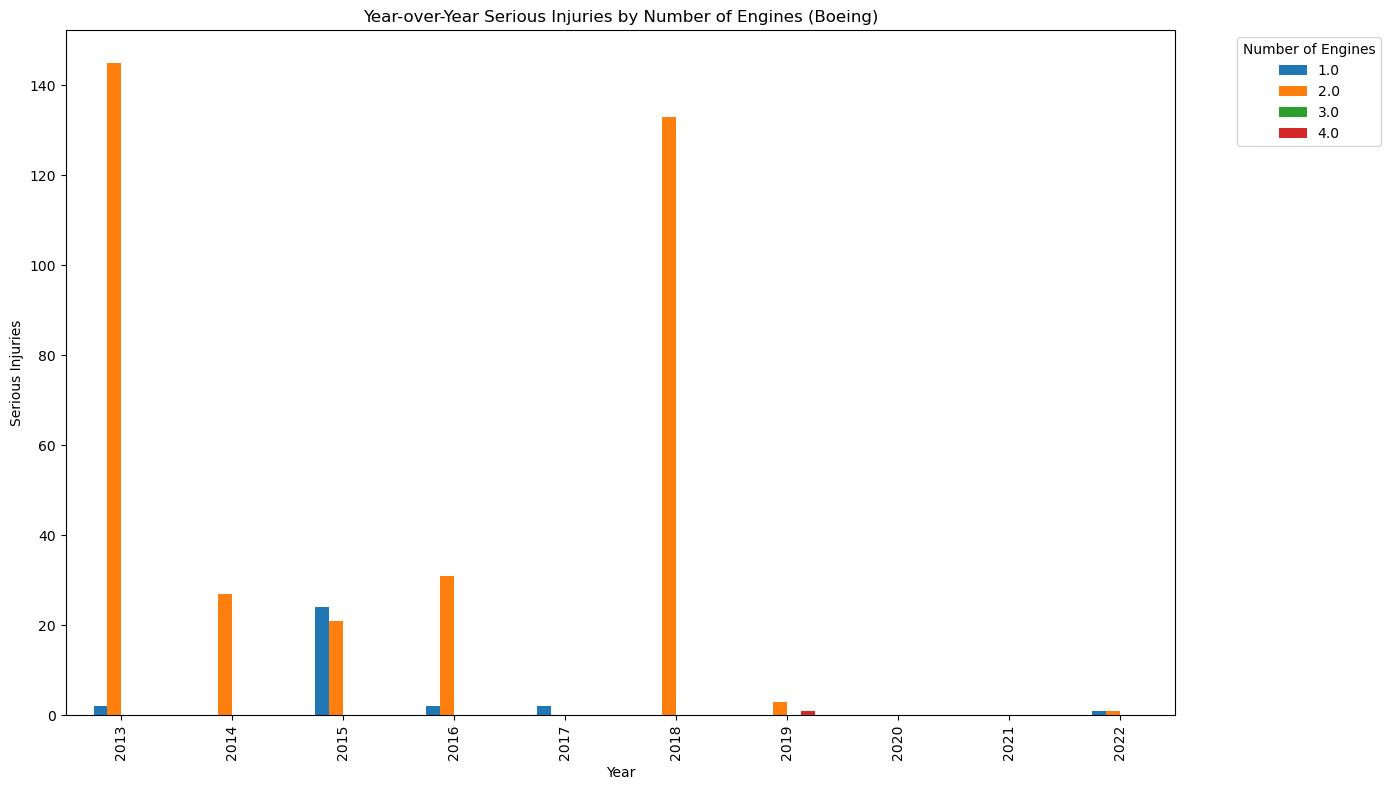

In [193]:
serious_injuries_by_num_engines = boeing_injuries.pivot_table(
    values='Total.Serious.Injuries',
    index='Year',
    columns='Number.of.Engines',
    aggfunc='sum',
    fill_value=0
)

serious_injuries_by_num_engines.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Serious Injuries by Number of Engines (Boeing)')
plt.xlabel('Year')
plt.ylabel('Serious Injuries')
plt.legend(title='Number of Engines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [194]:
airbus_df = filtered_df[filtered_df['Make'] == 'AIRBUS']
print(airbus_df)

      Investigation.Type Event.Date         Location        Country  \
70247           Accident 2013-01-17        Miami, FL  United States   
70498           Accident 2013-04-05    Las Vegas, NV  United States   
70594           Accident 2013-05-01       Newark, NJ  United States   
70638           Accident 2013-05-09       Dallas, TX  United States   
71142           Accident 2013-08-14   Birmingham, AL  United States   
...                  ...        ...              ...            ...   
84259           Accident 2022-09-04     New York, NY  United States   
84460           Accident 2022-10-23    Mactan-Cebu,     Philippines   
84488           Accident 2022-11-02  New Orleans, LA  United States   
84534           Accident 2022-11-19        Omaha, NE  United States   
84588           Accident 2022-12-12      Redding, CA  United States   

      Injury.Severity Aircraft.damage Aircraft.Category    Make  \
70247       Non-Fatal           Minor          Airplane  AIRBUS   
70498       N

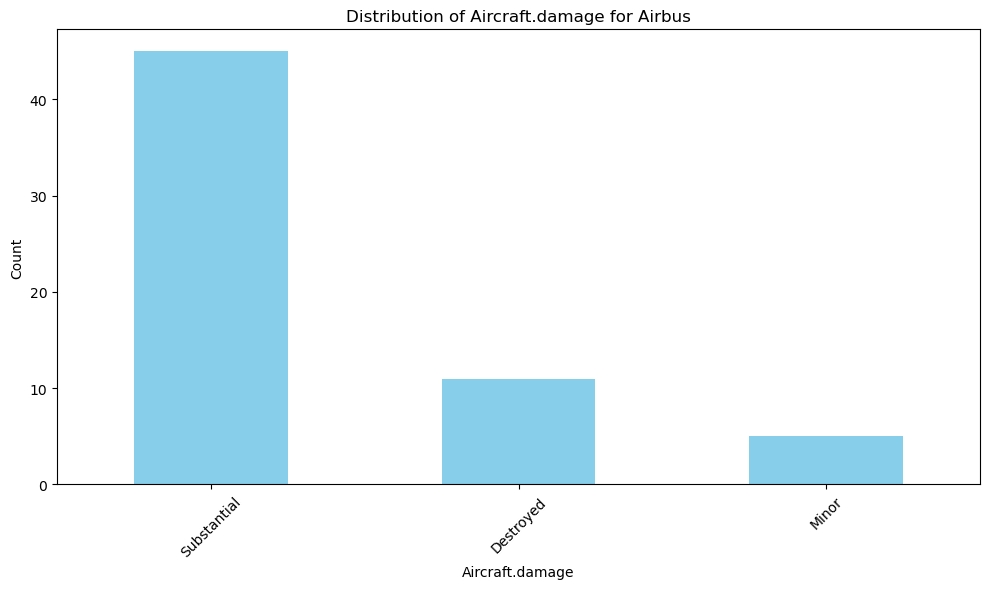

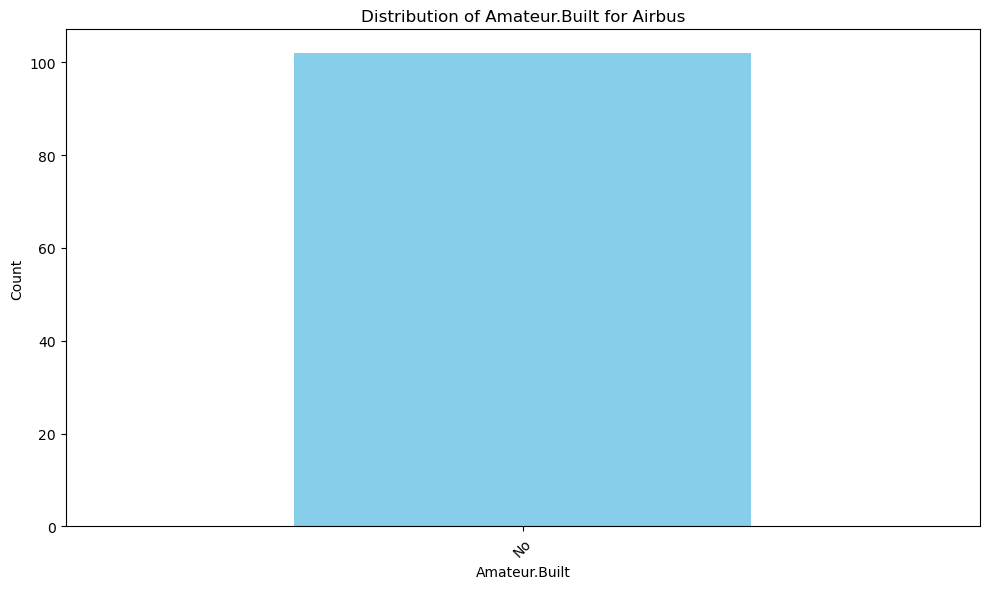

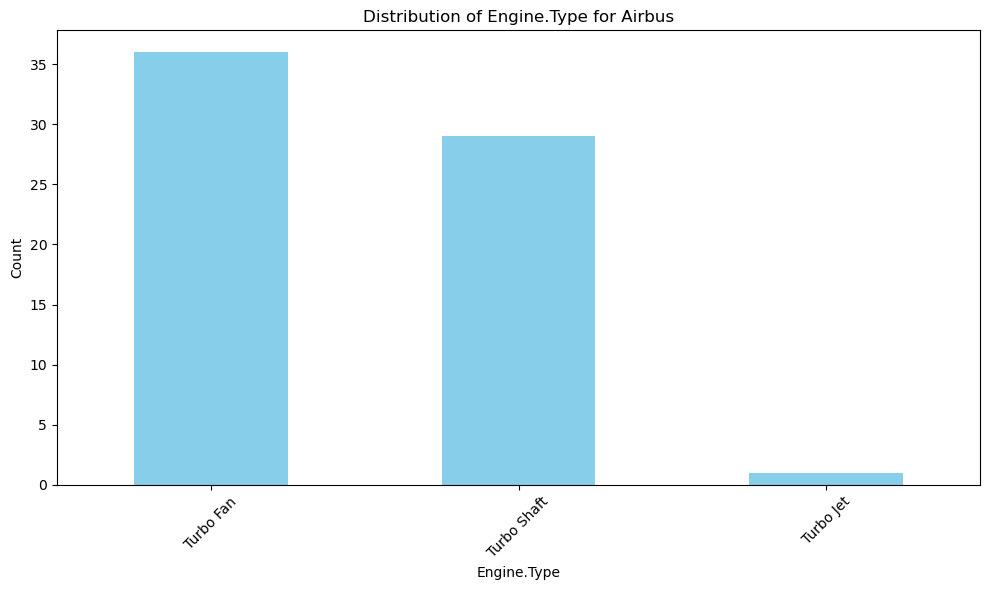

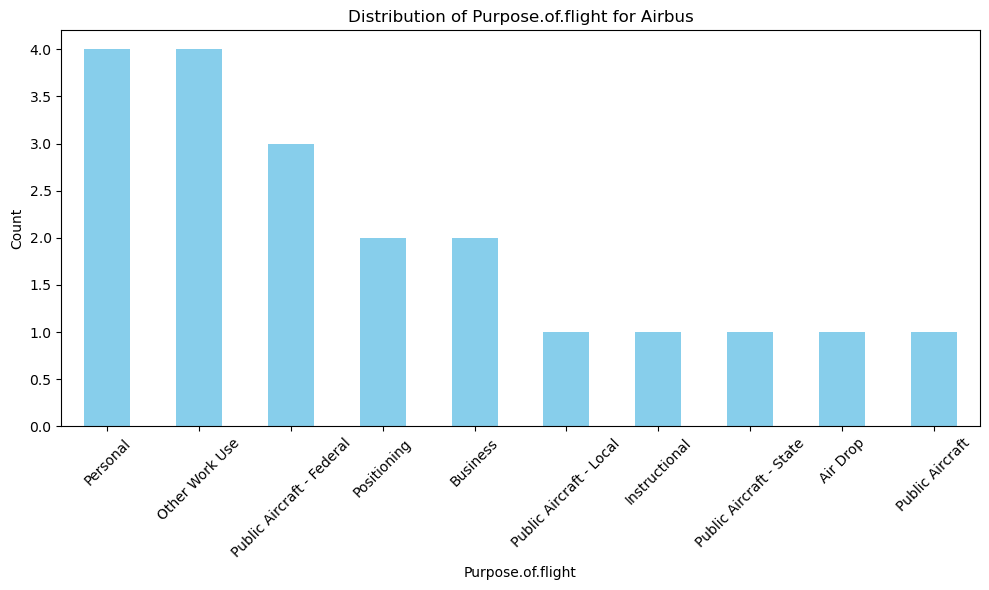

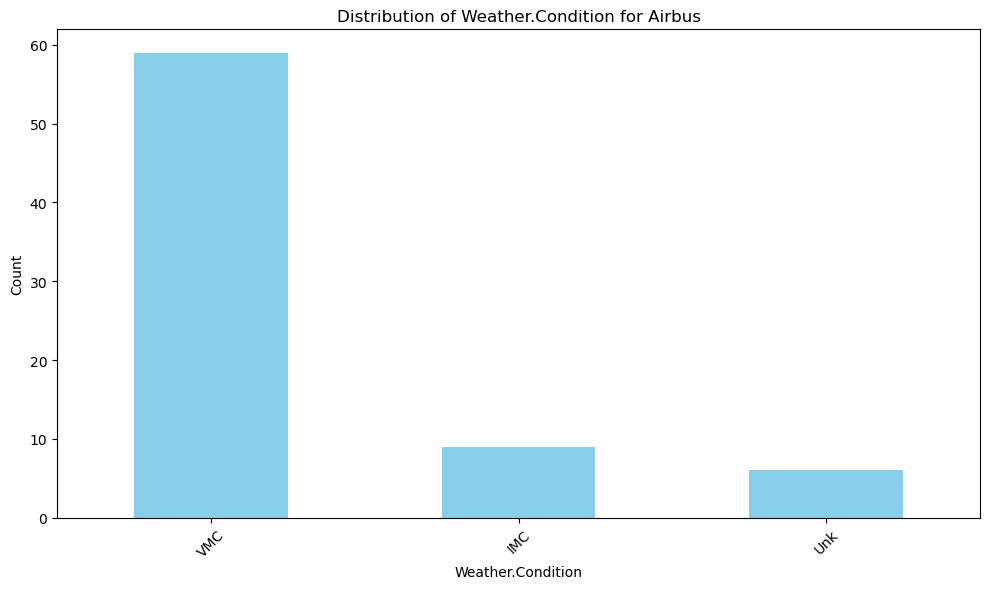

In [195]:
qualitative_columns = [
    'Aircraft.damage',
    'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
    'Weather.Condition'
]

for col in qualitative_columns:
    plt.figure(figsize=(10, 6))
    airbus_df[col].value_counts().plot(kind='bar', color='skyblue', title=f'Distribution of {col} for Airbus')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [196]:
quantitative_columns = [
    'Number.of.Engines',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Uninjured'
]

print(airbus_df[quantitative_columns].describe())

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count         102.000000            102.000000              102.000000   
mean            1.549020              7.176471                0.941176   
std             0.556286             32.634008                3.429123   
min             1.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             2.000000              0.000000                0.000000   
75%             2.000000              0.000000                0.000000   
max             4.000000            224.000000               28.000000   

       Total.Uninjured  
count       102.000000  
mean         92.441176  
std         107.060136  
min           0.000000  
25%           0.250000  
50%          84.000000  
75%         154.000000  
max         521.000000  


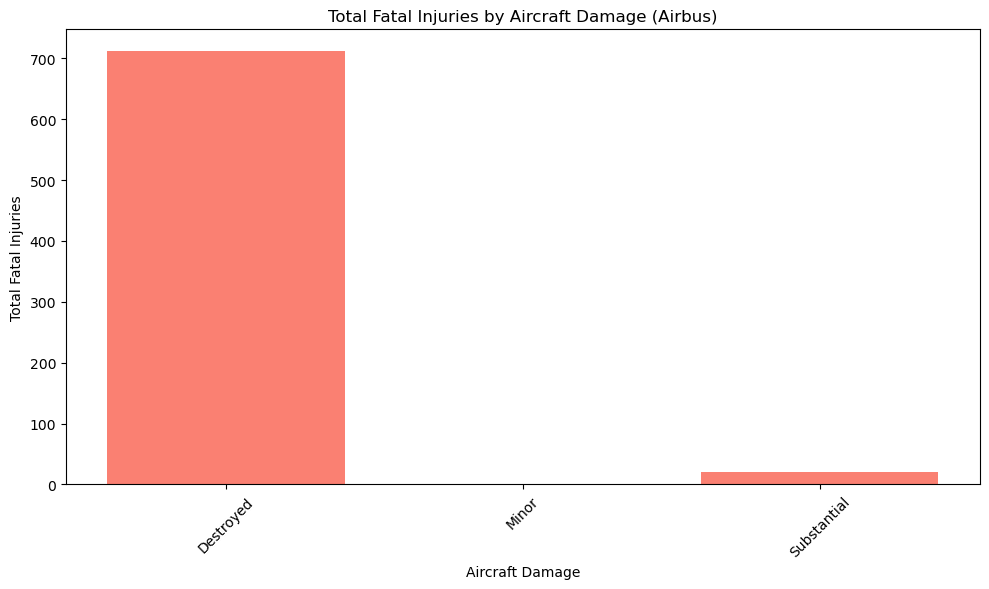

In [197]:
damage_fatalities = airbus_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(damage_fatalities['Aircraft.damage'], damage_fatalities['Total.Fatal.Injuries'], color='salmon')
plt.title('Total Fatal Injuries by Aircraft Damage (Airbus)')
plt.xlabel('Aircraft Damage')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

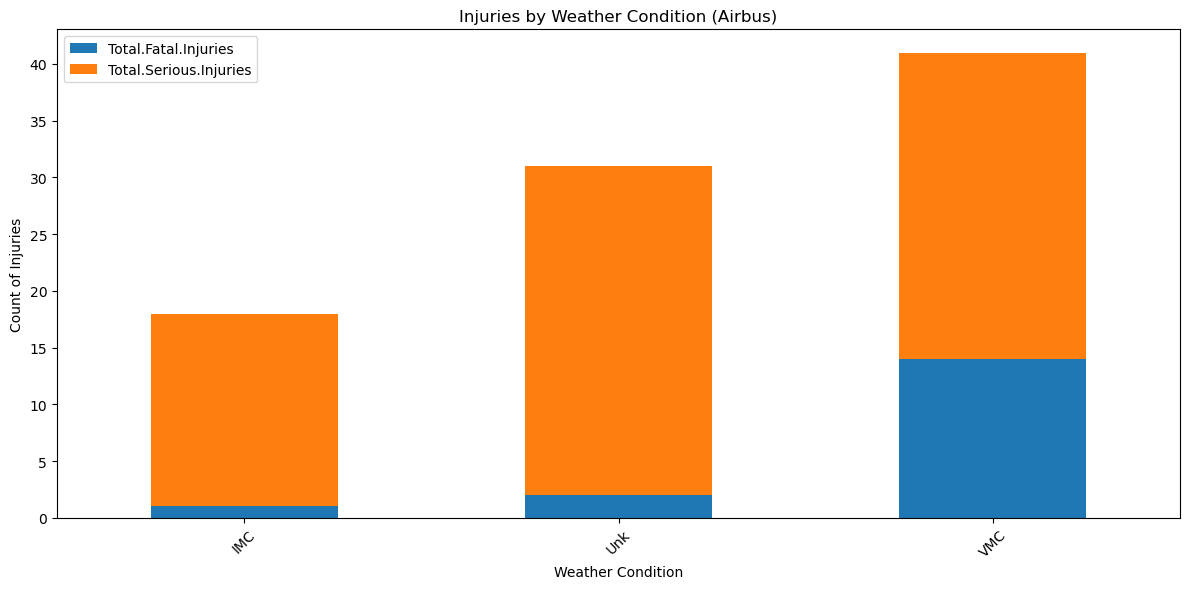

In [198]:
weather_injuries = airbus_df.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum().reset_index()

weather_injuries.set_index('Weather.Condition').plot(kind='bar', stacked=True, figsize=(12, 6), title='Injuries by Weather Condition (Airbus)')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

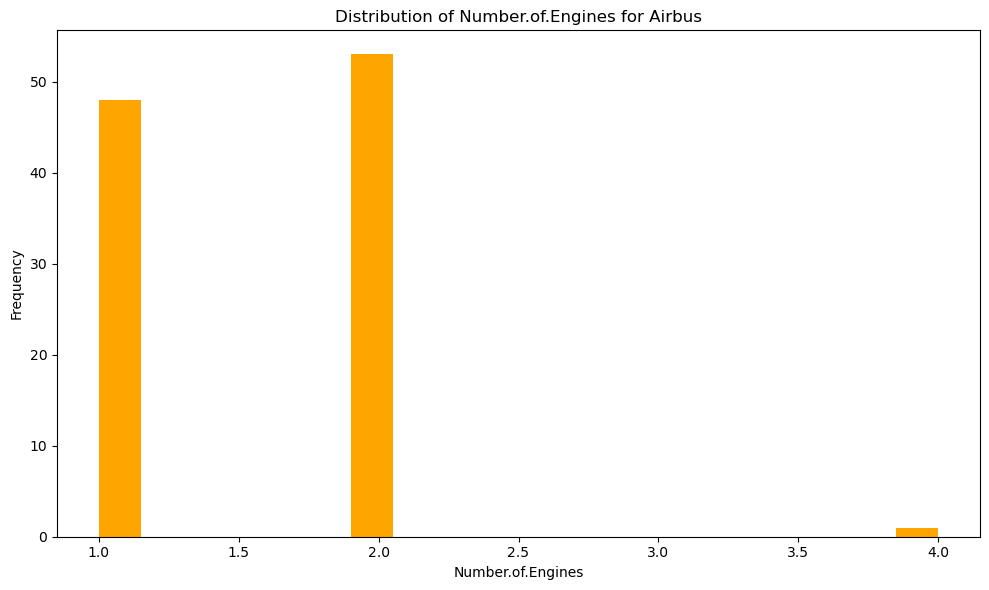

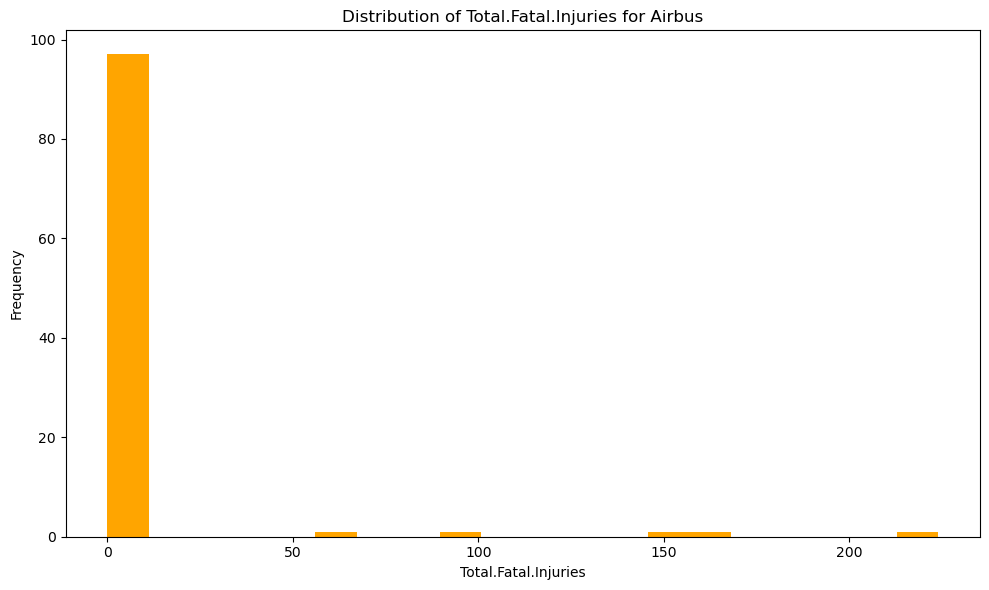

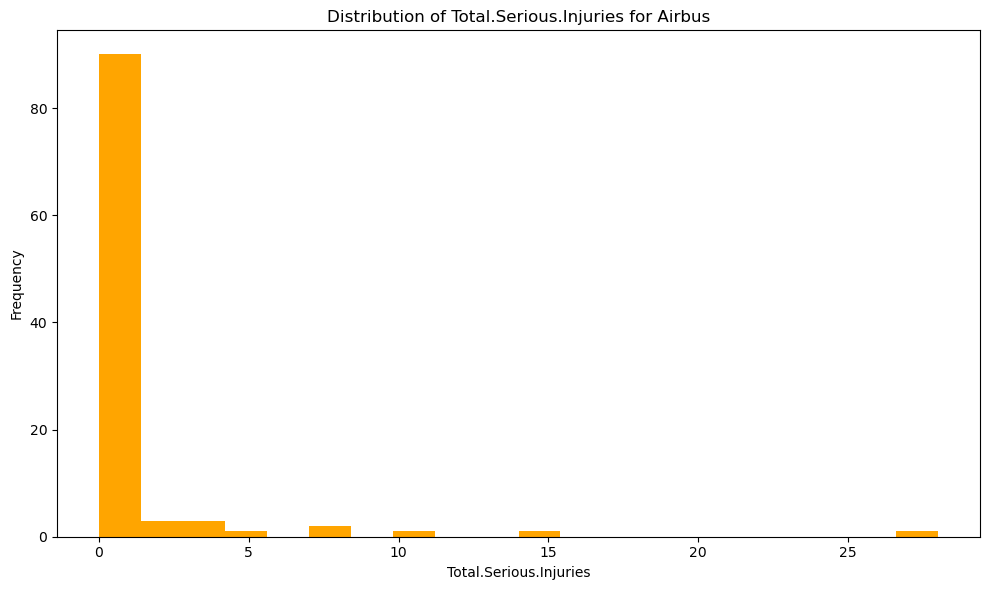

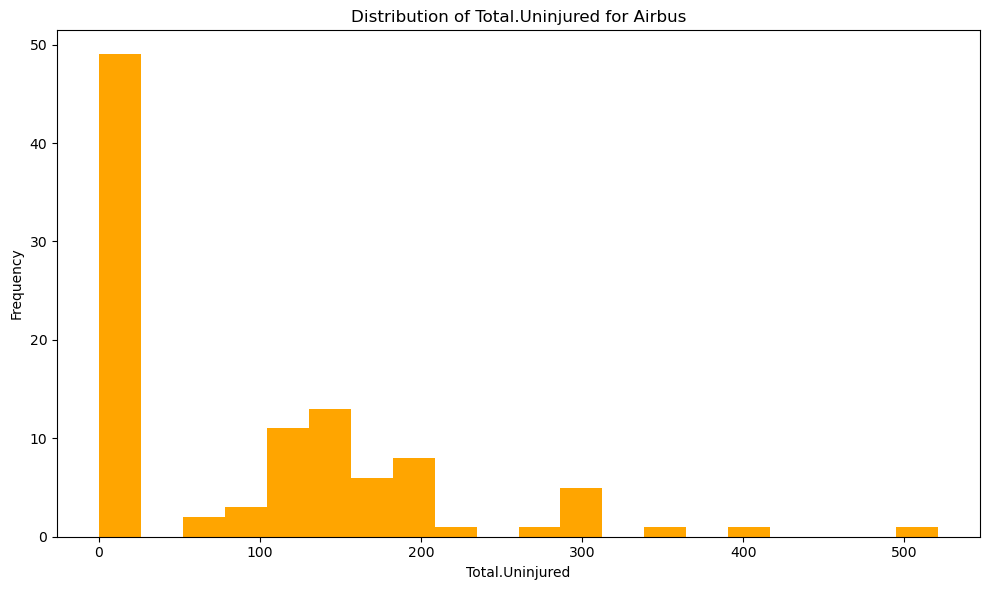

In [199]:
for col in quantitative_columns:
    plt.figure(figsize=(10, 6))
    
    airbus_data = pd.to_numeric(airbus_df[col], errors='coerce').dropna()
    
    if not airbus_data.empty:
        airbus_data.plot(kind='hist', bins=20, color='orange', title=f'Distribution of {col} for Airbus')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid numeric data for {col}")

In [200]:
airbus_means = airbus_df[quantitative_columns].mean()
airbus_sum = airbus_df[quantitative_columns].sum()
print(airbus_means)
print(airbus_sum)

Number.of.Engines          1.549020
Total.Fatal.Injuries       7.176471
Total.Serious.Injuries     0.941176
Total.Uninjured           92.441176
dtype: float64
Number.of.Engines          158.0
Total.Fatal.Injuries       732.0
Total.Serious.Injuries      96.0
Total.Uninjured           9429.0
dtype: float64


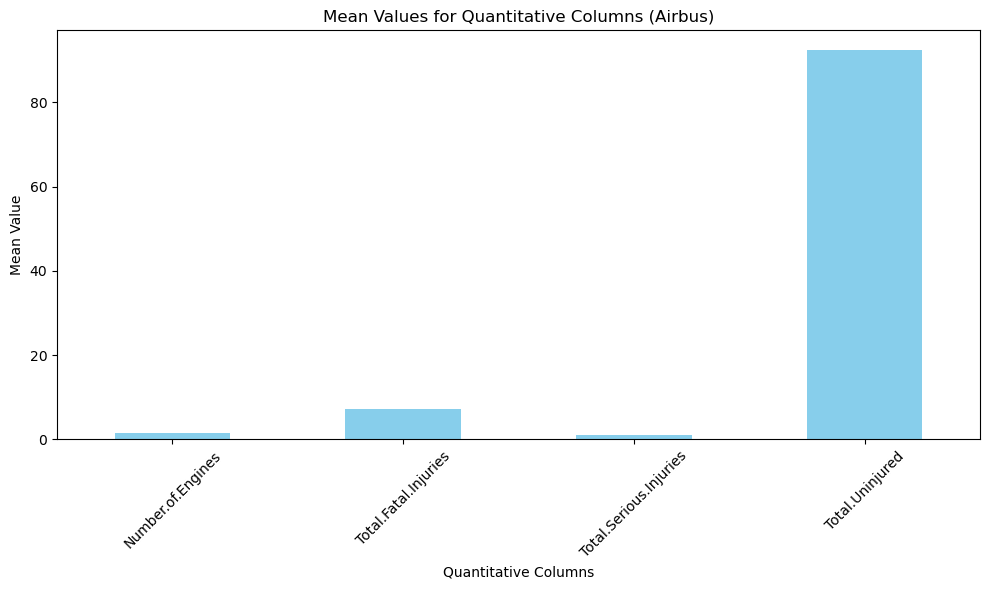

In [201]:
airbus_means.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Mean Values for Quantitative Columns (Airbus)')
plt.ylabel('Mean Value')
plt.xlabel('Quantitative Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [202]:
airbus_injuries = (
    airbus_df.groupby(['Year', 'Engine.Type', 'Number.of.Engines'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .reset_index()
)

print(airbus_injuries)

    Year  Engine.Type  Number.of.Engines  Total.Fatal.Injuries  \
0   2013    Turbo Fan                2.0                   2.0   
1   2013    Turbo Fan                4.0                   0.0   
2   2014    Turbo Fan                2.0                   0.0   
3   2014  Turbo Shaft                1.0                   0.0   
4   2015    Turbo Fan                2.0                   0.0   
5   2015  Turbo Shaft                1.0                   4.0   
6   2015  Turbo Shaft                2.0                   2.0   
7   2016    Turbo Fan                2.0                  66.0   
8   2016  Turbo Shaft                1.0                   1.0   
9   2017    Turbo Fan                2.0                   0.0   
10  2017  Turbo Shaft                1.0                   0.0   
11  2017  Turbo Shaft                2.0                   0.0   
12  2018    Turbo Fan                2.0                   0.0   
13  2018    Turbo Jet                1.0                   0.0   
14  2018  

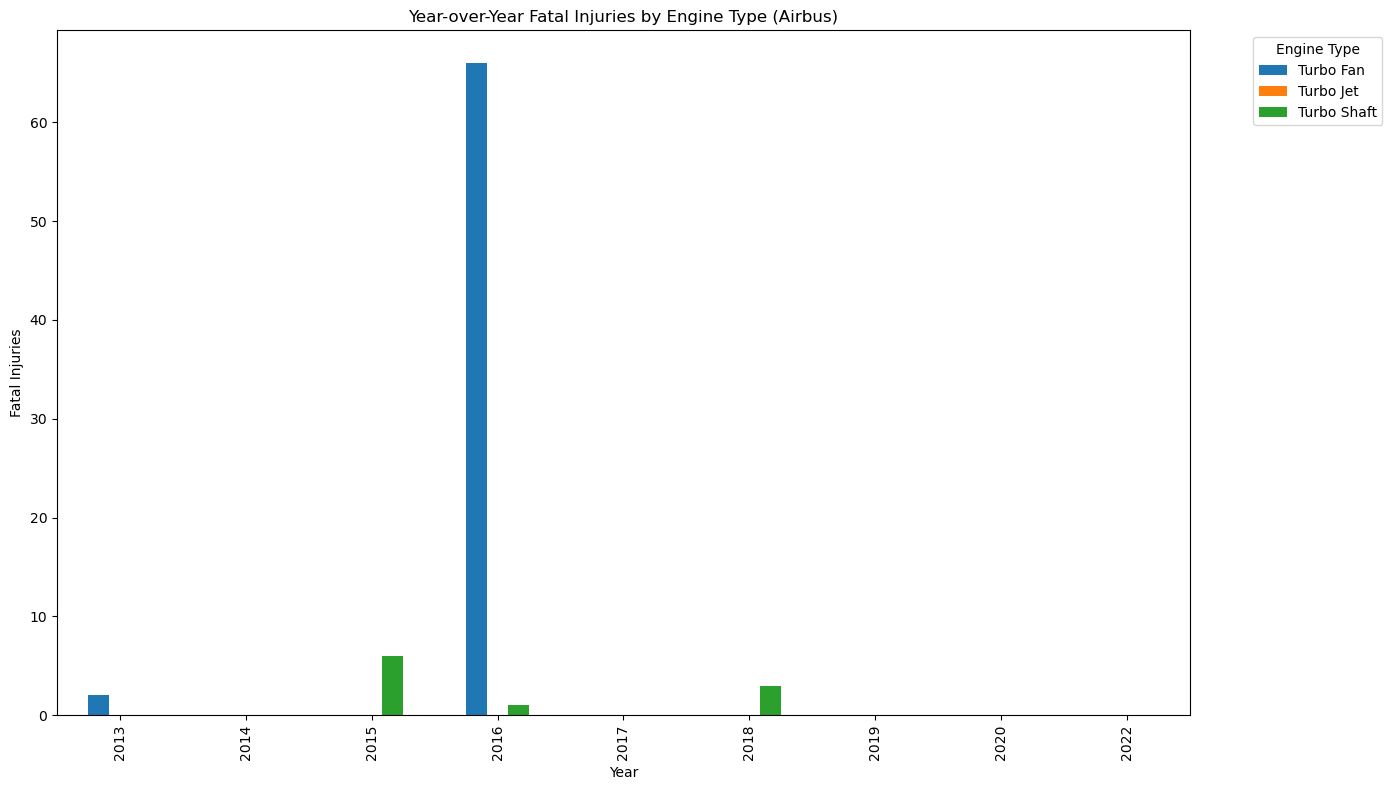

In [203]:
fatal_injuries_by_engine = airbus_injuries.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Engine Type (Airbus)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

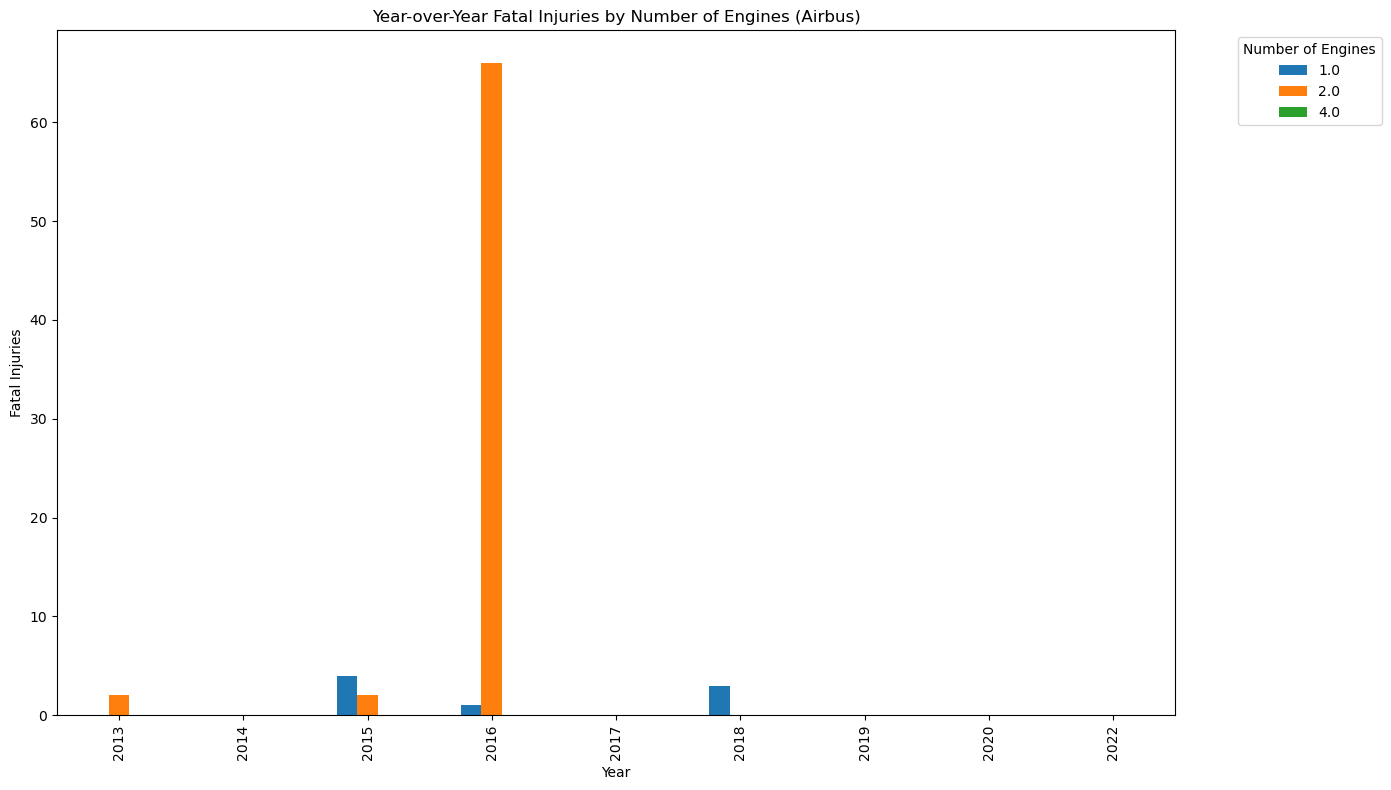

In [204]:
fatal_injuries_by_num_engines = airbus_injuries.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Number.of.Engines',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_num_engines.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Number of Engines (Airbus)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Number of Engines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

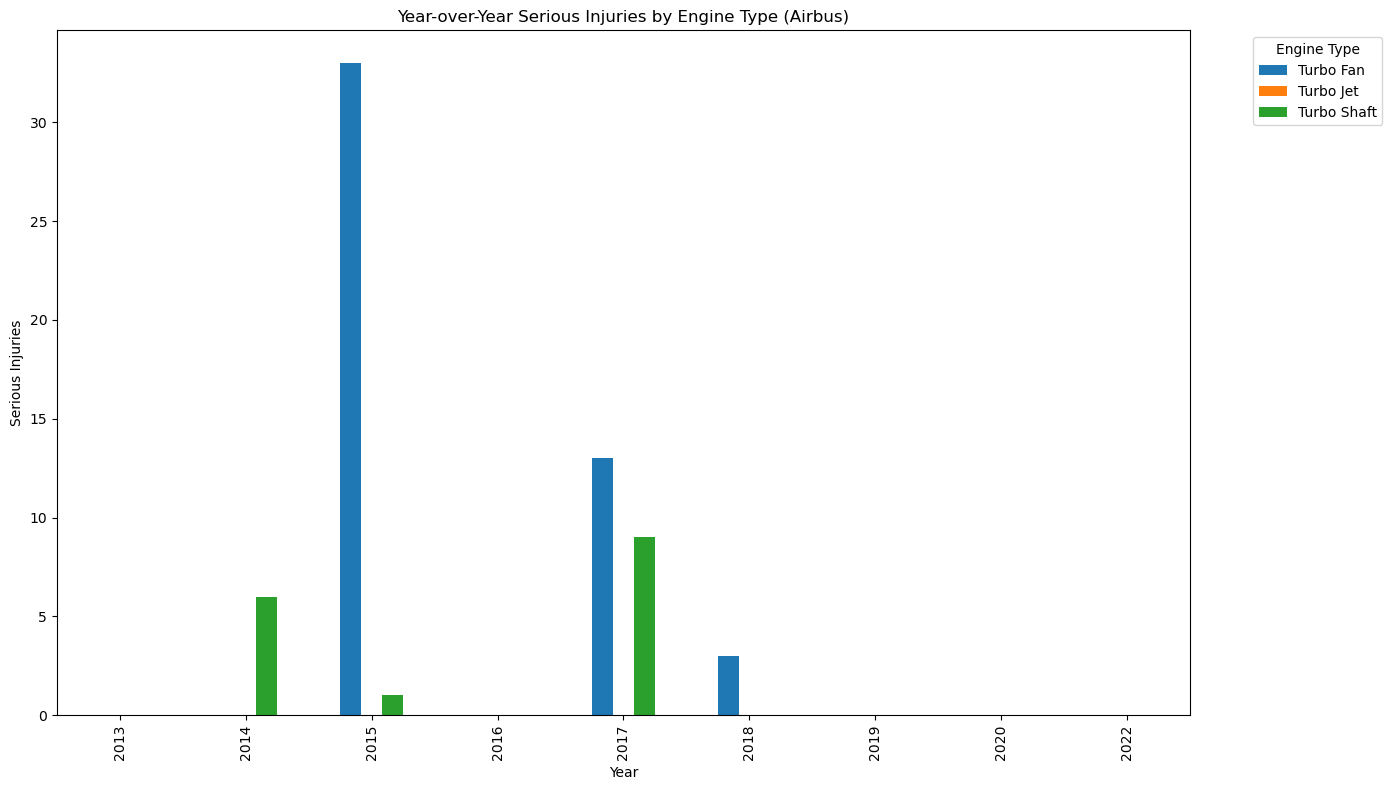

In [205]:
serious_injuries_by_engine = airbus_injuries.pivot_table(
    values='Total.Serious.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

serious_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Serious Injuries by Engine Type (Airbus)')
plt.xlabel('Year')
plt.ylabel('Serious Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

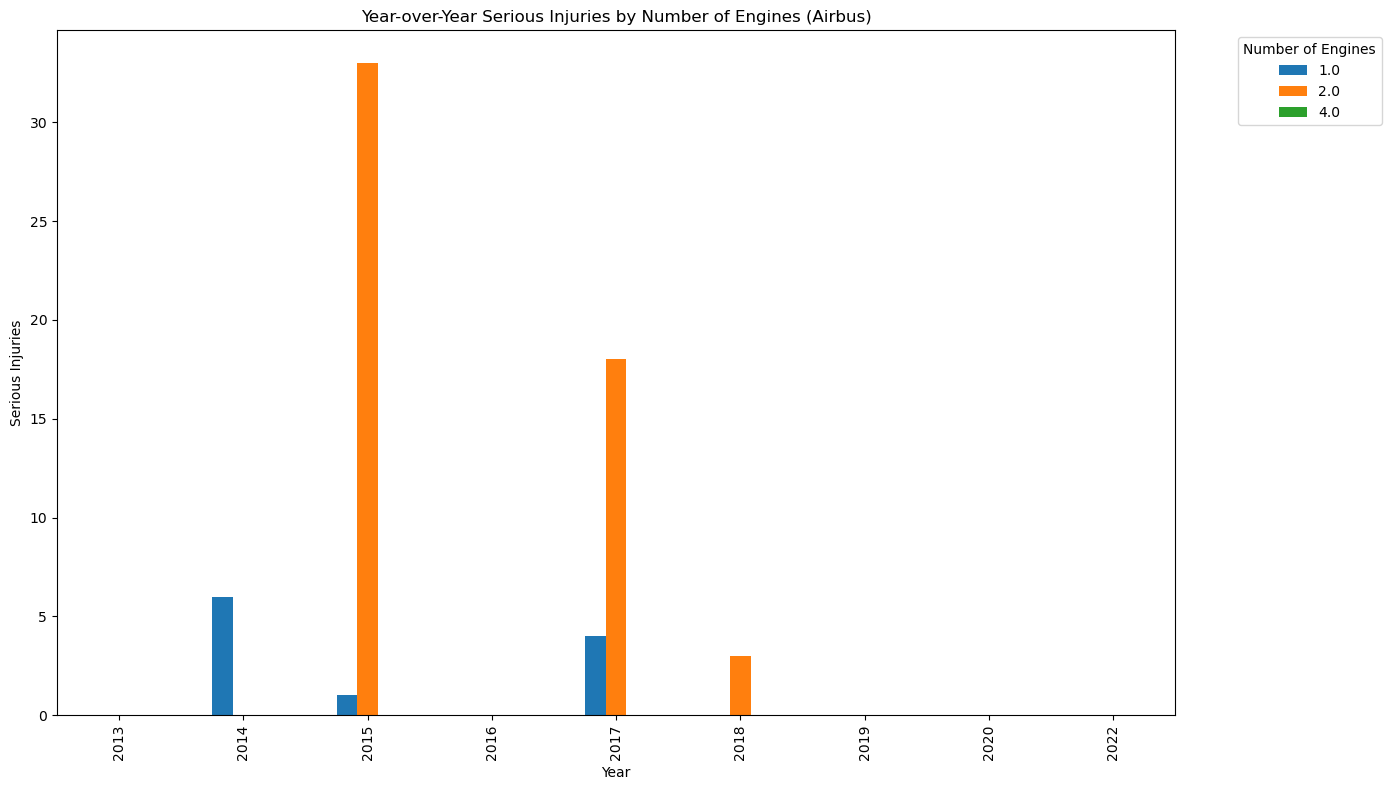

In [206]:
serious_injuries_by_num_engines = airbus_injuries.pivot_table(
    values='Total.Serious.Injuries',
    index='Year',
    columns='Number.of.Engines',
    aggfunc='sum',
    fill_value=0
)

serious_injuries_by_num_engines.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Serious Injuries by Number of Engines (Airbus)')
plt.xlabel('Year')
plt.ylabel('Serious Injuries')
plt.legend(title='Number of Engines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [207]:
total_inj = df.loc[:, ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
print(total_inj)

Total.Fatal.Injuries      50123.0
Total.Serious.Injuries    21055.0
Total.Minor.Injuries      21055.0
dtype: float64


In [208]:
yearly_injuries_df = df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

print(yearly_injuries_df)


      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries
Year                                                                    
1948                   2.0                     0.0                   0.0
1962                   4.0                     0.0                   0.0
1974                   3.0                     0.0                   0.0
1977                   2.0                     0.0                   0.0
1979                   1.0                     2.0                   2.0
1981                   4.0                     0.0                   0.0
1982                1584.0                   726.0                 726.0
1983                1273.0                   673.0                 673.0
1984                1226.0                   696.0                 696.0
1985                1646.0                   611.0                 611.0
1986                1180.0                   619.0                 619.0
1987                1235.0                   554.0 

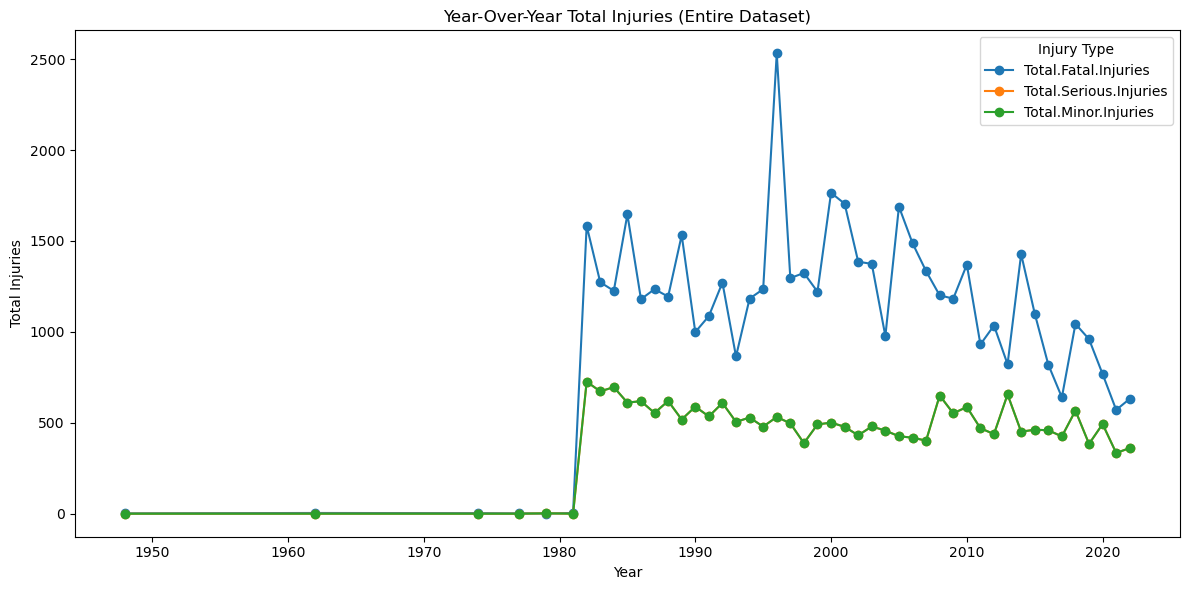

In [209]:
yearly_injuries_df.plot(figsize=(12, 6), marker='o', title='Year-Over-Year Total Injuries (Entire Dataset)')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

In [210]:
print(yearly_injuries_df['Total.Serious.Injuries'])

Year
1948      0.0
1962      0.0
1974      0.0
1977      0.0
1979      2.0
1981      0.0
1982    726.0
1983    673.0
1984    696.0
1985    611.0
1986    619.0
1987    554.0
1988    620.0
1989    518.0
1990    589.0
1991    535.0
1992    609.0
1993    505.0
1994    529.0
1995    479.0
1996    532.0
1997    497.0
1998    388.0
1999    491.0
2000    501.0
2001    478.0
2002    431.0
2003    480.0
2004    457.0
2005    426.0
2006    418.0
2007    402.0
2008    650.0
2009    552.0
2010    587.0
2011    470.0
2012    438.0
2013    656.0
2014    451.0
2015    462.0
2016    459.0
2017    425.0
2018    567.0
2019    384.0
2020    493.0
2021    334.0
2022    361.0
Name: Total.Serious.Injuries, dtype: float64


In [211]:
yearly_injuries_df.fillna(0, inplace=True)

In [212]:
yearly_injuries_df.mean()

Total.Fatal.Injuries      1066.446809
Total.Serious.Injuries     447.978723
Total.Minor.Injuries       447.978723
dtype: float64

In [213]:
yearly_injuries_df.median()

Total.Fatal.Injuries      1183.0
Total.Serious.Injuries     480.0
Total.Minor.Injuries       480.0
dtype: float64

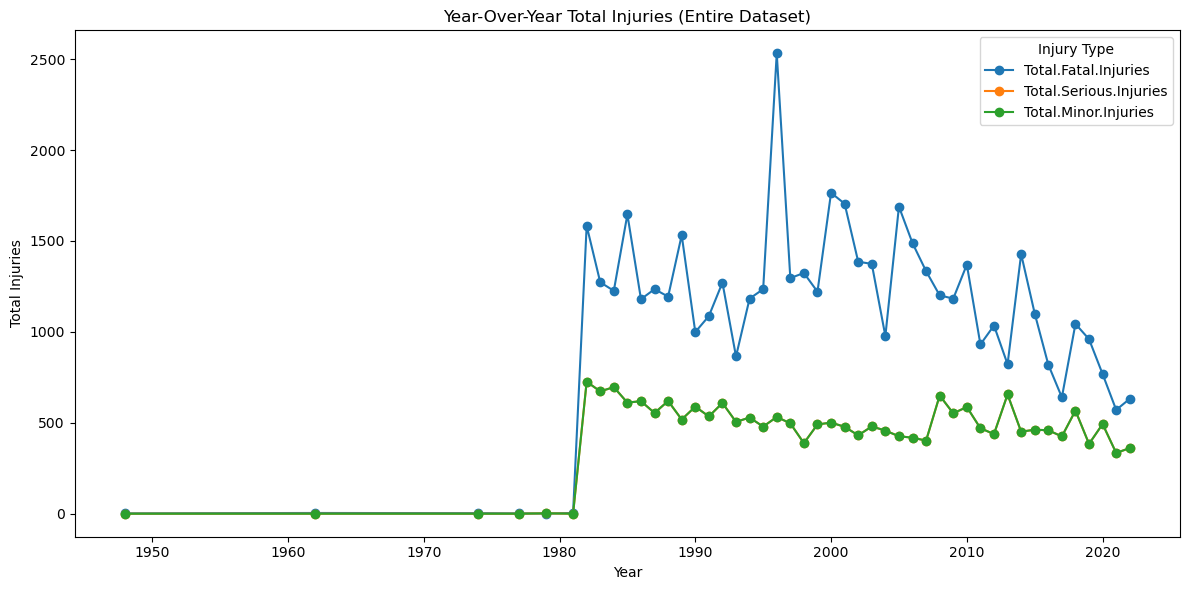

In [214]:
yearly_injuries_df.plot(figsize=(12, 6), marker='o', title='Year-Over-Year Total Injuries (Entire Dataset)')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

In [215]:
df_1980 = df[df['Year'] >= 1982]

In [216]:
yearly_injuries_1980 = df_1980.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
print(yearly_injuries_1980)

      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries
Year                                                                    
1982                1584.0                   726.0                 726.0
1983                1273.0                   673.0                 673.0
1984                1226.0                   696.0                 696.0
1985                1646.0                   611.0                 611.0
1986                1180.0                   619.0                 619.0
1987                1235.0                   554.0                 554.0
1988                1194.0                   620.0                 620.0
1989                1532.0                   518.0                 518.0
1990                 999.0                   589.0                 589.0
1991                1087.0                   535.0                 535.0
1992                1271.0                   609.0                 609.0
1993                 865.0                   505.0 

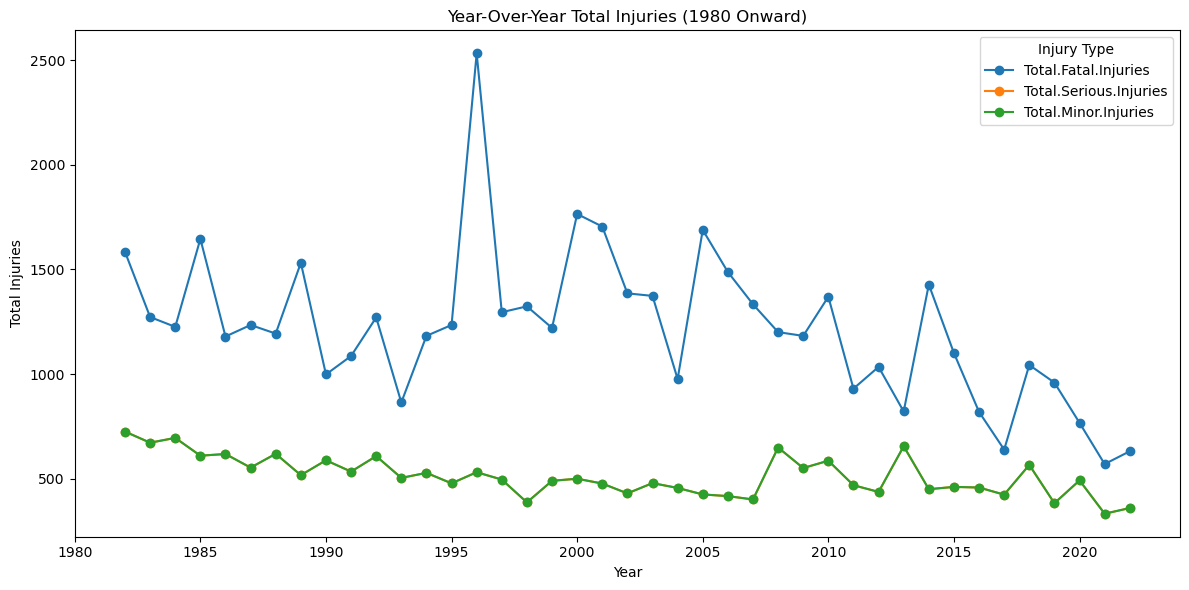

In [217]:
yearly_injuries_1980.plot(figsize=(12, 6), marker='o', title='Year-Over-Year Total Injuries (1980 Onward)')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

In [218]:
yearly_injuries_1980_mean = df_1980.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].mean()
print(yearly_injuries_1980_mean)

      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries
Year                                                                    
1982              0.455959                0.208981              0.208981
1983              0.372331                0.196841              0.196841
1984              0.368833                0.209386              0.209386
1985              0.549216                0.203871              0.203871
1986              0.422788                0.221784              0.221784
1987              0.455216                0.204202              0.204202
1988              0.460116                0.238921              0.238921
1989              0.623525                0.210826              0.210826
1990              0.407589                0.240310              0.240310
1991              0.452728                0.222824              0.222824
1992              0.555022                0.265939              0.265939
1993              0.387371                0.226153 

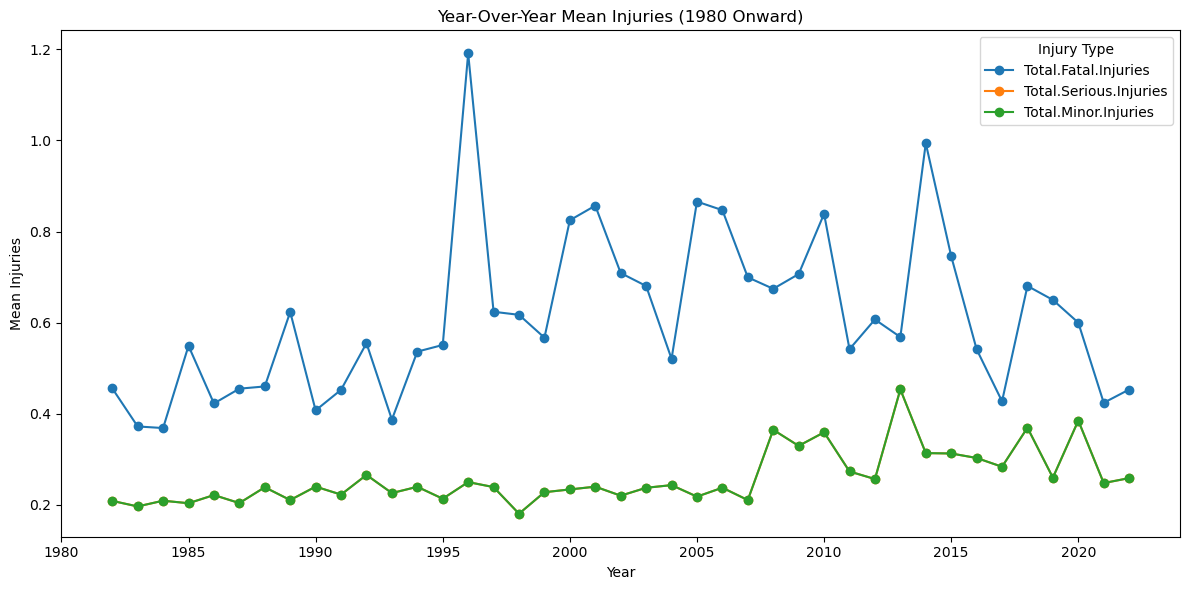

In [219]:
yearly_injuries_1980_mean.plot(figsize=(12, 6), marker='o', title='Year-Over-Year Mean Injuries (1980 Onward)')
plt.xlabel('Year')
plt.ylabel('Mean Injuries')
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

In [220]:
total_inj_2013 = filtered_df.loc[:, ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
print(total_inj_2013)

Total.Fatal.Injuries      8786.0
Total.Serious.Injuries    4592.0
Total.Minor.Injuries      4592.0
dtype: float64


In [221]:
yearly_injuries_2013_23 = filtered_df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

print(yearly_injuries_2013_23)

      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries
Year                                                                    
2013                 822.0                   656.0                 656.0
2014                1428.0                   451.0                 451.0
2015                1101.0                   462.0                 462.0
2016                 820.0                   459.0                 459.0
2017                 640.0                   425.0                 425.0
2018                1044.0                   567.0                 567.0
2019                 960.0                   384.0                 384.0
2020                 768.0                   493.0                 493.0
2021                 571.0                   334.0                 334.0
2022                 632.0                   361.0                 361.0


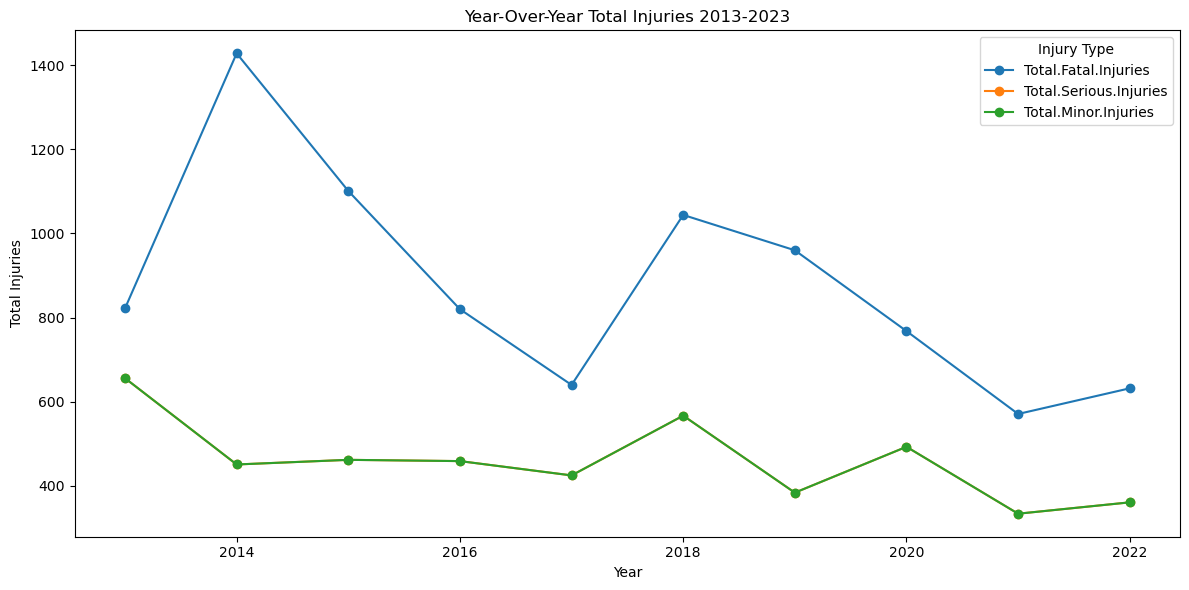

In [222]:
yearly_injuries_2013_23.plot(figsize=(12, 6), marker='o', title='Year-Over-Year Total Injuries 2013-2023')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

In [223]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
df_makes = filtered_df[filtered_df['Make'].isin(selected_makes)]

In [224]:
yearly_injuries_by_make = (
    df_makes.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]
    .sum()
    .reset_index()
)

print(yearly_injuries_by_make.head(10))

   Year    Make  Total.Fatal.Injuries  Total.Serious.Injuries  \
0  2013  AIRBUS                   6.0                    14.0   
1  2013   BEECH                  77.0                    31.0   
2  2013  BOEING                  70.0                   181.0   
3  2013  CESSNA                 156.0                   116.0   
4  2013   PIPER                 113.0                    60.0   
5  2014  AIRBUS                 166.0                     6.0   
6  2014   BEECH                  36.0                    13.0   
7  2014  BOEING                 536.0                    52.0   
8  2014  CESSNA                 152.0                    97.0   
9  2014   PIPER                 109.0                    57.0   

   Total.Minor.Injuries  
0                  14.0  
1                  31.0  
2                 181.0  
3                 116.0  
4                  60.0  
5                   6.0  
6                  13.0  
7                  52.0  
8                  97.0  
9                  57.0 

In [225]:
pivot_fatal_injuries = yearly_injuries_by_make.pivot(index='Year', columns='Make', values='Total.Fatal.Injuries').fillna(0)

In [226]:
pivot_serious_injuries = yearly_injuries_by_make.pivot(index='Year', columns='Make', values='Total.Serious.Injuries').fillna(0)

In [227]:
print(df_makes['Make'].unique())

['CESSNA' 'PIPER' 'BEECH' 'BOEING' 'AIRBUS']


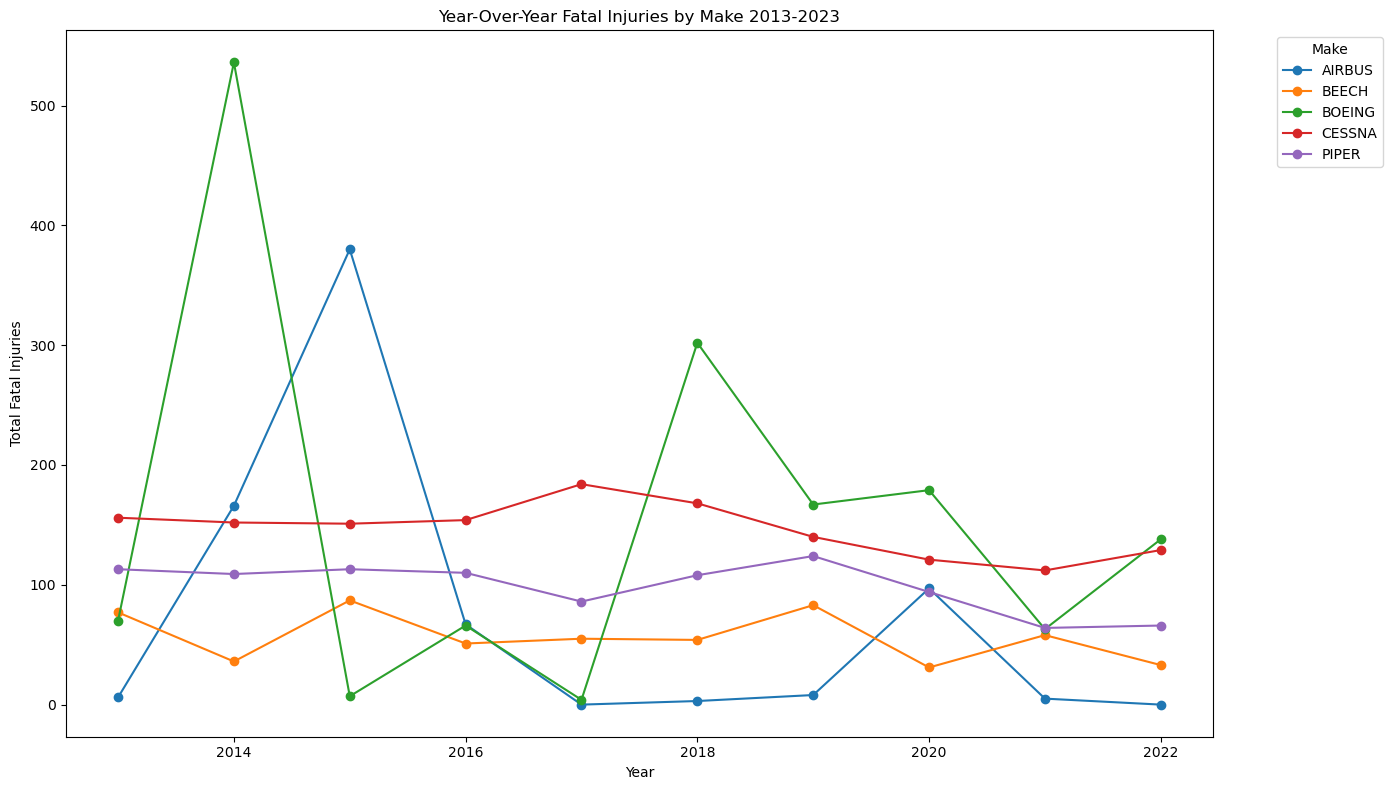

In [228]:
pivot_fatal_injuries.plot(figsize=(14, 8), marker='o', title='Year-Over-Year Fatal Injuries by Make 2013-2023')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

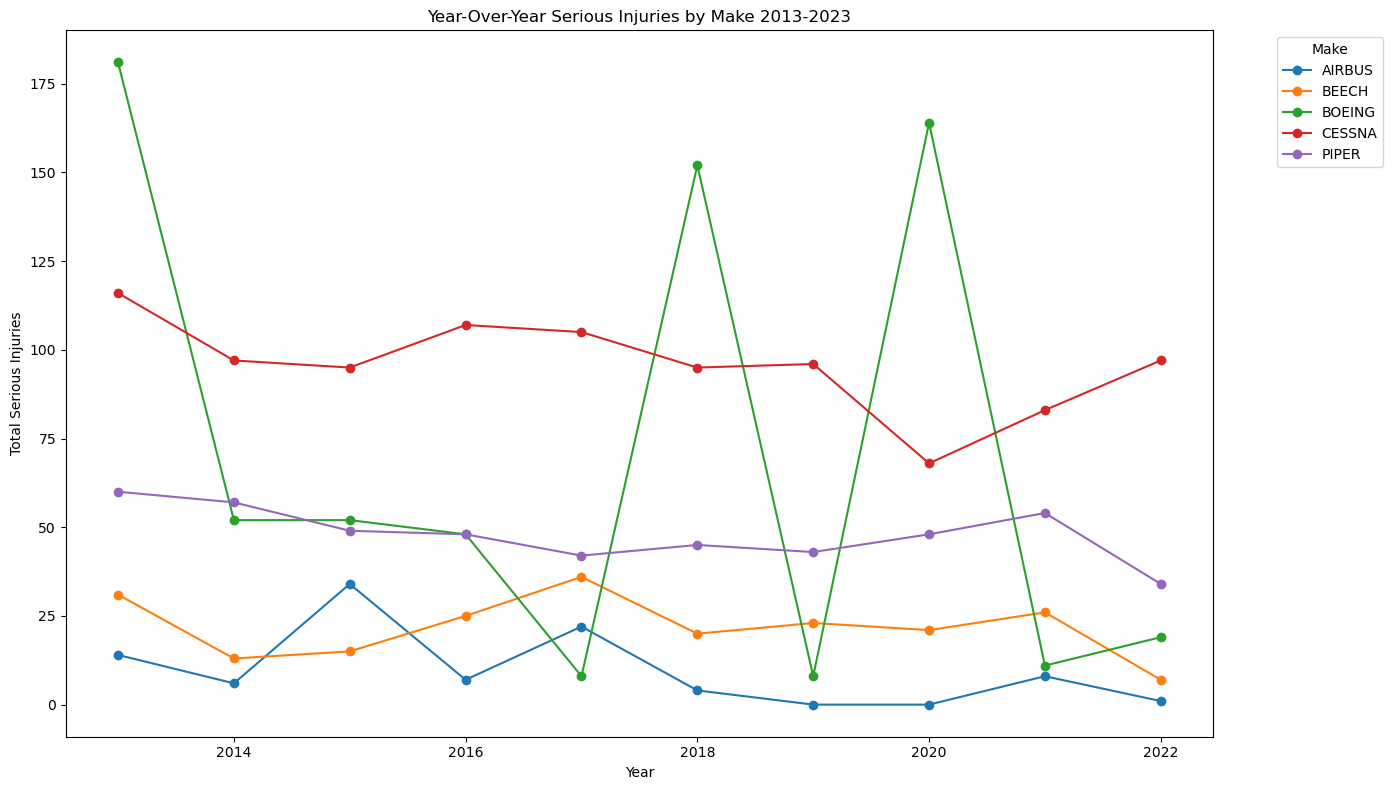

In [229]:
pivot_serious_injuries.plot(figsize=(14, 8), marker='o', title='Year-Over-Year Serious Injuries by Make 2013-2023')
plt.xlabel('Year')
plt.ylabel('Total Serious Injuries')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [230]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_df_makes = filtered_df[filtered_df['Make'].isin(selected_makes)]

In [231]:
yearly_uninjured_by_make = (
    filtered_df_makes.groupby(['Year', 'Make'])['Total.Uninjured']
    .sum()
    .reset_index()
)

print(yearly_uninjured_by_make.head())

   Year    Make  Total.Uninjured
0  2013  AIRBUS           1167.0
1  2013   BEECH             97.0
2  2013  BOEING           2019.0
3  2013  CESSNA            458.0
4  2013   PIPER            228.0


In [232]:
pivot_uninjured = yearly_uninjured_by_make.pivot(index='Year', columns='Make', values='Total.Uninjured').fillna(0)
print(pivot_uninjured)

Make  AIRBUS  BEECH  BOEING  CESSNA  PIPER
Year                                      
2013  1167.0   97.0  2019.0   458.0  228.0
2014   791.0   50.0  3537.0   374.0  226.0
2015   864.0   93.0  3078.0   423.0  199.0
2016   483.0  134.0  3713.0   506.0  222.0
2017  2174.0   52.0  2484.0   499.0  201.0
2018  1282.0  105.0  2733.0   425.0  252.0
2019   771.0  105.0  2643.0   449.0  271.0
2020   297.0   80.0  1429.0   391.0  227.0
2021   726.0   99.0  1842.0   456.0  231.0
2022   874.0   67.0  1990.0   392.0  246.0


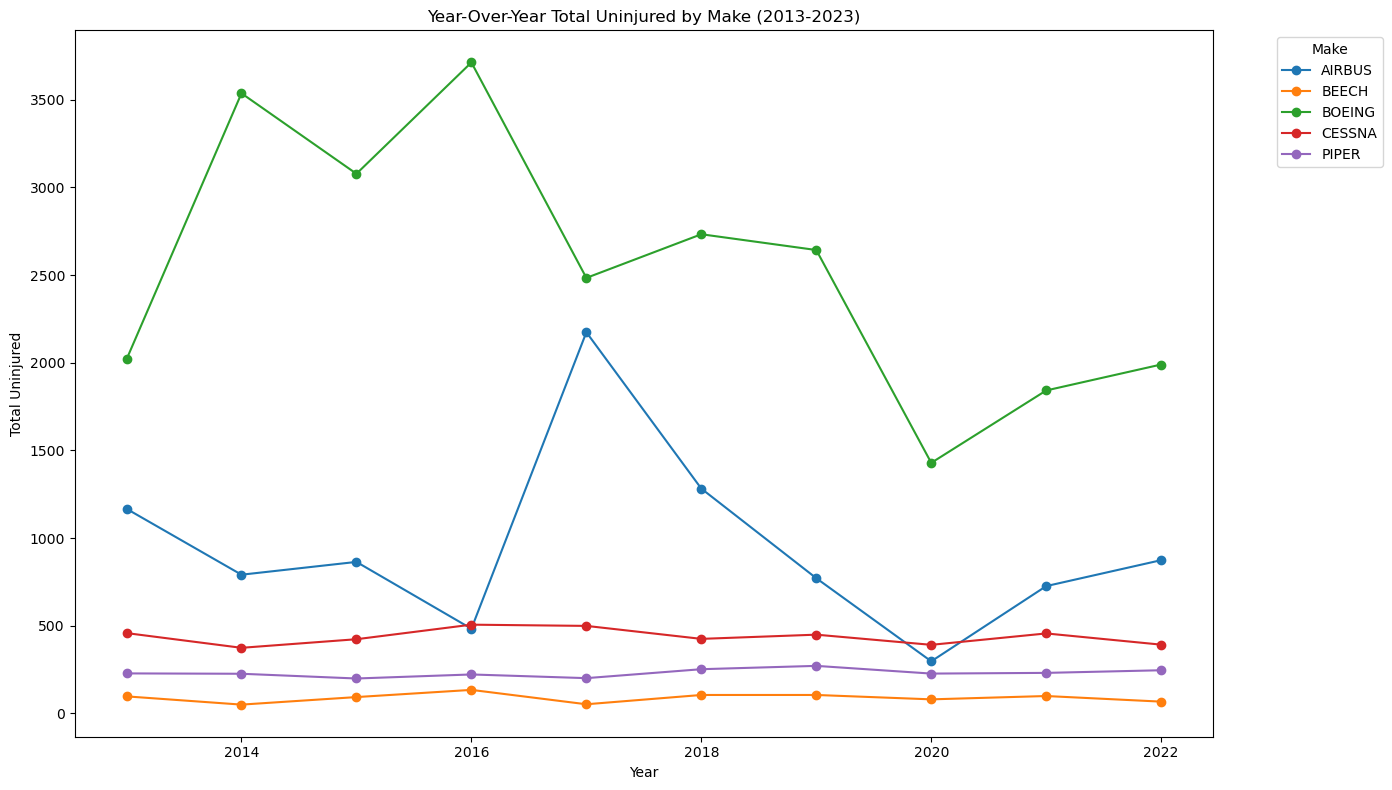

In [233]:
pivot_uninjured.plot(figsize=(14, 8), marker='o', title='Year-Over-Year Total Uninjured by Make (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Uninjured')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [341]:
yearly_injured_total_sum = (
    filtered_df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .sum(axis=1)
    .reset_index(name='total_injured')
)

print(yearly_injured_total_sum)

   Year  total_injured
0  2013         1478.0
1  2014         1879.0
2  2015         1563.0
3  2016         1279.0
4  2017         1065.0
5  2018         1611.0
6  2019         1344.0
7  2020         1261.0
8  2021          905.0
9  2022          993.0


In [235]:
yearly_uninjured = (
    filtered_df.groupby('Year')['Total.Uninjured']
    .sum()
    .reset_index(name='total_uninjured')
)

print(yearly_uninjured)

   Year  total_uninjured
0  2013           5113.0
1  2014           6778.0
2  2015           5964.0
3  2016           6294.0
4  2017           6897.0
5  2018           6417.0
6  2019           5700.0
7  2020           3163.0
8  2021           4238.0
9  2022           4445.0


In [236]:
df.to_csv("jan_23_project_df.csv", index=False)

In [237]:
# Combine fatal, serious, and uninjured into a single DataFrame
combined_injuries_uninjured = pd.concat(
    [
        pivot_fatal_injuries.reset_index().melt(id_vars='Year', var_name='Make', value_name='Fatal.Injuries'),
        pivot_serious_injuries.reset_index().melt(id_vars='Year', var_name='Make', value_name='Serious.Injuries'),
        pivot_uninjured.reset_index().melt(id_vars='Year', var_name='Make', value_name='Uninjured')
    ],
    axis=0
).pivot_table(index=['Year', 'Make'], values=['Fatal.Injuries', 'Serious.Injuries', 'Uninjured'], aggfunc='sum').reset_index()

print(combined_injuries_uninjured)

    Year    Make  Fatal.Injuries  Serious.Injuries  Uninjured
0   2013  AIRBUS             6.0              14.0     1167.0
1   2013   BEECH            77.0              31.0       97.0
2   2013  BOEING            70.0             181.0     2019.0
3   2013  CESSNA           156.0             116.0      458.0
4   2013   PIPER           113.0              60.0      228.0
5   2014  AIRBUS           166.0               6.0      791.0
6   2014   BEECH            36.0              13.0       50.0
7   2014  BOEING           536.0              52.0     3537.0
8   2014  CESSNA           152.0              97.0      374.0
9   2014   PIPER           109.0              57.0      226.0
10  2015  AIRBUS           380.0              34.0      864.0
11  2015   BEECH            87.0              15.0       93.0
12  2015  BOEING             7.0              52.0     3078.0
13  2015  CESSNA           151.0              95.0      423.0
14  2015   PIPER           113.0              49.0      199.0
15  2016

In [238]:
# Calculate totals and percentages
combined_injuries_uninjured['Total.Injured'] = combined_injuries_uninjured['Fatal.Injuries'] + combined_injuries_uninjured['Serious.Injuries']
combined_injuries_uninjured['Total.Sum'] = combined_injuries_uninjured['Total.Injured'] + combined_injuries_uninjured['Uninjured']
combined_injuries_uninjured['Percent.Uninjured'] = (combined_injuries_uninjured['Uninjured'] / combined_injuries_uninjured['Total.Sum']) * 100
combined_injuries_uninjured['Percent.Injured'] = (combined_injuries_uninjured['Total.Injured'] / combined_injuries_uninjured['Total.Sum']) * 100

print(combined_injuries_uninjured.head(50))

    Year    Make  Fatal.Injuries  Serious.Injuries  Uninjured  Total.Injured  \
0   2013  AIRBUS             6.0              14.0     1167.0           20.0   
1   2013   BEECH            77.0              31.0       97.0          108.0   
2   2013  BOEING            70.0             181.0     2019.0          251.0   
3   2013  CESSNA           156.0             116.0      458.0          272.0   
4   2013   PIPER           113.0              60.0      228.0          173.0   
5   2014  AIRBUS           166.0               6.0      791.0          172.0   
6   2014   BEECH            36.0              13.0       50.0           49.0   
7   2014  BOEING           536.0              52.0     3537.0          588.0   
8   2014  CESSNA           152.0              97.0      374.0          249.0   
9   2014   PIPER           109.0              57.0      226.0          166.0   
10  2015  AIRBUS           380.0              34.0      864.0          414.0   
11  2015   BEECH            87.0        

In [241]:
# Filter the dataset to include only the six selected makes
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

# Count the number of rows (incidents) per Year and Make
incident_counts = filtered_makes_df.groupby(['Year', 'Make']).size().reset_index(name='incident_count')

print(incident_counts)

    Year    Make  incident_count
0   2013  AIRBUS               7
1   2013   BEECH              81
2   2013  BOEING              23
3   2013  CESSNA             371
4   2013   PIPER             214
5   2014  AIRBUS              11
6   2014   BEECH              53
7   2014  BOEING              36
8   2014  CESSNA             335
9   2014   PIPER             210
10  2015  AIRBUS              20
11  2015   BEECH              84
12  2015  BOEING              27
13  2015  CESSNA             370
14  2015   PIPER             211
15  2016  AIRBUS              11
16  2016   BEECH              83
17  2016  BOEING              40
18  2016  CESSNA             387
19  2016   PIPER             203
20  2017  AIRBUS              15
21  2017   BEECH              70
22  2017  BOEING              28
23  2017  CESSNA             402
24  2017   PIPER             204
25  2018  AIRBUS               9
26  2018   BEECH              91
27  2018  BOEING              26
28  2018  CESSNA             398
29  2018  

In [289]:
# Merge incident counts with injury/uninjured data
combined_with_counts = pd.merge(
    combined_injuries_uninjured,
    incident_counts,
    on=['Year', 'Make']
).sort_values(by=['Make', 'Year'])

# Drop the columns for fatal and serious injuries
combined_with_counts = combined_with_counts.drop(columns=['Total.Fatal.Injuries', 'Total.Serious.Injuries'])

# Preview the updated dataset
print(combined_with_counts)

KeyError: "['Total.Fatal.Injuries', 'Total.Serious.Injuries'] not found in axis"

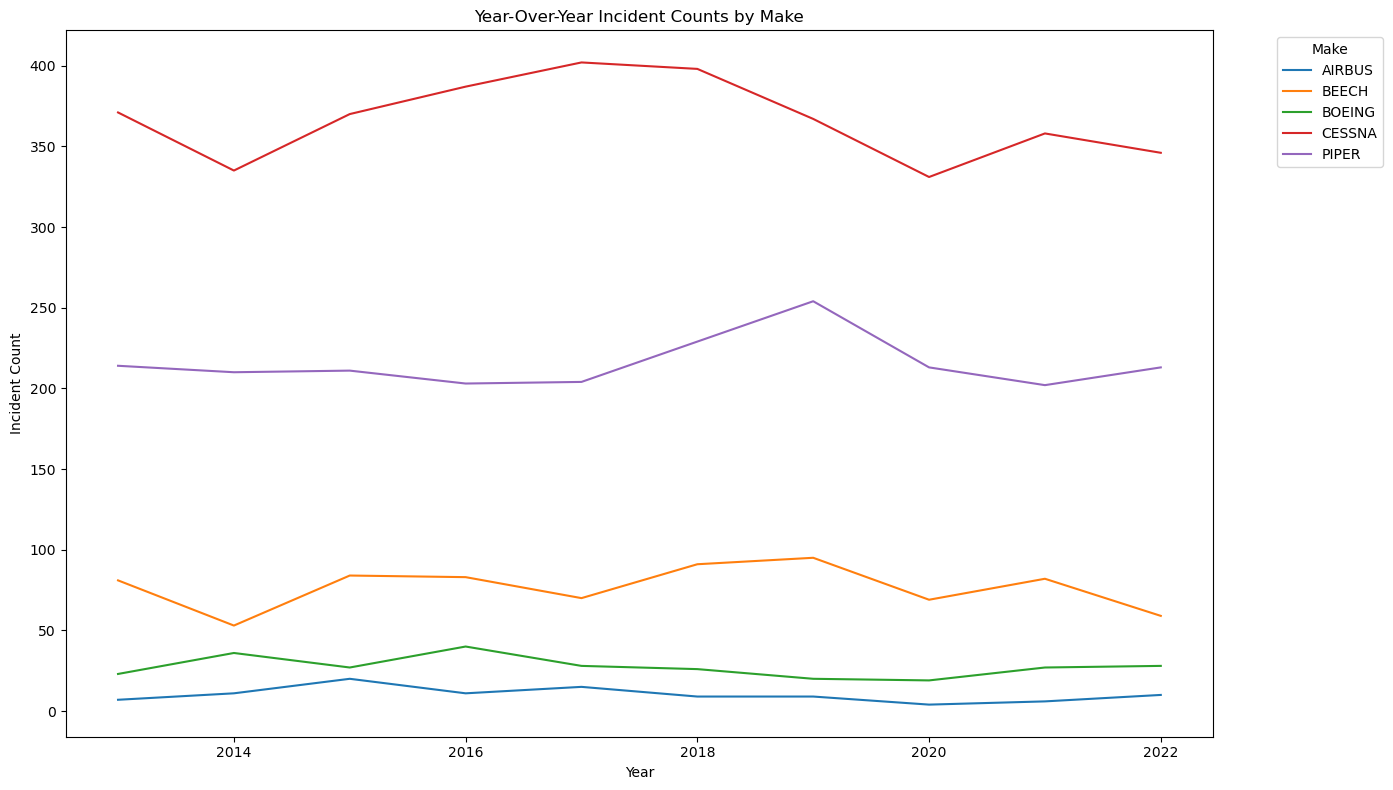

In [244]:
# Pivot incident counts for plotting
pivot_incident_counts = incident_counts.pivot(index='Year', columns='Make', values='incident_count').fillna(0)

# Plot incident counts
pivot_incident_counts.plot(kind='line', figsize=(14, 8), title='Year-Over-Year Incident Counts by Make')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [249]:
# Calculate the likelihood of being injured
combined_with_counts['Likelihood.Injured'] = (
    combined_with_counts['Total.Injured'] / combined_with_counts['incident_count']
) * 100

# Select and organize only the necessary columns for readability
cleaned_output = combined_with_counts[[
    'Year', 'Make', 'Total.Injured', 'incident_count', 'Likelihood.Injured'
]].sort_values(by=['Year', 'Make'])

# Rename columns for better readability
cleaned_output.rename(
    columns={
        'Total.Injured': 'Total Injuries',
        'incident_count': 'Incident Count',
        'Likelihood.Injured': 'Likelihood of Injury (%)'
    },
    inplace=True
)

# Print the cleaned dataset
print(cleaned_output)

    Year    Make  Total Injuries  Incident Count  Likelihood of Injury (%)
0   2013  AIRBUS            20.0               7                285.714286
1   2013   BEECH           108.0              81                133.333333
2   2013  BOEING           251.0              23               1091.304348
3   2013  CESSNA           272.0             371                 73.315364
4   2013   PIPER           173.0             214                 80.841121
5   2014  AIRBUS           172.0              11               1563.636364
6   2014   BEECH            49.0              53                 92.452830
7   2014  BOEING           588.0              36               1633.333333
8   2014  CESSNA           249.0             335                 74.328358
9   2014   PIPER           166.0             210                 79.047619
10  2015  AIRBUS           414.0              20               2070.000000
11  2015   BEECH           102.0              84                121.428571
12  2015  BOEING         

In [265]:
injuries_by_make = filtered_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()
injuries_by_make['Total.Injured'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

In [266]:
incident_counts = filtered_df.groupby(['Year', 'Make']).size().reset_index(name='Incident Count')

In [295]:
# Step 1: Calculate total injuries (Fatal + Serious) per Year and Make
injuries_by_make = filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()
injuries_by_make['Total Injuries'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

# Step 2: Count incidents (rows) per Year and Make
incident_counts = filtered_makes_df.groupby(['Year', 'Make']).size().reset_index(name='Make Incident Count')

# Step 3: Calculate total incidents per Year
total_incidents = filtered_makes_df.groupby('Year').size().reset_index(name='Total Incidents')

# Step 4: Merge injuries and incident counts
combined = pd.merge(injuries_by_make.reset_index(), incident_counts, on=['Year', 'Make'])

# Step 5: Merge total incidents into the combined dataset
combined = pd.merge(combined, total_incidents, on='Year')

# Step 6: Calculate Likelihood of Incident (%)
combined['Likelihood of Incident (%)'] = (combined['Make Incident Count'] / combined['Total Incidents']) * 100

# Step 7: Select and rename columns for a clean output
output = combined[[
    'Year', 'Make', 'Total Injuries', 'Make Incident Count', 'Total Incidents', 'Likelihood of Incident (%)'
]].sort_values(by=['Year', 'Make'])

# Display the output
print(output)

    Year    Make  Total Injuries  Make Incident Count  Total Incidents  \
0   2013  AIRBUS            20.0                    7              696   
1   2013   BEECH           108.0                   81              696   
2   2013  BOEING           251.0                   23              696   
3   2013  CESSNA           272.0                  371              696   
4   2013   PIPER           173.0                  214              696   
5   2014  AIRBUS           172.0                   11              645   
6   2014   BEECH            49.0                   53              645   
7   2014  BOEING           588.0                   36              645   
8   2014  CESSNA           249.0                  335              645   
9   2014   PIPER           166.0                  210              645   
10  2015  AIRBUS           414.0                   20              712   
11  2015   BEECH           102.0                   84              712   
12  2015  BOEING            59.0      

In [284]:
boeing_metrics = combined_with_counts[combined_with_counts['Make'] == 'BOEING']
boeing_metrics = boeing_metrics.sort_values(by='Year')
boeing_summary = boeing_metrics.groupby('Year').sum()

print(boeing_summary)

        Make  Fatal.Injuries  Serious.Injuries  Uninjured  Total.Injured  \
Year                                                                       
2013  BOEING            70.0             181.0     2019.0          251.0   
2014  BOEING           536.0              52.0     3537.0          588.0   
2015  BOEING             7.0              52.0     3078.0           59.0   
2016  BOEING            66.0              48.0     3713.0          114.0   
2017  BOEING             4.0               8.0     2484.0           12.0   
2018  BOEING           302.0             152.0     2733.0          454.0   
2019  BOEING           167.0               8.0     2643.0          175.0   
2020  BOEING           179.0             164.0     1429.0          343.0   
2021  BOEING            63.0              11.0     1842.0           74.0   
2022  BOEING           138.0              19.0     1990.0          157.0   

      Total.Sum  Percent.Uninjured  Percent.Injured  incident_count  \
Year            

In [304]:
make_output_col = output[['Make', 'Year', 'Total Incidents', 'Likelihood of Incident (%)']]
make_comp_output_year = make_output_col.sort_values(by= 'Year')
make_comp_output = make_comp_output_year.groupby(['Year', 'Make']).sum().reset_index()

print(make_comp_output)

    Year    Make  Total Incidents  Likelihood of Incident (%)
0   2013  AIRBUS              696                    1.005747
1   2013   BEECH              696                   11.637931
2   2013  BOEING              696                    3.304598
3   2013  CESSNA              696                   53.304598
4   2013   PIPER              696                   30.747126
5   2014  AIRBUS              645                    1.705426
6   2014   BEECH              645                    8.217054
7   2014  BOEING              645                    5.581395
8   2014  CESSNA              645                   51.937984
9   2014   PIPER              645                   32.558140
10  2015  AIRBUS              712                    2.808989
11  2015   BEECH              712                   11.797753
12  2015  BOEING              712                    3.792135
13  2015  CESSNA              712                   51.966292
14  2015   PIPER              712                   29.634831
15  2016

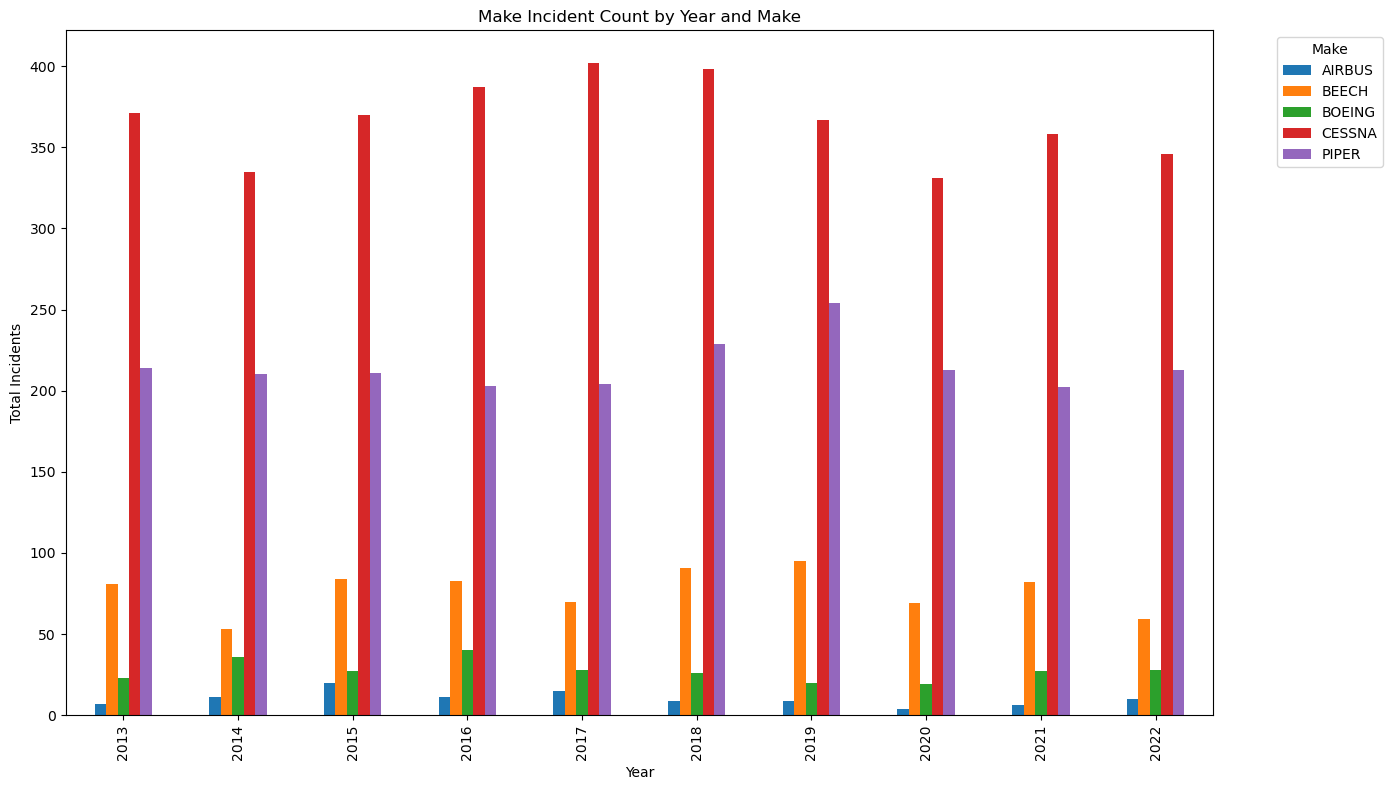

In [308]:
pivoted_data = output.pivot(index='Year', columns='Make', values='Make Incident Count')

pivoted_data.plot(
    kind='bar',
    figsize=(14, 8),
    title='Make Incident Count by Year and Make',
    xlabel='Year',
    ylabel='Total Incidents',
    legend=True
)

plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

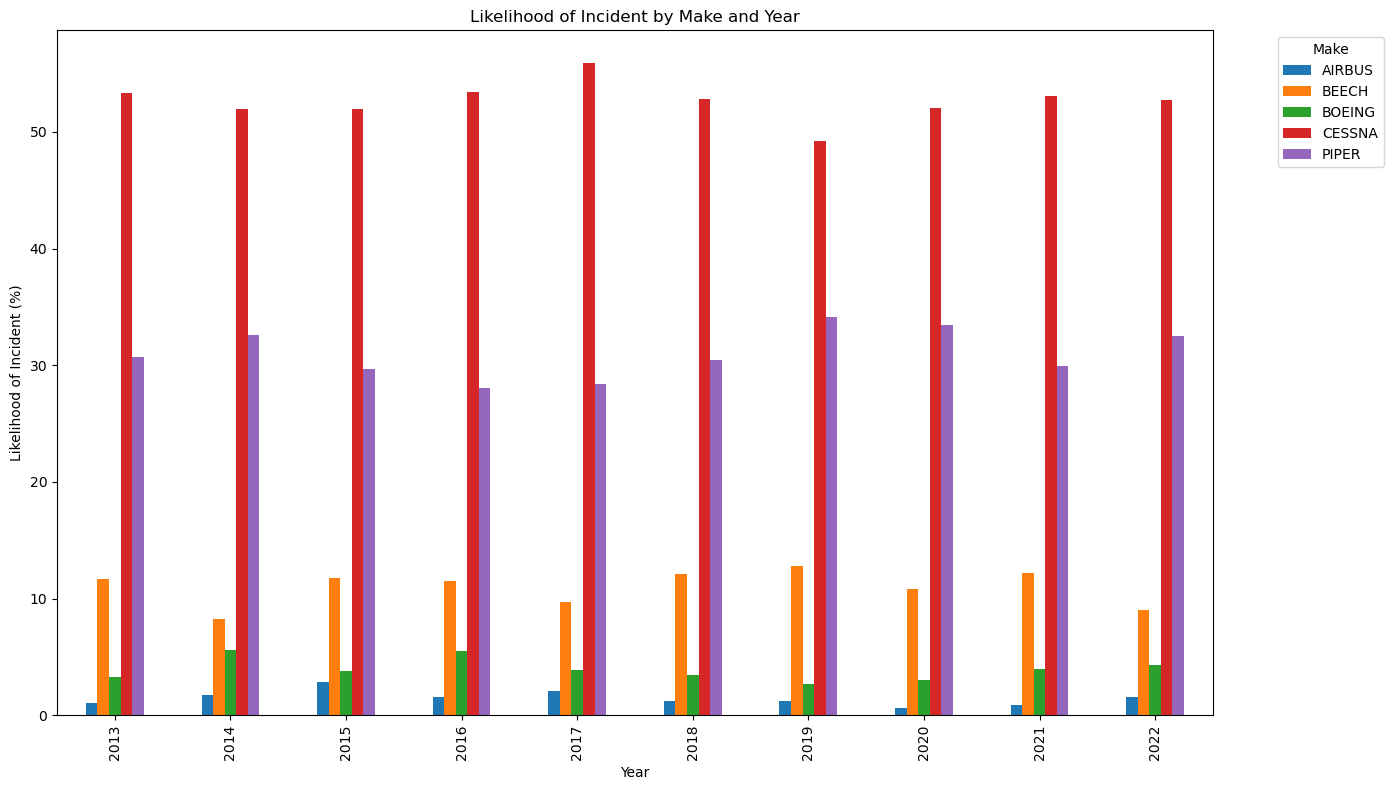

In [309]:
import matplotlib.pyplot as plt

# Pivot the data for plotting
pivoted_likelihood = make_comp_output.pivot(index='Year', columns='Make', values='Likelihood of Incident (%)')

# Plot the likelihood of incidents as a bar chart
pivoted_likelihood.plot(
    kind='bar',
    figsize=(14, 8),
    title='Likelihood of Incident by Make and Year',
    xlabel='Year',
    ylabel='Likelihood of Incident (%)',
    legend=True
)

# Customize the legend
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [310]:
# Clean and display the table
clean_table = make_comp_output[['Year', 'Make', 'Likelihood of Incident (%)']]

# Print the clean table
print(clean_table)

    Year    Make  Likelihood of Incident (%)
0   2013  AIRBUS                    1.005747
1   2013   BEECH                   11.637931
2   2013  BOEING                    3.304598
3   2013  CESSNA                   53.304598
4   2013   PIPER                   30.747126
5   2014  AIRBUS                    1.705426
6   2014   BEECH                    8.217054
7   2014  BOEING                    5.581395
8   2014  CESSNA                   51.937984
9   2014   PIPER                   32.558140
10  2015  AIRBUS                    2.808989
11  2015   BEECH                   11.797753
12  2015  BOEING                    3.792135
13  2015  CESSNA                   51.966292
14  2015   PIPER                   29.634831
15  2016  AIRBUS                    1.519337
16  2016   BEECH                   11.464088
17  2016  BOEING                    5.524862
18  2016  CESSNA                   53.453039
19  2016   PIPER                   28.038674
20  2017  AIRBUS                    2.086231
21  2017  

In [315]:
# Filter the table for Boeing and Airbus
filtered_table = clean_table[clean_table['Make'].isin(['BOEING', 'AIRBUS'])]

# Sort by Year and Make for a clean display
filtered_table = filtered_table.sort_values(by=['Make', 'Year'])

# Display the filtered table
print(filtered_table)

    Year    Make  Likelihood of Incident (%)
0   2013  AIRBUS                    1.005747
5   2014  AIRBUS                    1.705426
10  2015  AIRBUS                    2.808989
15  2016  AIRBUS                    1.519337
20  2017  AIRBUS                    2.086231
25  2018  AIRBUS                    1.195219
30  2019  AIRBUS                    1.208054
35  2020  AIRBUS                    0.628931
40  2021  AIRBUS                    0.888889
45  2022  AIRBUS                    1.524390
2   2013  BOEING                    3.304598
7   2014  BOEING                    5.581395
12  2015  BOEING                    3.792135
17  2016  BOEING                    5.524862
22  2017  BOEING                    3.894298
27  2018  BOEING                    3.452855
32  2019  BOEING                    2.684564
37  2020  BOEING                    2.987421
42  2021  BOEING                    4.000000
47  2022  BOEING                    4.268293


In [314]:
# Filter the table for Boeing and Airbus
filtered_table = clean_table[clean_table['Make'].isin(['BEECH', 'CESSNA', 'PIPER'])]

# Sort by Year and Make for a clean display
filtered_table = filtered_table.sort_values(by=['Make', 'Year'])

# Display the filtered table
print(filtered_table)

    Year    Make  Likelihood of Incident (%)
1   2013   BEECH                   11.637931
6   2014   BEECH                    8.217054
11  2015   BEECH                   11.797753
16  2016   BEECH                   11.464088
21  2017   BEECH                    9.735744
26  2018   BEECH                   12.084993
31  2019   BEECH                   12.751678
36  2020   BEECH                   10.849057
41  2021   BEECH                   12.148148
46  2022   BEECH                    8.993902
3   2013  CESSNA                   53.304598
8   2014  CESSNA                   51.937984
13  2015  CESSNA                   51.966292
18  2016  CESSNA                   53.453039
23  2017  CESSNA                   55.910987
28  2018  CESSNA                   52.855246
33  2019  CESSNA                   49.261745
38  2020  CESSNA                   52.044025
43  2021  CESSNA                   53.037037
48  2022  CESSNA                   52.743902
4   2013   PIPER                   30.747126
9   2014  

In [316]:
average_likelihood = clean_table.groupby('Make')['Likelihood of Incident (%)'].mean().reset_index()
print(average_likelihood)

     Make  Likelihood of Incident (%)
0  AIRBUS                    1.457121
1   BEECH                   10.968035
2  BOEING                    3.949042
3  CESSNA                   52.651486
4   PIPER                   30.974316


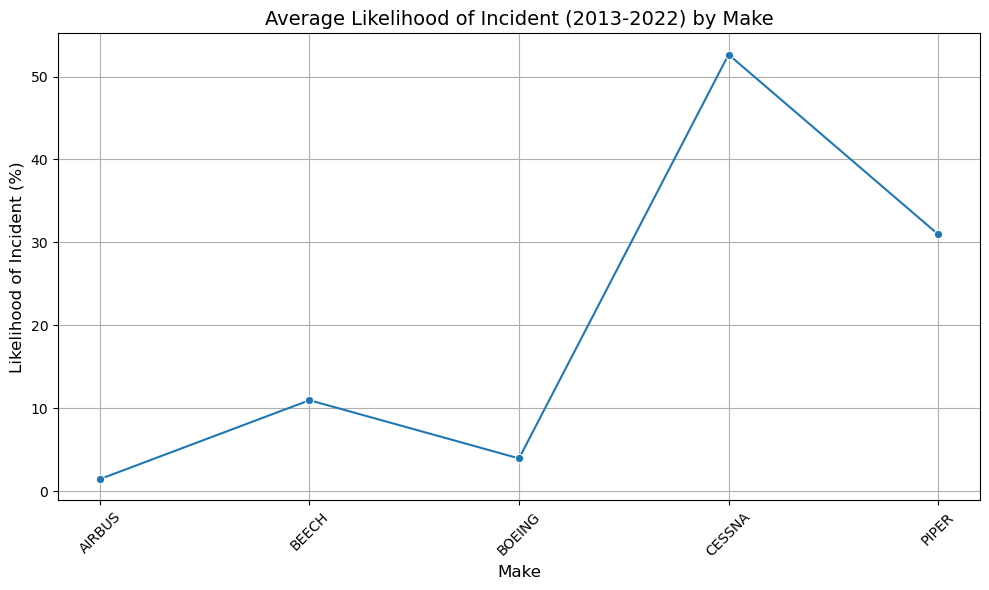

In [317]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=average_likelihood,
    x='Make',
    y='Likelihood of Incident (%)',
    marker='o'
)

plt.title('Average Likelihood of Incident (2013-2022) by Make', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Likelihood of Incident (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)

plt.tight_layout()
plt.show()


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_699/766817878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


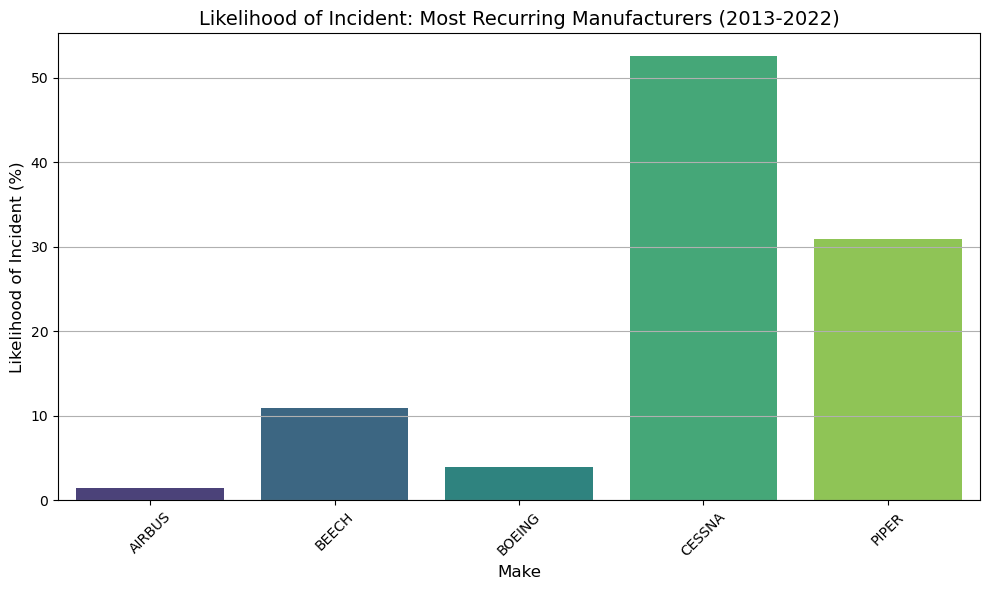

In [320]:
# Create a seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=average_likelihood,
    x='Make',
    y='Likelihood of Incident (%)',
    palette='viridis'  # Nice color palette
)

# Add labels and title
plt.title('Likelihood of Incident: Most Recurring Manufacturers (2013-2022)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Likelihood of Incident (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add horizontal gridlines for better readability

# Show the plot
plt.tight_layout()
plt.show()

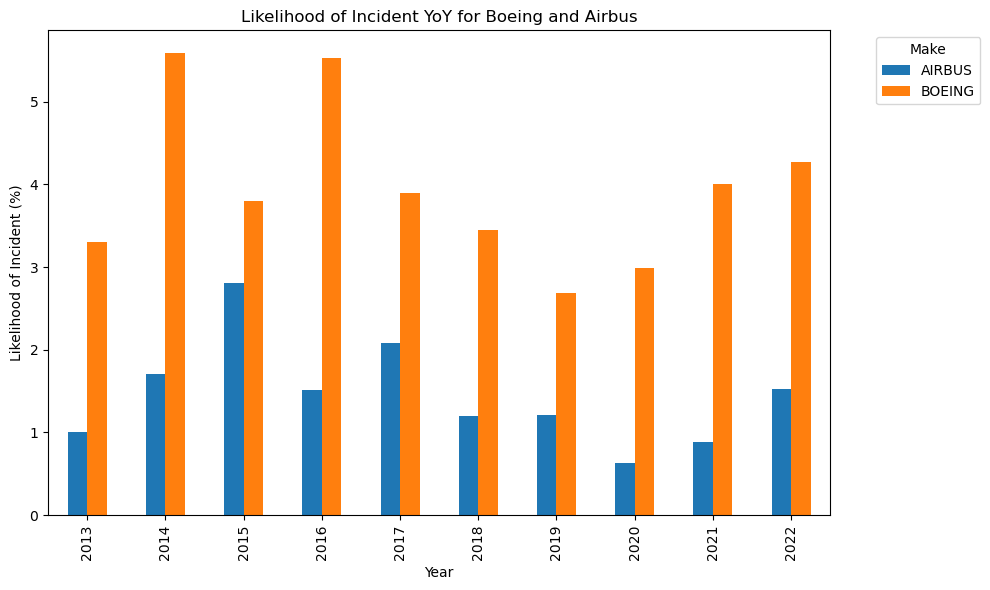

In [324]:
# Pivot the filtered data for plotting
pivoted_filtered = filtered_table.pivot(index='Year', columns='Make', values='Likelihood of Incident (%)')

# Plot the bar graph
pivoted_filtered.plot(
    kind='bar',
    figsize=(10, 6),
    title='Likelihood of Incident YoY for Boeing and Airbus',
    xlabel='Year',
    ylabel='Likelihood of Incident (%)',
    legend=True
)

# Customize the layout
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [326]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

injuries_by_make = filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()
injuries_by_make['Total Injuries'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

total_injuries_by_year = injuries_by_make.groupby('Year')['Total Injuries'].sum().reset_index(name='Total Injuries All Makes')

injuries_with_totals = injuries_by_make.reset_index()
injuries_with_totals = pd.merge(injuries_with_totals, total_injuries_by_year, on='Year')

injuries_with_totals['Likelihood of Injuries (%)'] = (
    (injuries_with_totals['Total Injuries'] / injuries_with_totals['Total Injuries All Makes']) * 100
)

output_injuries = injuries_with_totals[[
    'Year', 'Make', 'Total Injuries', 'Total Injuries All Makes', 'Likelihood of Injuries (%)'
]].sort_values(by=['Year', 'Make'])

print(output_injuries)

    Year    Make  Total Injuries  Total Injuries All Makes  \
0   2013  AIRBUS            20.0                     824.0   
1   2013   BEECH           108.0                     824.0   
2   2013  BOEING           251.0                     824.0   
3   2013  CESSNA           272.0                     824.0   
4   2013   PIPER           173.0                     824.0   
5   2014  AIRBUS           172.0                    1224.0   
6   2014   BEECH            49.0                    1224.0   
7   2014  BOEING           588.0                    1224.0   
8   2014  CESSNA           249.0                    1224.0   
9   2014   PIPER           166.0                    1224.0   
10  2015  AIRBUS           414.0                     983.0   
11  2015   BEECH           102.0                     983.0   
12  2015  BOEING            59.0                     983.0   
13  2015  CESSNA           246.0                     983.0   
14  2015   PIPER           162.0                     983.0   
15  2016

In [327]:
average_inj_likelihood = output_injuries.groupby('Make')['Likelihood of Injuries (%)'].mean().reset_index()
print(average_inj_likelihood)

     Make  Likelihood of Injuries (%)
0  AIRBUS                    9.004411
1   BEECH                   10.981002
2  BOEING                   26.336363
3  CESSNA                   33.805601
4   PIPER                   19.872623


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_699/92707184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


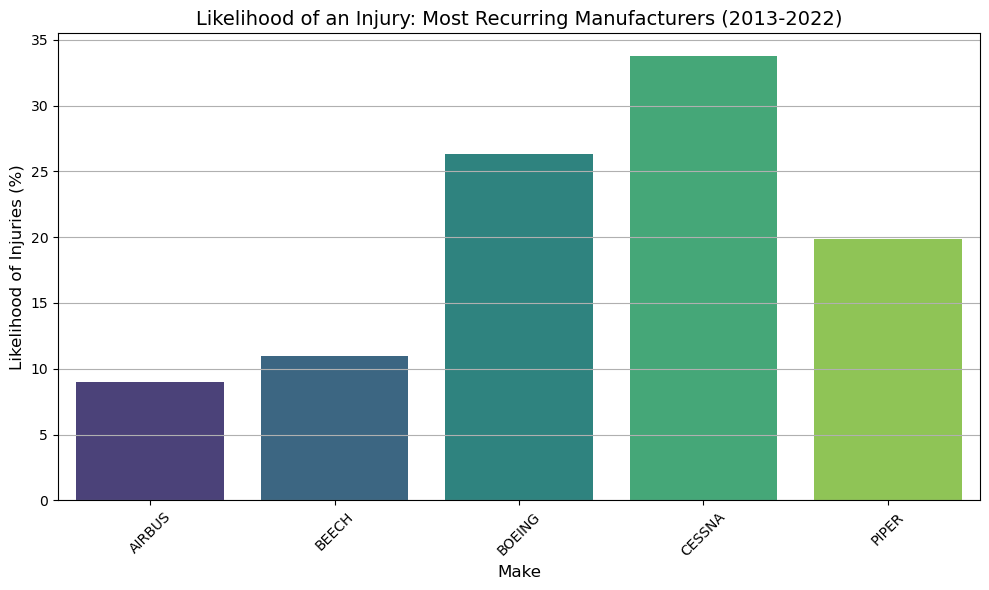

In [329]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=average_inj_likelihood,
    x='Make',
    y='Likelihood of Injuries (%)',
    palette='viridis'  # Nice color palette
)

# Add labels and title
plt.title('Likelihood of an Injury: Most Recurring Manufacturers (2013-2022)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Likelihood of Injuries (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add horizontal gridlines for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [335]:
# Step 1: Filter the dataset for the selected makes
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

# Step 2: Calculate total injuries (fatal + serious) per Year and Make
injuries_by_make = filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()
injuries_by_make['Total Injuries'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

# Step 3: Calculate total injuries across the selected makes per year
total_injuries_by_year = injuries_by_make.groupby('Year')['Total Injuries'].sum().reset_index(name='Total Injuries All Makes')

# Step 4: Merge total injuries across the selected makes into injuries_by_make
injuries_with_totals = injuries_by_make.reset_index()
injuries_with_totals = pd.merge(injuries_with_totals, total_injuries_by_year, on='Year')

# Step 5: Calculate likelihood of injuries by make
injuries_with_totals['Likelihood of Injuries (%)'] = (
    (injuries_with_totals['Total Injuries'] / injuries_with_totals['Total Injuries All Makes']) * 100
)

# Step 6: Select and organize relevant columns
safety_rates = injuries_with_totals[[
    'Year', 'Make', 'Total Injuries', 'Total Injuries All Makes', 'Likelihood of Injuries (%)'
]].sort_values(by=['Year', 'Make'])

# Display the result
print(safety_rates)

    Year    Make  Total Injuries  Total Injuries All Makes  \
0   2013  AIRBUS            20.0                     824.0   
1   2013   BEECH           108.0                     824.0   
2   2013  BOEING           251.0                     824.0   
3   2013  CESSNA           272.0                     824.0   
4   2013   PIPER           173.0                     824.0   
5   2014  AIRBUS           172.0                    1224.0   
6   2014   BEECH            49.0                    1224.0   
7   2014  BOEING           588.0                    1224.0   
8   2014  CESSNA           249.0                    1224.0   
9   2014   PIPER           166.0                    1224.0   
10  2015  AIRBUS           414.0                     983.0   
11  2015   BEECH           102.0                     983.0   
12  2015  BOEING            59.0                     983.0   
13  2015  CESSNA           246.0                     983.0   
14  2015   PIPER           162.0                     983.0   
15  2016

In [337]:
# Step 1: Filter the dataset for the selected makes
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

# Step 2: Calculate total injuries (fatal + serious) and uninjured per Year and Make
injuries_by_make = filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']].sum()
injuries_by_make['Total Injured'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

# Step 3: Calculate total individuals involved (injured + uninjured)
injuries_by_make['Total Individuals'] = injuries_by_make['Total Injured'] + injuries_by_make['Total.Uninjured']

# Step 4: Calculate safety rate (percentage of uninjured individuals)
injuries_by_make['Safety Rate (%)'] = (injuries_by_make['Total.Uninjured'] / injuries_by_make['Total Individuals']) * 100

# Step 5: Select and organize relevant columns
safety_output = injuries_by_make.reset_index()[[
    'Year', 'Make', 'Total.Uninjured', 'Total Individuals', 'Safety Rate (%)'
]].sort_values(by=['Year', 'Make'])

# Display the result
print(safety_output)

    Year    Make  Total.Uninjured  Total Individuals  Safety Rate (%)
0   2013  AIRBUS           1167.0             1187.0        98.315080
1   2013   BEECH             97.0              205.0        47.317073
2   2013  BOEING           2019.0             2270.0        88.942731
3   2013  CESSNA            458.0              730.0        62.739726
4   2013   PIPER            228.0              401.0        56.857855
5   2014  AIRBUS            791.0              963.0        82.139148
6   2014   BEECH             50.0               99.0        50.505051
7   2014  BOEING           3537.0             4125.0        85.745455
8   2014  CESSNA            374.0              623.0        60.032103
9   2014   PIPER            226.0              392.0        57.653061
10  2015  AIRBUS            864.0             1278.0        67.605634
11  2015   BEECH             93.0              195.0        47.692308
12  2015  BOEING           3078.0             3137.0        98.119222
13  2015  CESSNA    

In [339]:
safety_output_likelihood = safety_output.groupby('Make')['Safety Rate (%)'].mean().reset_index()
print(safety_output_likelihood)

     Make  Safety Rate (%)
0  AIRBUS        90.570986
1   BEECH        53.143109
2  BOEING        91.836095
3  CESSNA        64.350772
4   PIPER        61.205021


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_699/2571252709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


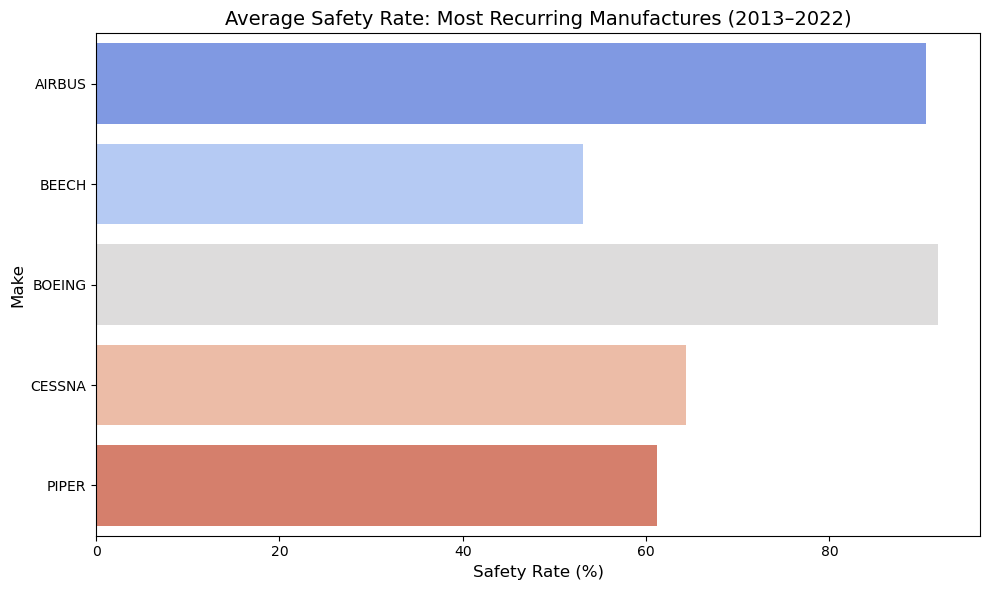

In [340]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=safety_output_likelihood,
    x='Safety Rate (%)',
    y='Make',
    palette='coolwarm'  # Choose a visually appealing color palette
)

plt.title('Average Safety Rate: Most Recurring Manufactures (2013–2022)', fontsize=14)
plt.xlabel('Safety Rate (%)', fontsize=12)
plt.ylabel('Make', fontsize=12)

plt.tight_layout()
plt.show()


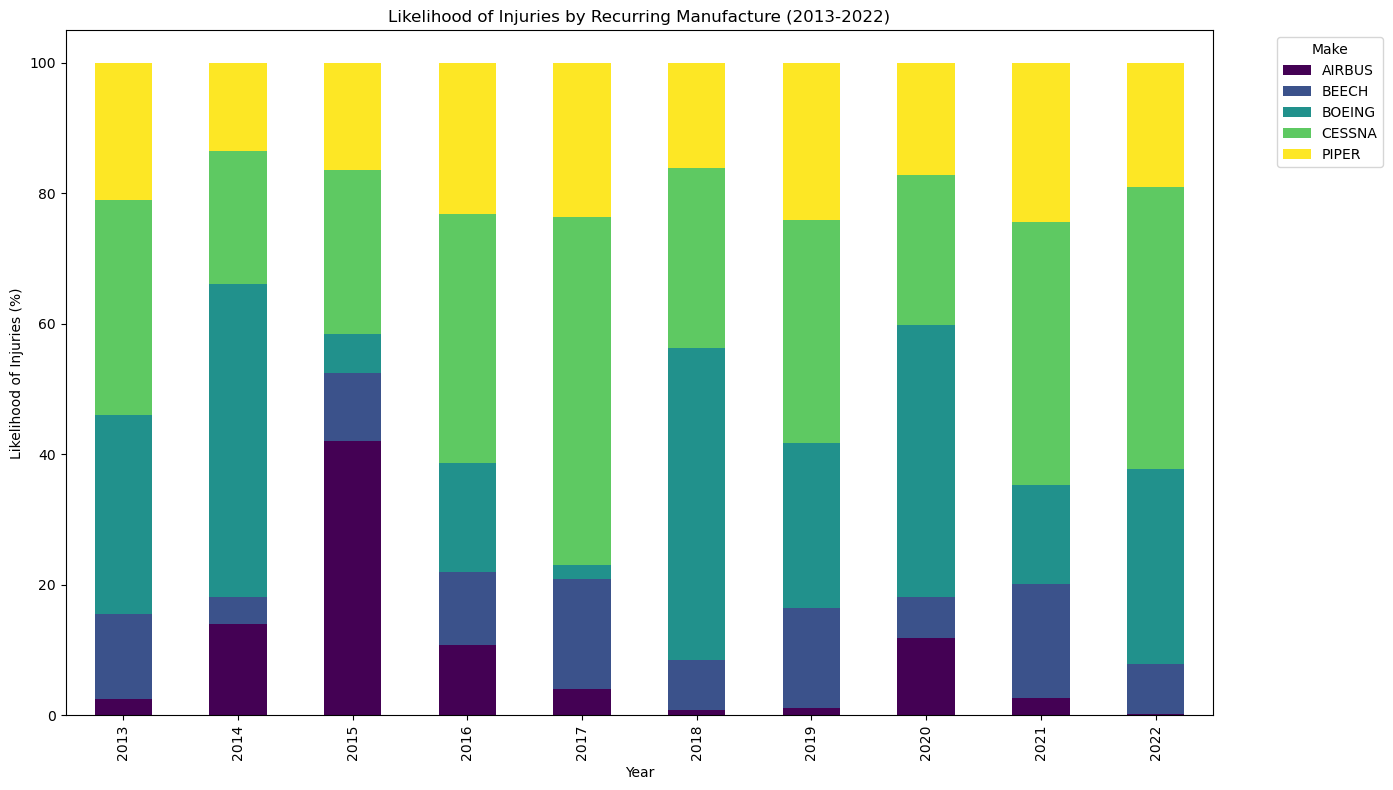

In [332]:
# Pivot the data for stacked bar plotting
pivot_data = output_injuries.pivot(index='Year', columns='Make', values='Likelihood of Injuries (%)')

# Plot the stacked bar chart
pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    cmap='viridis',
    title='Likelihood of Injuries by Recurring Manufacture (2013-2022)'
)

# Add labels
plt.xlabel('Year')
plt.ylabel('Likelihood of Injuries (%)')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [342]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

yearly_injured_total_sum = (
    filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .sum(axis=1)
    .reset_index(name='total_injured')
)

print(yearly_injured_total_sum)

    Year    Make  total_injured
0   2013  AIRBUS           20.0
1   2013   BEECH          108.0
2   2013  BOEING          251.0
3   2013  CESSNA          272.0
4   2013   PIPER          173.0
5   2014  AIRBUS          172.0
6   2014   BEECH           49.0
7   2014  BOEING          588.0
8   2014  CESSNA          249.0
9   2014   PIPER          166.0
10  2015  AIRBUS          414.0
11  2015   BEECH          102.0
12  2015  BOEING           59.0
13  2015  CESSNA          246.0
14  2015   PIPER          162.0
15  2016  AIRBUS           74.0
16  2016   BEECH           76.0
17  2016  BOEING          114.0
18  2016  CESSNA          261.0
19  2016   PIPER          158.0
20  2017  AIRBUS           22.0
21  2017   BEECH           91.0
22  2017  BOEING           12.0
23  2017  CESSNA          289.0
24  2017   PIPER          128.0
25  2018  AIRBUS            7.0
26  2018   BEECH           74.0
27  2018  BOEING          454.0
28  2018  CESSNA          263.0
29  2018   PIPER          153.0
30  2019

In [343]:
yearly_injury_likelihood = yearly_injured_total_sum.groupby('Make')['Safety Rate (%)'].mean().reset_index()
print(yearly_injury_likelihood)

KeyError: 'Column not found: Safety Rate (%)'

In [350]:
# Filter the dataset for the selected makes
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

total_uninjured_by_make = (
    filtered_makes_df.groupby('Make')['Total.Uninjured']
    .sum()
    .reset_index(name='total_uninjured')
)

# Display the result
print(total_uninjured_by_make)


     Make  total_uninjured
0  AIRBUS           9429.0
1   BEECH            882.0
2  BOEING          25468.0
3  CESSNA           4373.0
4   PIPER           2303.0


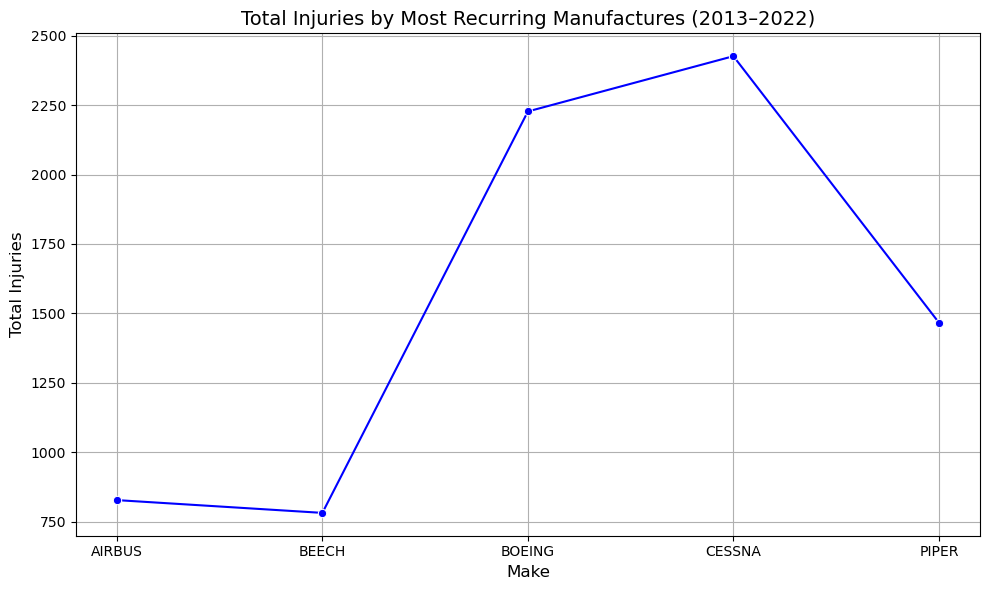

In [345]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=total_injuries_by_make,
    x='Make',
    y='total_injured',
    marker='o',
    linestyle='-',
    color='b'
)

plt.title('Total Injuries by Most Recurring Manufactures (2013–2022)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Total Injuries', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

In [347]:
# Add a column for the average annual injuries
total_injuries_by_make['avg_annual_injuries'] = total_injuries_by_make['total_injured'] / 10

# Display the updated table
print(total_injuries_by_make[['Make', 'total_injured', 'avg_annual_injuries']])

     Make  total_injured  avg_annual_injuries
0  AIRBUS          828.0                 82.8
1   BEECH          782.0                 78.2
2  BOEING         2227.0                222.7
3  CESSNA         2426.0                242.6
4   PIPER         1467.0                146.7


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_699/2196243367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


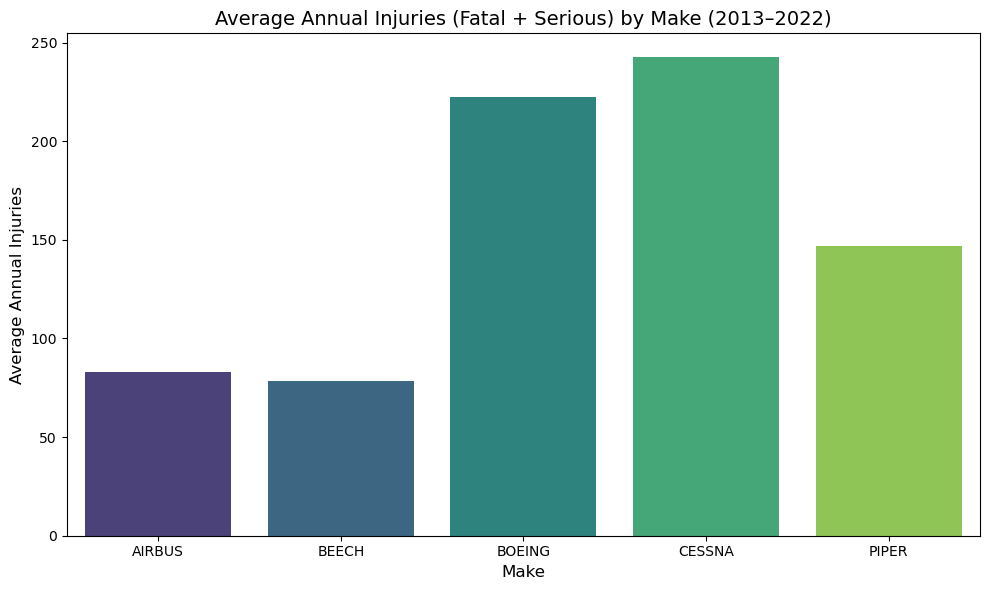

In [348]:
# Create a bar chart for average annual injuries
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_injuries_by_make,
    x='Make',
    y='avg_annual_injuries',
    palette='viridis'
)

# Add labels and title
plt.title('Average Annual Injuries by Most Recurring Manufactures (2013–2022)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Average Annual Injuries', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [353]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
model_unique = filtered_df['Model'].nunique()
model_unique

3709

In [356]:
# Step 1: Filter the dataset for the selected makes
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

# Step 2: Standardize the Model column (uppercase and strip whitespaces)
filtered_makes_df['Model'] = filtered_makes_df['Model'].str.upper().str.strip()

# Step 3: Define manual replacements for known duplicates/variations
model_replacements = {
    # AIRBUS models
    'A-320': 'A320',
    'AIRBUS A320': 'A320',
    'A321 NEO': 'A321',
    'AIRBUS 330': 'A330',
    
    # BOEING models
    'B737-800': '737-800',
    'BOEING 737': '737',
    'B777': '777',
    'BOEING 787-8': '787-8',

    # CESSNA models
    'CESSNA172': 'CESSNA 172',
    'C172': 'CESSNA 172',
    'C182': 'CESSNA 182',
    'CESSNA-182': 'CESSNA 182',

    # PIPER models
    'PIPER CHEROKEE': 'CHEROKEE',
    'PIPER PA-28': 'PA-28',
    'PA28': 'PA-28',

    # BEECH models
    'BEECHCRAFT KING AIR': 'KING AIR',
    'BEECH 1900D': '1900D',
    'KINGAIR': 'KING AIR',
    'BEECH 58': '58'
}

# Step 4: Replace model names using the dictionary
filtered_makes_df['Model'] = filtered_makes_df['Model'].replace(model_replacements)

# Step 5: Display unique values for review
print(filtered_makes_df['Model'].nunique())

854


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_699/3325232531.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_makes_df['Model'] = filtered_makes_df['Model'].str.upper().str.strip()
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_699/3325232531.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_makes_df['Model'] = filtered_makes_df['Model'].replace(model_replacements)


In [358]:
model_counts = filtered_makes_df['Model'].value_counts()
models_to_keep = model_counts[model_counts > 2].index
filtered_makes_df = filtered_makes_df[filtered_makes_df['Model'].isin(models_to_keep)]

print(f"Remaining unique models: {filtered_makes_df['Model'].nunique()}")
print(filtered_makes_df['Model'].value_counts().head(50))

Remaining unique models: 407
Model
172          597
PA-28        254
182          218
152          144
150          130
180          124
A36           89
172N          82
172S          82
PA18          79
140           74
737           71
172M          69
A185          65
PA-28-140     63
170           61
PA28R         57
210           57
PA 18-150     57
PA32          54
170B          49
208           48
PA22          46
177           44
PA46          44
172P          43
35            42
58            41
208B          40
PA34          39
PA-18-150     39
T210          39
U206          38
PA 12         37
A185F         37
120           35
PA24          34
172R          34
PA32R         33
PA25          31
PA 28-140     30
PA 28-180     30
R182          29
177RG         28
P210N         28
182Q          28
J3C           28
PA 18         27
PA-28-161     27
36            26
Name: count, dtype: int64


In [360]:
# Step 1: Count occurrences of each Make-Model combination
make_model_counts = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .size()
    .reset_index(name='Count')
)

# Step 2: Filter Make-Model combinations with more than 2 occurrences
significant_models = make_model_counts[make_model_counts['Count'] > 2]

# Step 3: Filter the dataset to include only significant Make-Model combinations
filtered_makes_df = pd.merge(
    filtered_makes_df,
    significant_models[['Make', 'Model']],
    on=['Make', 'Model']
)

# Step 4: Display the remaining unique Make-Model combinations
print(f"Remaining unique Make-Model combinations: {filtered_makes_df[['Make', 'Model']].drop_duplicates().shape[0]}")
print(filtered_makes_df[['Make', 'Model']].value_counts().head(50))

Remaining unique Make-Model combinations: 406
Make    Model    
CESSNA  172          597
PIPER   PA-28        254
CESSNA  182          218
        152          144
        150          130
        180          124
BEECH   A36           89
CESSNA  172N          82
        172S          82
PIPER   PA18          79
CESSNA  140           74
BOEING  737           71
CESSNA  172M          69
        A185          65
PIPER   PA-28-140     63
CESSNA  170           61
        210           57
PIPER   PA28R         57
        PA 18-150     57
        PA32          54
CESSNA  170B          49
        208           48
PIPER   PA22          46
        PA46          44
CESSNA  177           44
        172P          43
BEECH   35            42
        58            41
CESSNA  208B          40
PIPER   PA-18-150     39
        PA34          39
CESSNA  T210          39
        U206          38
        A185F         37
PIPER   PA 12         37
CESSNA  120           35
        172R          34
PIPER   PA2

In [361]:
# Step 1: Calculate uninjured percentage for each Make-Model combination
make_model_stats = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .agg({
        'Total.Uninjured': 'sum',
        'Total.Fatal.Injuries': 'sum',
        'Total.Serious.Injuries': 'sum'
    })
    .reset_index()
)

# Calculate Total Individuals and Uninjured Percentage
make_model_stats['Total Individuals'] = (
    make_model_stats['Total.Uninjured'] +
    make_model_stats['Total.Fatal.Injuries'] +
    make_model_stats['Total.Serious.Injuries']
)
make_model_stats['Uninjured Percentage'] = (
    (make_model_stats['Total.Uninjured'] / make_model_stats['Total Individuals']) * 100
)

# Step 2: Merge the counts into the stats
make_model_counts = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .size()
    .reset_index(name='Count')
)
make_model_stats = pd.merge(make_model_stats, make_model_counts, on=['Make', 'Model'])

# Step 3: Sort by Count to get the top 100 Make-Model combinations
top_100_make_models = make_model_stats.sort_values(by='Count', ascending=False).head(100)

# Step 4: Sort the top 100 by highest Uninjured Percentage
top_100_sorted = top_100_make_models.sort_values(by='Uninjured Percentage', ascending=False)

# Display the result
print(top_100_sorted[['Make', 'Model', 'Count', 'Uninjured Percentage']])

       Make       Model  Count  Uninjured Percentage
272   PIPER       PA 12     37             91.071429
293   PIPER       PA 28     23             89.473684
325   PIPER  PA 46-350P     16             88.571429
333   PIPER   PA-18-150     39             87.931034
173  CESSNA         195     18             87.878788
..      ...         ...    ...                   ...
57    BEECH         C90     20             40.384615
397   PIPER        PA34     39             36.956522
224  CESSNA        A188     19             30.000000
78    BEECH         V35     20             18.918919
387   PIPER        PA25     31             16.129032

[100 rows x 4 columns]


In [362]:
# Step 1: Calculate uninjured percentage and total individuals for each Make-Model combination
make_model_stats = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .agg({
        'Total.Uninjured': 'sum',
        'Total.Fatal.Injuries': 'sum',
        'Total.Serious.Injuries': 'sum'
    })
    .reset_index()
)

# Calculate Total Individuals and Uninjured Percentage
make_model_stats['Total Individuals'] = (
    make_model_stats['Total.Uninjured'] +
    make_model_stats['Total.Fatal.Injuries'] +
    make_model_stats['Total.Serious.Injuries']
)
make_model_stats['Uninjured Percentage'] = (
    (make_model_stats['Total.Uninjured'] / make_model_stats['Total Individuals']) * 100
)

# Step 2: Merge the counts into the stats
make_model_counts = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .size()
    .reset_index(name='Count')
)
make_model_stats = pd.merge(make_model_stats, make_model_counts, on=['Make', 'Model'])

# Step 3: Sort by Count to get the top 100 Make-Model combinations
top_100_make_models = make_model_stats.sort_values(by='Count', ascending=False).head(100)

# Step 4: Sort the top 100 by highest Uninjured Percentage
top_100_sorted = top_100_make_models.sort_values(by='Uninjured Percentage', ascending=False)

# Display the result
print(top_100_sorted[['Make', 'Model', 'Count', 'Total Individuals', 'Uninjured Percentage']])

       Make       Model  Count  Total Individuals  Uninjured Percentage
272   PIPER       PA 12     37               56.0             91.071429
293   PIPER       PA 28     23               38.0             89.473684
325   PIPER  PA 46-350P     16               35.0             88.571429
333   PIPER   PA-18-150     39               58.0             87.931034
173  CESSNA         195     18               33.0             87.878788
..      ...         ...    ...                ...                   ...
57    BEECH         C90     20               52.0             40.384615
397   PIPER        PA34     39               92.0             36.956522
224  CESSNA        A188     19               20.0             30.000000
78    BEECH         V35     20               37.0             18.918919
387   PIPER        PA25     31               31.0             16.129032

[100 rows x 5 columns]


In [366]:
# Step 1: Calculate Total Individuals per instance
filtered_makes_df['Total Individuals'] = (
    filtered_makes_df['Total.Uninjured'] +
    filtered_makes_df['Total.Fatal.Injuries'] +
    filtered_makes_df['Total.Serious.Injuries']
)

# Step 2: Filter out rows where Total Individuals is less than 10
filtered_makes_df = filtered_makes_df[filtered_makes_df['Total Individuals'] >= 10]

# Step 3: Display the remaining dataset
print(f"Remaining rows after filtering: {filtered_makes_df.shape[0]}")
print(filtered_makes_df['Model'].value_counts())

Remaining rows after filtering: 184
Model
737          61
737 7H4      11
767           9
208           8
A320          8
757           8
777           7
208B          6
A321          6
737-8H4       5
A321 231      5
777 223       4
A330          4
A319          4
A330 323      3
A320-232      3
737 3H4       3
787           3
737-824       3
767 322       3
737-700       3
PA-31-350     2
A319 115      2
737-800       2
B200          1
560XL         1
560           1
550           1
E 90          1
PA 31P        1
1900C         1
1900          1
200           1
182L          1
441           1
Name: count, dtype: int64


In [367]:
# Step 1: Count occurrences of each model
model_counts = filtered_makes_df['Model'].value_counts()

# Step 2: Filter models that appear more than once
models_to_keep = model_counts[model_counts > 1].index

# Step 3: Filter the dataset to include only models with more than one occurrence
filtered_makes_df = filtered_makes_df[filtered_makes_df['Model'].isin(models_to_keep)]

# Step 4: Display the resulting dataset
print(f"Remaining rows after removing models with only one instance: {filtered_makes_df.shape[0]}")
print(filtered_makes_df['Model'].value_counts())

Remaining rows after removing models with only one instance: 173
Model
737          61
737 7H4      11
767           9
208           8
A320          8
757           8
777           7
A321          6
208B          6
A321 231      5
737-8H4       5
777 223       4
A330          4
A319          4
737-824       3
737-700       3
A320-232      3
787           3
737 3H4       3
A330 323      3
767 322       3
A319 115      2
PA-31-350     2
737-800       2
Name: count, dtype: int64


In [371]:
df.to_csv("jan_24_project_df.csv", index=False)